<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/TDS_06_Sub_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Trying GPU
import torch

torch.cuda.get_device_name(0) # ---> Tesla P100-PCIE-16GB(enthusiast calass pro graphics card by NVIDIA)

'Tesla P100-PCIE-16GB'

Data = our fav features subsetted out running Catboost using Grid Search' default parameters

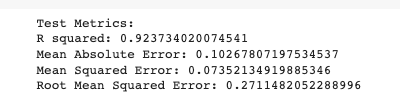

https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329

Following a Towards Data Science At Boost Regression with Grid Search

# Pip Install

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
from google.colab import output
output.disable_custom_widget_manager()

In [4]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [5]:
!pip install shap

     |████████████████████████████████| 564 kB 10.1 MB/s 


# Library

In [6]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display

In [7]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics 
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [8]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
#import load_boston
#from matplotlib import pyplot as pltfrom sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import datetime as dt

# Data

In [9]:
data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

In [10]:
# Test.  Let us try just dropping hte date col

data = data.drop('date', 1)

# Pre-Process the data

In [11]:
data.at[39,'Quantity'] = -1.3035153046741994

In [12]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [13]:


# convert date to ordinal

#data['date'] = pd.to_datetime(data['date'])
#data['date']= data['date'].map(dt.datetime.toordinal)

In [14]:
# move date to 
#df.set_index('month')
#data = data.set_index('date')

In [15]:
data.head()

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,104.851013,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,98.287453,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,94.447377,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7

# Scale the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=5)

In [18]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)



# The Model

We will use the RMSE measure as our loss function because it is a regression task.

More info here:  https://catboost.ai/docs/concepts/parameter-tuning.html


In [19]:
model = cb.CatBoostRegressor(loss_function='RMSE')

#  Grid Search

In [20]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# Fit the model

In [21]:
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
61:	learn: 0.0092820	test: 0.7741088	best: 0.6314136 (0)	total: 1.69s	remaining: 3.76s
62:	learn: 0.0086440	test: 0.7740813	best: 0.6314136 (0)	total: 1.71s	remaining: 3.73s
63:	learn: 0.0080677	test: 0.7742205	best: 0.6314136 (0)	total: 1.74s	remaining: 3.7s
64:	learn: 0.0075236	test: 0.7740832	best: 0.6314136 (0)	total: 1.77s	remaining: 3.67s
65:	learn: 0.0070222	test: 0.7740270	best: 0.6314136 (0)	total: 1.79s	remaining: 3.64s
66:	learn: 0.0065542	test: 0.7739673	best: 0.6314136 (0)	total: 1.82s	remaining: 3.62s
67:	learn: 0.0061172	test: 0.7740303	best: 0.6314136 (0)	total: 1.85s	remaining: 3.6s
68:	learn: 0.0057094	test: 0.7738576	best: 0.6314136 (0)	total: 1.88s	remaining: 3.56s
69:	learn: 0.0053231	test: 0.7738119	best: 0.6314136 (0)	total: 1.9s	remaining: 3.54s
70:	learn: 0.0049633	test: 0.7737191	best: 0.6314136 (0)	total: 1.93s	remaining: 3.5s
71:	learn: 0.0046291	test: 0.7737365	best: 0.6314136 (0)	total: 1.96s	remaining: 3.

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

Testing performance
RMSE: 0.95
R2: 0.06

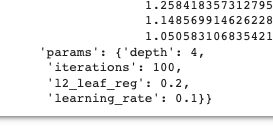

Lets see how model performs

In [22]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
#
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))



Testing performance
RMSE: 0.95
R2: 0.06


In [23]:
##########. JUAN'S FUNCTIONS

In [24]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost.   <<<<<----CAT BOOST   <<<<-------
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

In [25]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [26]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [27]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):  # <<<<<<---- What should this be at?
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

# Now call Juan's codes

0:	learn: 0.5975178	total: 12.4ms	remaining: 1.23s
1:	learn: 0.5637296	total: 25.3ms	remaining: 1.24s
2:	learn: 0.5271542	total: 37.1ms	remaining: 1.2s
3:	learn: 0.4963013	total: 50.6ms	remaining: 1.22s
4:	learn: 0.4685822	total: 62.8ms	remaining: 1.19s
5:	learn: 0.4347097	total: 76.9ms	remaining: 1.2s
6:	learn: 0.4133902	total: 88.8ms	remaining: 1.18s
7:	learn: 0.3949303	total: 102ms	remaining: 1.18s
8:	learn: 0.3744458	total: 120ms	remaining: 1.21s
9:	learn: 0.3525755	total: 143ms	remaining: 1.28s
10:	learn: 0.3306989	total: 155ms	remaining: 1.26s
11:	learn: 0.3109790	total: 168ms	remaining: 1.23s
12:	learn: 0.2925811	total: 180ms	remaining: 1.2s
13:	learn: 0.2759457	total: 192ms	remaining: 1.18s
14:	learn: 0.2626347	total: 211ms	remaining: 1.2s
15:	learn: 0.2446690	total: 226ms	remaining: 1.19s
16:	learn: 0.2312689	total: 237ms	remaining: 1.16s
17:	learn: 0.2195164	total: 249ms	remaining: 1.13s
18:	learn: 0.2078345	total: 261ms	remaining: 1.11s
19:	learn: 0.1973916	total: 281ms	rema

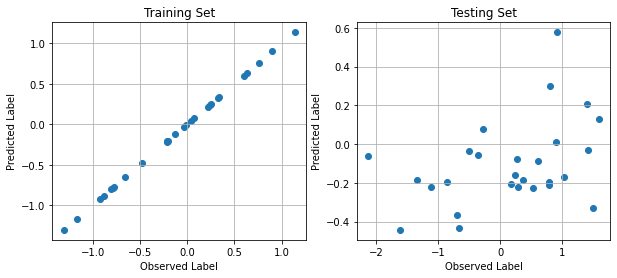

  0%|          | 0/100 [00:00<?, ?it/s]

0:	learn: 0.7633491	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7284842	total: 31.8ms	remaining: 1.55s
2:	learn: 0.6991046	total: 46.6ms	remaining: 1.51s
3:	learn: 0.6663397	total: 64.8ms	remaining: 1.55s
4:	learn: 0.6312509	total: 80ms	remaining: 1.52s
5:	learn: 0.5990189	total: 96.7ms	remaining: 1.51s
6:	learn: 0.5676893	total: 112ms	remaining: 1.48s
7:	learn: 0.5418350	total: 127ms	remaining: 1.46s
8:	learn: 0.5105584	total: 144ms	remaining: 1.46s
9:	learn: 0.4864275	total: 159ms	remaining: 1.43s
10:	learn: 0.4654144	total: 174ms	remaining: 1.41s
11:	learn: 0.4447575	total: 189ms	remaining: 1.38s
12:	learn: 0.4196417	total: 205ms	remaining: 1.37s
13:	learn: 0.4020416	total: 229ms	remaining: 1.41s
14:	learn: 0.3779951	total: 246ms	remaining: 1.39s
15:	learn: 0.3587281	total: 265ms	remaining: 1.39s
16:	learn: 0.3433943	total: 280ms	remaining: 1.37s
17:	learn: 0.3280438	total: 296ms	remaining: 1.35s
18:	learn: 0.3145468	total: 313ms	remaining: 1.33s
19:	learn: 0.2973539	total: 328ms	rem

  1%|          | 1/100 [00:01<02:59,  1.81s/it]

0:	learn: 0.8230978	total: 19ms	remaining: 1.88s
1:	learn: 0.7835773	total: 35.1ms	remaining: 1.72s
2:	learn: 0.7400685	total: 50.4ms	remaining: 1.63s
3:	learn: 0.7053648	total: 65.5ms	remaining: 1.57s
4:	learn: 0.6655380	total: 83.5ms	remaining: 1.59s
5:	learn: 0.6326846	total: 99.6ms	remaining: 1.56s
6:	learn: 0.6088885	total: 115ms	remaining: 1.52s
7:	learn: 0.5842046	total: 133ms	remaining: 1.52s
8:	learn: 0.5547919	total: 151ms	remaining: 1.52s
9:	learn: 0.5263395	total: 168ms	remaining: 1.51s
10:	learn: 0.4953506	total: 183ms	remaining: 1.48s
11:	learn: 0.4743109	total: 198ms	remaining: 1.45s
12:	learn: 0.4436636	total: 213ms	remaining: 1.43s
13:	learn: 0.4265343	total: 234ms	remaining: 1.44s
14:	learn: 0.4055936	total: 251ms	remaining: 1.42s
15:	learn: 0.3844898	total: 267ms	remaining: 1.4s
16:	learn: 0.3627106	total: 282ms	remaining: 1.38s
17:	learn: 0.3497396	total: 297ms	remaining: 1.35s
18:	learn: 0.3355370	total: 312ms	remaining: 1.33s
19:	learn: 0.3205236	total: 329ms	rema

  2%|▏         | 2/100 [00:03<02:55,  1.79s/it]

91:	learn: 0.0021637	total: 1.5s	remaining: 130ms
92:	learn: 0.0019983	total: 1.51s	remaining: 114ms
93:	learn: 0.0018498	total: 1.53s	remaining: 97.6ms
94:	learn: 0.0017216	total: 1.54s	remaining: 81.3ms
95:	learn: 0.0015900	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0014645	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0013572	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0012467	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0011502	total: 1.63s	remaining: 0us
0:	learn: 0.7578769	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7164089	total: 35.2ms	remaining: 1.73s
2:	learn: 0.6749536	total: 50.4ms	remaining: 1.63s
3:	learn: 0.6449728	total: 65.3ms	remaining: 1.57s
4:	learn: 0.6012703	total: 80.1ms	remaining: 1.52s
5:	learn: 0.5627830	total: 96.1ms	remaining: 1.5s
6:	learn: 0.5460059	total: 111ms	remaining: 1.48s
7:	learn: 0.5186149	total: 126ms	remaining: 1.45s
8:	learn: 0.4892006	total: 144ms	remaining: 1.45s
9:	learn: 0.4641902	total: 158ms	remaining: 1.43s
10:	learn: 0.4385430	total: 173ms

  3%|▎         | 3/100 [00:05<02:52,  1.78s/it]

91:	learn: 0.0020486	total: 1.48s	remaining: 128ms
92:	learn: 0.0018843	total: 1.49s	remaining: 112ms
93:	learn: 0.0017497	total: 1.51s	remaining: 96.3ms
94:	learn: 0.0016260	total: 1.52s	remaining: 80.2ms
95:	learn: 0.0015052	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0013953	total: 1.55s	remaining: 48.1ms
97:	learn: 0.0012915	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0011883	total: 1.59s	remaining: 16ms
99:	learn: 0.0010953	total: 1.6s	remaining: 0us
0:	learn: 0.8097603	total: 17.7ms	remaining: 1.75s
1:	learn: 0.7746976	total: 34ms	remaining: 1.67s
2:	learn: 0.7436282	total: 52.4ms	remaining: 1.69s
3:	learn: 0.7172600	total: 68.5ms	remaining: 1.64s
4:	learn: 0.6788218	total: 84.7ms	remaining: 1.61s
5:	learn: 0.6479410	total: 101ms	remaining: 1.57s
6:	learn: 0.6193715	total: 116ms	remaining: 1.54s
7:	learn: 0.5913318	total: 131ms	remaining: 1.51s
8:	learn: 0.5645129	total: 147ms	remaining: 1.49s
9:	learn: 0.5270391	total: 163ms	remaining: 1.46s
10:	learn: 0.4978084	total: 180ms	rem

  4%|▍         | 4/100 [00:07<02:53,  1.81s/it]

0:	learn: 0.8047887	total: 17.1ms	remaining: 1.69s
1:	learn: 0.7742702	total: 33.9ms	remaining: 1.66s
2:	learn: 0.7426702	total: 53.1ms	remaining: 1.72s
3:	learn: 0.7111723	total: 69.2ms	remaining: 1.66s
4:	learn: 0.6744683	total: 84.9ms	remaining: 1.61s
5:	learn: 0.6400193	total: 101ms	remaining: 1.58s
6:	learn: 0.6131771	total: 117ms	remaining: 1.55s
7:	learn: 0.5836390	total: 132ms	remaining: 1.52s
8:	learn: 0.5494332	total: 148ms	remaining: 1.49s
9:	learn: 0.5236472	total: 165ms	remaining: 1.48s
10:	learn: 0.4931560	total: 181ms	remaining: 1.46s
11:	learn: 0.4699707	total: 200ms	remaining: 1.46s
12:	learn: 0.4482726	total: 215ms	remaining: 1.44s
13:	learn: 0.4255957	total: 236ms	remaining: 1.45s
14:	learn: 0.4037504	total: 251ms	remaining: 1.42s
15:	learn: 0.3919236	total: 266ms	remaining: 1.4s
16:	learn: 0.3731473	total: 281ms	remaining: 1.37s
17:	learn: 0.3612864	total: 296ms	remaining: 1.35s
18:	learn: 0.3417618	total: 311ms	remaining: 1.33s
19:	learn: 0.3326844	total: 326ms	rem

  5%|▌         | 5/100 [00:08<02:50,  1.79s/it]

92:	learn: 0.0023823	total: 1.5s	remaining: 113ms
93:	learn: 0.0022002	total: 1.51s	remaining: 96.7ms
94:	learn: 0.0020434	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0019004	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0017732	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0016554	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0015473	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0014422	total: 1.61s	remaining: 0us
0:	learn: 0.8365995	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7948670	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7565277	total: 46.8ms	remaining: 1.51s
3:	learn: 0.7327504	total: 61.5ms	remaining: 1.48s
4:	learn: 0.6930342	total: 76.7ms	remaining: 1.46s
5:	learn: 0.6601179	total: 96.4ms	remaining: 1.51s
6:	learn: 0.6349110	total: 111ms	remaining: 1.48s
7:	learn: 0.6079740	total: 126ms	remaining: 1.45s
8:	learn: 0.5754231	total: 141ms	remaining: 1.43s
9:	learn: 0.5397369	total: 156ms	remaining: 1.4s
10:	learn: 0.5073011	total: 171ms	remaining: 1.38s
11:	learn: 0.4869360	total: 186ms

  6%|▌         | 6/100 [00:10<02:48,  1.79s/it]

0:	learn: 0.8063589	total: 15.4ms	remaining: 1.53s
1:	learn: 0.7733517	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7409077	total: 50.3ms	remaining: 1.63s
3:	learn: 0.7128608	total: 66.6ms	remaining: 1.6s
4:	learn: 0.6769784	total: 81.5ms	remaining: 1.55s
5:	learn: 0.6411746	total: 96.3ms	remaining: 1.51s
6:	learn: 0.6076873	total: 111ms	remaining: 1.48s
7:	learn: 0.5761678	total: 126ms	remaining: 1.45s
8:	learn: 0.5452235	total: 141ms	remaining: 1.42s
9:	learn: 0.5152856	total: 156ms	remaining: 1.4s
10:	learn: 0.4844593	total: 171ms	remaining: 1.39s
11:	learn: 0.4666427	total: 186ms	remaining: 1.36s
12:	learn: 0.4450677	total: 204ms	remaining: 1.36s
13:	learn: 0.4234442	total: 223ms	remaining: 1.37s
14:	learn: 0.4103003	total: 238ms	remaining: 1.35s
15:	learn: 0.3869918	total: 254ms	remaining: 1.33s
16:	learn: 0.3727860	total: 269ms	remaining: 1.31s
17:	learn: 0.3547990	total: 285ms	remaining: 1.3s
18:	learn: 0.3370593	total: 300ms	remaining: 1.28s
19:	learn: 0.3192190	total: 315ms	rema

  7%|▋         | 7/100 [00:12<02:46,  1.79s/it]

0:	learn: 0.8099471	total: 16ms	remaining: 1.58s
1:	learn: 0.7807746	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7370384	total: 49.1ms	remaining: 1.59s
3:	learn: 0.7098541	total: 66.9ms	remaining: 1.6s
4:	learn: 0.6663571	total: 82.6ms	remaining: 1.57s
5:	learn: 0.6260814	total: 97.8ms	remaining: 1.53s
6:	learn: 0.5896790	total: 113ms	remaining: 1.5s
7:	learn: 0.5635063	total: 128ms	remaining: 1.47s
8:	learn: 0.5342266	total: 143ms	remaining: 1.45s
9:	learn: 0.5101480	total: 159ms	remaining: 1.43s
10:	learn: 0.4804577	total: 174ms	remaining: 1.41s
11:	learn: 0.4581513	total: 197ms	remaining: 1.44s
12:	learn: 0.4427862	total: 214ms	remaining: 1.43s
13:	learn: 0.4197838	total: 233ms	remaining: 1.43s
14:	learn: 0.3990916	total: 248ms	remaining: 1.41s
15:	learn: 0.3828664	total: 263ms	remaining: 1.38s
16:	learn: 0.3700254	total: 280ms	remaining: 1.37s
17:	learn: 0.3540178	total: 295ms	remaining: 1.34s
18:	learn: 0.3360355	total: 310ms	remaining: 1.32s
19:	learn: 0.3260573	total: 326ms	remai

  8%|▊         | 8/100 [00:14<02:44,  1.79s/it]

0:	learn: 0.8013550	total: 15.4ms	remaining: 1.52s
1:	learn: 0.7619026	total: 31ms	remaining: 1.52s
2:	learn: 0.7227664	total: 48.5ms	remaining: 1.57s
3:	learn: 0.6803104	total: 65.3ms	remaining: 1.57s
4:	learn: 0.6534275	total: 80.4ms	remaining: 1.53s
5:	learn: 0.6262178	total: 95.1ms	remaining: 1.49s
6:	learn: 0.6029545	total: 111ms	remaining: 1.47s
7:	learn: 0.5788561	total: 126ms	remaining: 1.45s
8:	learn: 0.5491868	total: 141ms	remaining: 1.42s
9:	learn: 0.5262599	total: 156ms	remaining: 1.4s
10:	learn: 0.5038776	total: 171ms	remaining: 1.38s
11:	learn: 0.4764981	total: 187ms	remaining: 1.37s
12:	learn: 0.4563386	total: 204ms	remaining: 1.37s
13:	learn: 0.4313310	total: 223ms	remaining: 1.37s
14:	learn: 0.4086972	total: 239ms	remaining: 1.35s
15:	learn: 0.3939975	total: 253ms	remaining: 1.33s
16:	learn: 0.3763537	total: 268ms	remaining: 1.31s
17:	learn: 0.3601033	total: 283ms	remaining: 1.29s
18:	learn: 0.3420429	total: 298ms	remaining: 1.27s
19:	learn: 0.3321400	total: 313ms	rema

  9%|▉         | 9/100 [00:16<02:41,  1.78s/it]

92:	learn: 0.0025146	total: 1.49s	remaining: 112ms
93:	learn: 0.0023212	total: 1.51s	remaining: 96.2ms
94:	learn: 0.0021393	total: 1.52s	remaining: 80.1ms
95:	learn: 0.0019785	total: 1.54s	remaining: 64.1ms
96:	learn: 0.0018180	total: 1.55s	remaining: 48ms
97:	learn: 0.0016837	total: 1.57s	remaining: 32ms
98:	learn: 0.0015687	total: 1.58s	remaining: 16ms
99:	learn: 0.0014626	total: 1.6s	remaining: 0us
0:	learn: 0.8082172	total: 15.8ms	remaining: 1.57s
1:	learn: 0.7761574	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7256415	total: 47.2ms	remaining: 1.53s
3:	learn: 0.6770083	total: 62ms	remaining: 1.49s
4:	learn: 0.6391949	total: 77ms	remaining: 1.46s
5:	learn: 0.5985789	total: 92.2ms	remaining: 1.44s
6:	learn: 0.5654630	total: 108ms	remaining: 1.43s
7:	learn: 0.5410204	total: 125ms	remaining: 1.43s
8:	learn: 0.5118213	total: 139ms	remaining: 1.41s
9:	learn: 0.4858071	total: 155ms	remaining: 1.39s
10:	learn: 0.4586592	total: 170ms	remaining: 1.37s
11:	learn: 0.4399689	total: 185ms	remainin

 10%|█         | 10/100 [00:17<02:41,  1.79s/it]

95:	learn: 0.0015882	total: 1.52s	remaining: 63.4ms
96:	learn: 0.0014616	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0013556	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012517	total: 1.57s	remaining: 15.8ms
99:	learn: 0.0011569	total: 1.58s	remaining: 0us
0:	learn: 0.8135098	total: 16ms	remaining: 1.59s
1:	learn: 0.7746340	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7319025	total: 46.8ms	remaining: 1.51s
3:	learn: 0.7051798	total: 61.5ms	remaining: 1.47s
4:	learn: 0.6698225	total: 76.8ms	remaining: 1.46s
5:	learn: 0.6355777	total: 94.5ms	remaining: 1.48s
6:	learn: 0.6139119	total: 109ms	remaining: 1.45s
7:	learn: 0.5819122	total: 124ms	remaining: 1.43s
8:	learn: 0.5466529	total: 140ms	remaining: 1.41s
9:	learn: 0.5144810	total: 155ms	remaining: 1.4s
10:	learn: 0.4793102	total: 171ms	remaining: 1.38s
11:	learn: 0.4611536	total: 186ms	remaining: 1.36s
12:	learn: 0.4352440	total: 201ms	remaining: 1.34s
13:	learn: 0.4150273	total: 221ms	remaining: 1.35s
14:	learn: 0.3868086	total: 237ms	re

 11%|█         | 11/100 [00:19<02:38,  1.78s/it]

92:	learn: 0.0017647	total: 1.49s	remaining: 112ms
93:	learn: 0.0016316	total: 1.5s	remaining: 95.8ms
94:	learn: 0.0014976	total: 1.52s	remaining: 80ms
95:	learn: 0.0013895	total: 1.53s	remaining: 64ms
96:	learn: 0.0012809	total: 1.55s	remaining: 48ms
97:	learn: 0.0011854	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0010920	total: 1.58s	remaining: 16ms
99:	learn: 0.0010033	total: 1.6s	remaining: 0us
0:	learn: 0.7923411	total: 15.9ms	remaining: 1.57s
1:	learn: 0.7478329	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7150478	total: 46.2ms	remaining: 1.49s
3:	learn: 0.6781444	total: 61.1ms	remaining: 1.47s
4:	learn: 0.6466981	total: 76ms	remaining: 1.44s
5:	learn: 0.6070057	total: 94.2ms	remaining: 1.48s
6:	learn: 0.5839239	total: 109ms	remaining: 1.45s
7:	learn: 0.5606675	total: 124ms	remaining: 1.43s
8:	learn: 0.5280155	total: 139ms	remaining: 1.41s
9:	learn: 0.5002328	total: 155ms	remaining: 1.39s
10:	learn: 0.4639666	total: 171ms	remaining: 1.38s
11:	learn: 0.4363479	total: 190ms	remaining

 12%|█▏        | 12/100 [00:21<02:35,  1.77s/it]

93:	learn: 0.0017060	total: 1.5s	remaining: 96ms
94:	learn: 0.0015855	total: 1.52s	remaining: 80.1ms
95:	learn: 0.0014632	total: 1.53s	remaining: 64ms
96:	learn: 0.0013491	total: 1.55s	remaining: 48ms
97:	learn: 0.0012558	total: 1.56s	remaining: 32ms
98:	learn: 0.0011647	total: 1.58s	remaining: 16ms
99:	learn: 0.0010767	total: 1.59s	remaining: 0us
0:	learn: 0.7763388	total: 16.7ms	remaining: 1.65s
1:	learn: 0.7363291	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6897155	total: 47.8ms	remaining: 1.54s
3:	learn: 0.6607026	total: 62.9ms	remaining: 1.51s
4:	learn: 0.6287062	total: 80.7ms	remaining: 1.53s
5:	learn: 0.5956106	total: 95.7ms	remaining: 1.5s
6:	learn: 0.5635953	total: 111ms	remaining: 1.48s
7:	learn: 0.5383593	total: 128ms	remaining: 1.47s
8:	learn: 0.5035252	total: 143ms	remaining: 1.44s
9:	learn: 0.4756872	total: 158ms	remaining: 1.42s
10:	learn: 0.4524619	total: 173ms	remaining: 1.4s
11:	learn: 0.4302072	total: 188ms	remaining: 1.38s
12:	learn: 0.4147612	total: 204ms	remaining:

 13%|█▎        | 13/100 [00:23<02:33,  1.76s/it]

93:	learn: 0.0018383	total: 1.5s	remaining: 95.7ms
94:	learn: 0.0017060	total: 1.51s	remaining: 79.8ms
95:	learn: 0.0015752	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0014660	total: 1.54s	remaining: 47.8ms
97:	learn: 0.0013511	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0012556	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011623	total: 1.59s	remaining: 0us
0:	learn: 0.7158168	total: 16.1ms	remaining: 1.59s
1:	learn: 0.6852247	total: 31.7ms	remaining: 1.55s
2:	learn: 0.6553878	total: 47.3ms	remaining: 1.53s
3:	learn: 0.6342333	total: 62.3ms	remaining: 1.5s
4:	learn: 0.6026691	total: 92.8ms	remaining: 1.76s
5:	learn: 0.5623228	total: 113ms	remaining: 1.77s
6:	learn: 0.5363418	total: 130ms	remaining: 1.73s
7:	learn: 0.5160643	total: 145ms	remaining: 1.67s
8:	learn: 0.4893584	total: 160ms	remaining: 1.62s
9:	learn: 0.4661252	total: 175ms	remaining: 1.58s
10:	learn: 0.4374099	total: 191ms	remaining: 1.55s
11:	learn: 0.4219968	total: 206ms	remaining: 1.51s
12:	learn: 0.4058283	total: 226ms	

 14%|█▍        | 14/100 [00:24<02:30,  1.76s/it]

93:	learn: 0.0016644	total: 1.5s	remaining: 95.7ms
94:	learn: 0.0015490	total: 1.52s	remaining: 79.8ms
95:	learn: 0.0014311	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0013201	total: 1.55s	remaining: 47.8ms
97:	learn: 0.0012235	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0011304	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0010487	total: 1.59s	remaining: 0us
0:	learn: 0.7824303	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7380013	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7065138	total: 46.2ms	remaining: 1.5s
3:	learn: 0.6749591	total: 61.2ms	remaining: 1.47s
4:	learn: 0.6393708	total: 76.5ms	remaining: 1.45s
5:	learn: 0.6015829	total: 91.2ms	remaining: 1.43s
6:	learn: 0.5749179	total: 106ms	remaining: 1.41s
7:	learn: 0.5552243	total: 122ms	remaining: 1.4s
8:	learn: 0.5197803	total: 139ms	remaining: 1.4s
9:	learn: 0.4926019	total: 154ms	remaining: 1.38s
10:	learn: 0.4692856	total: 168ms	remaining: 1.36s
11:	learn: 0.4416787	total: 183ms	remaining: 1.34s
12:	learn: 0.4102620	total: 198ms	r

 15%|█▌        | 15/100 [00:26<02:30,  1.77s/it]

95:	learn: 0.0016707	total: 1.51s	remaining: 62.9ms
96:	learn: 0.0015503	total: 1.52s	remaining: 47.1ms
97:	learn: 0.0014236	total: 1.54s	remaining: 31.4ms
98:	learn: 0.0013155	total: 1.55s	remaining: 15.7ms
99:	learn: 0.0012242	total: 1.57s	remaining: 0us
0:	learn: 0.7671997	total: 19.3ms	remaining: 1.91s
1:	learn: 0.7365316	total: 34.9ms	remaining: 1.71s
2:	learn: 0.6991618	total: 49.9ms	remaining: 1.61s
3:	learn: 0.6715717	total: 67.4ms	remaining: 1.62s
4:	learn: 0.6348828	total: 82.3ms	remaining: 1.56s
5:	learn: 0.6032152	total: 97.1ms	remaining: 1.52s
6:	learn: 0.5766072	total: 112ms	remaining: 1.49s
7:	learn: 0.5537250	total: 132ms	remaining: 1.52s
8:	learn: 0.5260566	total: 150ms	remaining: 1.51s
9:	learn: 0.5008645	total: 167ms	remaining: 1.51s
10:	learn: 0.4777187	total: 185ms	remaining: 1.49s
11:	learn: 0.4573217	total: 205ms	remaining: 1.5s
12:	learn: 0.4372429	total: 226ms	remaining: 1.51s
13:	learn: 0.4216906	total: 243ms	remaining: 1.5s
14:	learn: 0.4039921	total: 262ms	r

 16%|█▌        | 16/100 [00:28<02:28,  1.77s/it]

91:	learn: 0.0025889	total: 1.49s	remaining: 129ms
92:	learn: 0.0023808	total: 1.5s	remaining: 113ms
93:	learn: 0.0022208	total: 1.52s	remaining: 97.1ms
94:	learn: 0.0020736	total: 1.53s	remaining: 80.8ms
95:	learn: 0.0019253	total: 1.55s	remaining: 64.6ms
96:	learn: 0.0017870	total: 1.56s	remaining: 48.4ms
97:	learn: 0.0016375	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0015165	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0014112	total: 1.61s	remaining: 0us
0:	learn: 0.8062231	total: 15.5ms	remaining: 1.54s
1:	learn: 0.7690864	total: 30.7ms	remaining: 1.51s
2:	learn: 0.7265332	total: 46.1ms	remaining: 1.49s
3:	learn: 0.6958136	total: 61.1ms	remaining: 1.47s
4:	learn: 0.6661504	total: 79.4ms	remaining: 1.51s
5:	learn: 0.6354099	total: 95.3ms	remaining: 1.49s
6:	learn: 0.5976552	total: 110ms	remaining: 1.47s
7:	learn: 0.5670509	total: 125ms	remaining: 1.44s
8:	learn: 0.5351760	total: 140ms	remaining: 1.41s
9:	learn: 0.5039523	total: 155ms	remaining: 1.39s
10:	learn: 0.4838621	total: 169m

 17%|█▋        | 17/100 [00:30<02:25,  1.76s/it]

95:	learn: 0.0017185	total: 1.51s	remaining: 62.9ms
96:	learn: 0.0015945	total: 1.52s	remaining: 47.1ms
97:	learn: 0.0014724	total: 1.54s	remaining: 31.4ms
98:	learn: 0.0013610	total: 1.55s	remaining: 15.7ms
99:	learn: 0.0012586	total: 1.58s	remaining: 0us
0:	learn: 0.8539708	total: 18.2ms	remaining: 1.8s
1:	learn: 0.8150692	total: 33.6ms	remaining: 1.65s
2:	learn: 0.7713650	total: 48.3ms	remaining: 1.56s
3:	learn: 0.7420775	total: 65.3ms	remaining: 1.57s
4:	learn: 0.6960930	total: 80.1ms	remaining: 1.52s
5:	learn: 0.6595367	total: 95ms	remaining: 1.49s
6:	learn: 0.6211632	total: 110ms	remaining: 1.46s
7:	learn: 0.5912035	total: 125ms	remaining: 1.43s
8:	learn: 0.5591535	total: 139ms	remaining: 1.41s
9:	learn: 0.5296653	total: 155ms	remaining: 1.4s
10:	learn: 0.4997075	total: 170ms	remaining: 1.38s
11:	learn: 0.4744944	total: 185ms	remaining: 1.35s
12:	learn: 0.4543554	total: 200ms	remaining: 1.34s
13:	learn: 0.4328640	total: 215ms	remaining: 1.32s
14:	learn: 0.4104701	total: 236ms	rem

 18%|█▊        | 18/100 [00:31<02:22,  1.74s/it]

97:	learn: 0.0015599	total: 1.53s	remaining: 31.3ms
98:	learn: 0.0014437	total: 1.55s	remaining: 15.6ms
99:	learn: 0.0013422	total: 1.56s	remaining: 0us
0:	learn: 0.7706947	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7270314	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6965386	total: 50.7ms	remaining: 1.64s
3:	learn: 0.6624331	total: 65.8ms	remaining: 1.58s
4:	learn: 0.6260914	total: 80.7ms	remaining: 1.53s
5:	learn: 0.5893273	total: 98.6ms	remaining: 1.54s
6:	learn: 0.5571014	total: 113ms	remaining: 1.51s
7:	learn: 0.5262048	total: 129ms	remaining: 1.48s
8:	learn: 0.4945849	total: 144ms	remaining: 1.46s
9:	learn: 0.4682971	total: 159ms	remaining: 1.43s
10:	learn: 0.4438369	total: 177ms	remaining: 1.43s
11:	learn: 0.4282501	total: 197ms	remaining: 1.44s
12:	learn: 0.4037050	total: 212ms	remaining: 1.42s
13:	learn: 0.3827289	total: 229ms	remaining: 1.41s
14:	learn: 0.3634328	total: 244ms	remaining: 1.38s
15:	learn: 0.3436550	total: 265ms	remaining: 1.39s
16:	learn: 0.3289361	total: 280ms	r

 19%|█▉        | 19/100 [00:33<02:23,  1.77s/it]

96:	learn: 0.0013323	total: 1.55s	remaining: 48ms
97:	learn: 0.0012280	total: 1.57s	remaining: 32ms
98:	learn: 0.0011429	total: 1.58s	remaining: 16ms
99:	learn: 0.0010538	total: 1.6s	remaining: 0us
0:	learn: 0.8438612	total: 15.8ms	remaining: 1.56s
1:	learn: 0.8035053	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7622953	total: 46ms	remaining: 1.49s
3:	learn: 0.7316607	total: 60.8ms	remaining: 1.46s
4:	learn: 0.6917334	total: 76ms	remaining: 1.44s
5:	learn: 0.6518771	total: 98.1ms	remaining: 1.54s
6:	learn: 0.6215627	total: 113ms	remaining: 1.5s
7:	learn: 0.5961186	total: 128ms	remaining: 1.47s
8:	learn: 0.5602822	total: 143ms	remaining: 1.44s
9:	learn: 0.5238797	total: 158ms	remaining: 1.42s
10:	learn: 0.4922577	total: 172ms	remaining: 1.4s
11:	learn: 0.4709259	total: 187ms	remaining: 1.37s
12:	learn: 0.4481525	total: 202ms	remaining: 1.35s
13:	learn: 0.4247482	total: 220ms	remaining: 1.35s
14:	learn: 0.4053001	total: 239ms	remaining: 1.35s
15:	learn: 0.3836291	total: 254ms	remaining: 1.

 20%|██        | 20/100 [00:35<02:20,  1.76s/it]

93:	learn: 0.0020726	total: 1.5s	remaining: 95.7ms
94:	learn: 0.0019136	total: 1.51s	remaining: 79.8ms
95:	learn: 0.0017694	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0016252	total: 1.55s	remaining: 47.8ms
97:	learn: 0.0015043	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0013840	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0012790	total: 1.59s	remaining: 0us
0:	learn: 0.8346167	total: 15.8ms	remaining: 1.57s
1:	learn: 0.8009386	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7631095	total: 46ms	remaining: 1.49s
3:	learn: 0.7304268	total: 60.8ms	remaining: 1.46s
4:	learn: 0.6908810	total: 75.5ms	remaining: 1.44s
5:	learn: 0.6594076	total: 93.1ms	remaining: 1.46s
6:	learn: 0.6210415	total: 108ms	remaining: 1.43s
7:	learn: 0.5921852	total: 122ms	remaining: 1.41s
8:	learn: 0.5618534	total: 137ms	remaining: 1.39s
9:	learn: 0.5247761	total: 152ms	remaining: 1.37s
10:	learn: 0.4952650	total: 167ms	remaining: 1.35s
11:	learn: 0.4836791	total: 182ms	remaining: 1.33s
12:	learn: 0.4653788	total: 197ms	

 21%|██        | 21/100 [00:37<02:18,  1.75s/it]

95:	learn: 0.0018591	total: 1.5s	remaining: 62.7ms
96:	learn: 0.0017020	total: 1.52s	remaining: 47ms
97:	learn: 0.0015722	total: 1.53s	remaining: 31.3ms
98:	learn: 0.0014536	total: 1.55s	remaining: 15.7ms
99:	learn: 0.0013413	total: 1.57s	remaining: 0us
0:	learn: 0.7663159	total: 24ms	remaining: 2.38s
1:	learn: 0.7257217	total: 39.9ms	remaining: 1.96s
2:	learn: 0.6932105	total: 55.2ms	remaining: 1.78s
3:	learn: 0.6709979	total: 70.3ms	remaining: 1.69s
4:	learn: 0.6372513	total: 86.1ms	remaining: 1.64s
5:	learn: 0.6021483	total: 104ms	remaining: 1.62s
6:	learn: 0.5780764	total: 119ms	remaining: 1.58s
7:	learn: 0.5583887	total: 134ms	remaining: 1.54s
8:	learn: 0.5279567	total: 149ms	remaining: 1.5s
9:	learn: 0.5001378	total: 164ms	remaining: 1.47s
10:	learn: 0.4751798	total: 179ms	remaining: 1.45s
11:	learn: 0.4557924	total: 194ms	remaining: 1.42s
12:	learn: 0.4346260	total: 208ms	remaining: 1.4s
13:	learn: 0.4175134	total: 223ms	remaining: 1.37s
14:	learn: 0.3970337	total: 243ms	remaini

 22%|██▏       | 22/100 [00:38<02:16,  1.74s/it]

96:	learn: 0.0016088	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0014977	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0013935	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0012798	total: 1.59s	remaining: 0us
0:	learn: 0.8426952	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7905004	total: 35.9ms	remaining: 1.76s
2:	learn: 0.7619141	total: 51.1ms	remaining: 1.65s
3:	learn: 0.7352802	total: 68.8ms	remaining: 1.65s
4:	learn: 0.6982149	total: 83.7ms	remaining: 1.59s
5:	learn: 0.6632925	total: 98.6ms	remaining: 1.54s
6:	learn: 0.6287224	total: 114ms	remaining: 1.51s
7:	learn: 0.5980685	total: 129ms	remaining: 1.48s
8:	learn: 0.5644202	total: 144ms	remaining: 1.46s
9:	learn: 0.5320074	total: 159ms	remaining: 1.43s
10:	learn: 0.5036558	total: 175ms	remaining: 1.41s
11:	learn: 0.4809312	total: 189ms	remaining: 1.39s
12:	learn: 0.4566006	total: 204ms	remaining: 1.36s
13:	learn: 0.4298184	total: 219ms	remaining: 1.34s
14:	learn: 0.4125949	total: 234ms	remaining: 1.32s
15:	learn: 0.3916567	total: 255ms	

 23%|██▎       | 23/100 [00:40<02:13,  1.74s/it]

96:	learn: 0.0020570	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0019123	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0017666	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0016393	total: 1.58s	remaining: 0us
0:	learn: 0.7888241	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7490800	total: 34.6ms	remaining: 1.7s
2:	learn: 0.7174956	total: 49.9ms	remaining: 1.61s
3:	learn: 0.6794778	total: 67ms	remaining: 1.61s
4:	learn: 0.6381625	total: 81.6ms	remaining: 1.55s
5:	learn: 0.6117569	total: 96.5ms	remaining: 1.51s
6:	learn: 0.5882520	total: 115ms	remaining: 1.53s
7:	learn: 0.5651987	total: 130ms	remaining: 1.5s
8:	learn: 0.5375552	total: 146ms	remaining: 1.47s
9:	learn: 0.5040650	total: 161ms	remaining: 1.45s
10:	learn: 0.4796863	total: 178ms	remaining: 1.44s
11:	learn: 0.4640750	total: 193ms	remaining: 1.41s
12:	learn: 0.4484263	total: 207ms	remaining: 1.39s
13:	learn: 0.4292042	total: 222ms	remaining: 1.36s
14:	learn: 0.4067962	total: 241ms	remaining: 1.36s
15:	learn: 0.3935915	total: 259ms	rema

 24%|██▍       | 24/100 [00:42<02:14,  1.77s/it]

0:	learn: 0.6980120	total: 15.5ms	remaining: 1.54s
1:	learn: 0.6698747	total: 31ms	remaining: 1.52s
2:	learn: 0.6392931	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6127933	total: 61.4ms	remaining: 1.47s
4:	learn: 0.5861841	total: 76ms	remaining: 1.44s
5:	learn: 0.5615267	total: 94.3ms	remaining: 1.48s
6:	learn: 0.5350411	total: 109ms	remaining: 1.45s
7:	learn: 0.5148747	total: 124ms	remaining: 1.42s
8:	learn: 0.4901600	total: 139ms	remaining: 1.4s
9:	learn: 0.4617492	total: 154ms	remaining: 1.38s
10:	learn: 0.4353325	total: 168ms	remaining: 1.36s
11:	learn: 0.4225547	total: 183ms	remaining: 1.34s
12:	learn: 0.4011857	total: 198ms	remaining: 1.32s
13:	learn: 0.3807000	total: 213ms	remaining: 1.31s
14:	learn: 0.3584571	total: 233ms	remaining: 1.32s
15:	learn: 0.3389189	total: 251ms	remaining: 1.31s
16:	learn: 0.3208715	total: 265ms	remaining: 1.29s
17:	learn: 0.3122301	total: 280ms	remaining: 1.27s
18:	learn: 0.3014254	total: 295ms	remaining: 1.26s
19:	learn: 0.2895416	total: 310ms	remain

 25%|██▌       | 25/100 [00:44<02:12,  1.76s/it]

94:	learn: 0.0018654	total: 1.52s	remaining: 80.1ms
95:	learn: 0.0017433	total: 1.54s	remaining: 64.1ms
96:	learn: 0.0016053	total: 1.55s	remaining: 48ms
97:	learn: 0.0015013	total: 1.57s	remaining: 32ms
98:	learn: 0.0013895	total: 1.58s	remaining: 16ms
99:	learn: 0.0012838	total: 1.6s	remaining: 0us
0:	learn: 0.7443017	total: 20.4ms	remaining: 2.02s
1:	learn: 0.7121305	total: 35.8ms	remaining: 1.75s
2:	learn: 0.6797427	total: 56ms	remaining: 1.81s
3:	learn: 0.6419317	total: 76ms	remaining: 1.82s
4:	learn: 0.6015186	total: 90.9ms	remaining: 1.73s
5:	learn: 0.5674446	total: 106ms	remaining: 1.66s
6:	learn: 0.5452560	total: 121ms	remaining: 1.6s
7:	learn: 0.5124366	total: 136ms	remaining: 1.56s
8:	learn: 0.4823081	total: 151ms	remaining: 1.52s
9:	learn: 0.4523421	total: 165ms	remaining: 1.49s
10:	learn: 0.4281768	total: 180ms	remaining: 1.46s
11:	learn: 0.4162698	total: 195ms	remaining: 1.43s
12:	learn: 0.3956998	total: 211ms	remaining: 1.41s
13:	learn: 0.3792518	total: 230ms	remaining: 

 26%|██▌       | 26/100 [00:45<02:09,  1.75s/it]

95:	learn: 0.0014691	total: 1.52s	remaining: 63.5ms
96:	learn: 0.0013613	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0012530	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0011564	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0010760	total: 1.59s	remaining: 0us
0:	learn: 0.7913305	total: 20.2ms	remaining: 2s
1:	learn: 0.7544328	total: 35.9ms	remaining: 1.76s
2:	learn: 0.7239518	total: 51.3ms	remaining: 1.66s
3:	learn: 0.6872190	total: 66.4ms	remaining: 1.59s
4:	learn: 0.6476959	total: 81.4ms	remaining: 1.55s
5:	learn: 0.6102234	total: 99.1ms	remaining: 1.55s
6:	learn: 0.5874997	total: 114ms	remaining: 1.51s
7:	learn: 0.5593802	total: 129ms	remaining: 1.48s
8:	learn: 0.5301112	total: 144ms	remaining: 1.45s
9:	learn: 0.5090618	total: 159ms	remaining: 1.43s
10:	learn: 0.4766684	total: 174ms	remaining: 1.41s
11:	learn: 0.4628173	total: 190ms	remaining: 1.39s
12:	learn: 0.4399309	total: 205ms	remaining: 1.37s
13:	learn: 0.4190207	total: 228ms	remaining: 1.4s
14:	learn: 0.3978100	total: 244ms	rem

 27%|██▋       | 27/100 [00:47<02:08,  1.75s/it]

94:	learn: 0.0018036	total: 1.53s	remaining: 80.4ms
95:	learn: 0.0016631	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0015398	total: 1.56s	remaining: 48.3ms
97:	learn: 0.0014244	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013218	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012342	total: 1.6s	remaining: 0us
0:	learn: 0.7733881	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7414539	total: 31ms	remaining: 1.52s
2:	learn: 0.7061659	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6764370	total: 62.4ms	remaining: 1.5s
4:	learn: 0.6387739	total: 77.1ms	remaining: 1.47s
5:	learn: 0.5998406	total: 93.3ms	remaining: 1.46s
6:	learn: 0.5718596	total: 109ms	remaining: 1.44s
7:	learn: 0.5429511	total: 124ms	remaining: 1.43s
8:	learn: 0.5165991	total: 139ms	remaining: 1.4s
9:	learn: 0.4849032	total: 154ms	remaining: 1.38s
10:	learn: 0.4588944	total: 169ms	remaining: 1.36s
11:	learn: 0.4380052	total: 183ms	remaining: 1.34s
12:	learn: 0.4213984	total: 198ms	remaining: 1.33s
13:	learn: 0.4042057	total: 220ms	rem

 28%|██▊       | 28/100 [00:49<02:05,  1.75s/it]

93:	learn: 0.0020551	total: 1.49s	remaining: 94.8ms
94:	learn: 0.0019121	total: 1.5s	remaining: 79ms
95:	learn: 0.0017596	total: 1.51s	remaining: 63.1ms
96:	learn: 0.0016325	total: 1.53s	remaining: 47.3ms
97:	learn: 0.0015036	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0013838	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0012815	total: 1.57s	remaining: 0us
0:	learn: 0.8163030	total: 16.1ms	remaining: 1.59s
1:	learn: 0.7688012	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7270323	total: 47ms	remaining: 1.52s
3:	learn: 0.6955047	total: 62.1ms	remaining: 1.49s
4:	learn: 0.6642956	total: 79.6ms	remaining: 1.51s
5:	learn: 0.6331597	total: 94.6ms	remaining: 1.48s
6:	learn: 0.5994931	total: 110ms	remaining: 1.45s
7:	learn: 0.5764317	total: 124ms	remaining: 1.43s
8:	learn: 0.5484523	total: 139ms	remaining: 1.41s
9:	learn: 0.5153147	total: 154ms	remaining: 1.39s
10:	learn: 0.4839795	total: 169ms	remaining: 1.37s
11:	learn: 0.4671524	total: 184ms	remaining: 1.35s
12:	learn: 0.4351762	total: 199ms	re

 29%|██▉       | 29/100 [00:51<02:03,  1.74s/it]

95:	learn: 0.0015417	total: 1.52s	remaining: 63.4ms
96:	learn: 0.0014363	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0013291	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012378	total: 1.57s	remaining: 15.8ms
99:	learn: 0.0011440	total: 1.58s	remaining: 0us
0:	learn: 0.8326611	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7977578	total: 32.2ms	remaining: 1.58s
2:	learn: 0.7594808	total: 49.8ms	remaining: 1.61s
3:	learn: 0.7263272	total: 67.3ms	remaining: 1.61s
4:	learn: 0.6904273	total: 84.6ms	remaining: 1.61s
5:	learn: 0.6573145	total: 104ms	remaining: 1.63s
6:	learn: 0.6249501	total: 124ms	remaining: 1.65s
7:	learn: 0.5991940	total: 145ms	remaining: 1.66s
8:	learn: 0.5710000	total: 161ms	remaining: 1.63s
9:	learn: 0.5369598	total: 177ms	remaining: 1.59s
10:	learn: 0.5098802	total: 192ms	remaining: 1.55s
11:	learn: 0.4905091	total: 207ms	remaining: 1.51s
12:	learn: 0.4702752	total: 226ms	remaining: 1.51s
13:	learn: 0.4433453	total: 243ms	remaining: 1.49s
14:	learn: 0.4137980	total: 261ms	r

 30%|███       | 30/100 [00:53<02:03,  1.77s/it]

93:	learn: 0.0022678	total: 1.5s	remaining: 95.8ms
94:	learn: 0.0021128	total: 1.51s	remaining: 79.8ms
95:	learn: 0.0019509	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0018090	total: 1.55s	remaining: 47.8ms
97:	learn: 0.0016819	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0015539	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0014503	total: 1.59s	remaining: 0us
0:	learn: 0.7855195	total: 15.9ms	remaining: 1.57s
1:	learn: 0.7407530	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7066822	total: 46.4ms	remaining: 1.5s
3:	learn: 0.6738936	total: 60.9ms	remaining: 1.46s
4:	learn: 0.6338220	total: 76ms	remaining: 1.44s
5:	learn: 0.5996743	total: 92.7ms	remaining: 1.45s
6:	learn: 0.5747094	total: 109ms	remaining: 1.45s
7:	learn: 0.5510535	total: 125ms	remaining: 1.43s
8:	learn: 0.5241772	total: 140ms	remaining: 1.41s
9:	learn: 0.4907729	total: 155ms	remaining: 1.4s
10:	learn: 0.4669022	total: 170ms	remaining: 1.38s
11:	learn: 0.4447087	total: 185ms	remaining: 1.36s
12:	learn: 0.4204726	total: 200ms	re

 31%|███       | 31/100 [00:54<02:01,  1.76s/it]

94:	learn: 0.0016344	total: 1.53s	remaining: 80.3ms
95:	learn: 0.0015089	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0013965	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0012919	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0011947	total: 1.59s	remaining: 16ms
99:	learn: 0.0011109	total: 1.6s	remaining: 0us
0:	learn: 0.8030477	total: 16.7ms	remaining: 1.65s
1:	learn: 0.7652258	total: 32ms	remaining: 1.57s
2:	learn: 0.7118654	total: 49.2ms	remaining: 1.59s
3:	learn: 0.6677839	total: 67.4ms	remaining: 1.62s
4:	learn: 0.6274272	total: 82.5ms	remaining: 1.57s
5:	learn: 0.6014152	total: 97.3ms	remaining: 1.52s
6:	learn: 0.5747470	total: 112ms	remaining: 1.49s
7:	learn: 0.5511024	total: 127ms	remaining: 1.46s
8:	learn: 0.5222626	total: 142ms	remaining: 1.44s
9:	learn: 0.4892532	total: 158ms	remaining: 1.42s
10:	learn: 0.4606146	total: 173ms	remaining: 1.4s
11:	learn: 0.4418382	total: 188ms	remaining: 1.38s
12:	learn: 0.4143502	total: 205ms	remaining: 1.37s
13:	learn: 0.3953294	total: 225ms	rema

 32%|███▏      | 32/100 [00:56<01:59,  1.75s/it]

95:	learn: 0.0016089	total: 1.52s	remaining: 63.2ms
96:	learn: 0.0014889	total: 1.53s	remaining: 47.4ms
97:	learn: 0.0013793	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0012796	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0011839	total: 1.58s	remaining: 0us
0:	learn: 0.8257528	total: 20.9ms	remaining: 2.07s
1:	learn: 0.7818859	total: 36.6ms	remaining: 1.79s
2:	learn: 0.7560614	total: 55.6ms	remaining: 1.8s
3:	learn: 0.7257933	total: 70.3ms	remaining: 1.69s
4:	learn: 0.6818536	total: 85.3ms	remaining: 1.62s
5:	learn: 0.6463603	total: 100ms	remaining: 1.57s
6:	learn: 0.6082139	total: 115ms	remaining: 1.53s
7:	learn: 0.5812763	total: 130ms	remaining: 1.5s
8:	learn: 0.5509889	total: 145ms	remaining: 1.47s
9:	learn: 0.5244695	total: 160ms	remaining: 1.44s
10:	learn: 0.4972951	total: 175ms	remaining: 1.41s
11:	learn: 0.4690550	total: 191ms	remaining: 1.4s
12:	learn: 0.4460462	total: 207ms	remaining: 1.38s
13:	learn: 0.4234393	total: 225ms	remaining: 1.38s
14:	learn: 0.4054428	total: 242ms	rem

 33%|███▎      | 33/100 [00:58<01:56,  1.74s/it]

95:	learn: 0.0018524	total: 1.51s	remaining: 63.1ms
96:	learn: 0.0017127	total: 1.53s	remaining: 47.3ms
97:	learn: 0.0015907	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0014665	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0013569	total: 1.57s	remaining: 0us
0:	learn: 0.8371097	total: 20.6ms	remaining: 2.04s
1:	learn: 0.7973757	total: 36.1ms	remaining: 1.77s
2:	learn: 0.7681759	total: 51ms	remaining: 1.65s
3:	learn: 0.7384962	total: 65.6ms	remaining: 1.57s
4:	learn: 0.6957301	total: 83.1ms	remaining: 1.58s
5:	learn: 0.6634459	total: 98.1ms	remaining: 1.54s
6:	learn: 0.6322220	total: 113ms	remaining: 1.5s
7:	learn: 0.6025434	total: 128ms	remaining: 1.48s
8:	learn: 0.5717721	total: 143ms	remaining: 1.45s
9:	learn: 0.5371605	total: 158ms	remaining: 1.42s
10:	learn: 0.5125603	total: 173ms	remaining: 1.4s
11:	learn: 0.4915224	total: 188ms	remaining: 1.38s
12:	learn: 0.4701835	total: 203ms	remaining: 1.36s
13:	learn: 0.4436995	total: 220ms	remaining: 1.35s
14:	learn: 0.4227009	total: 243ms	rem

 34%|███▍      | 34/100 [01:00<01:56,  1.76s/it]

97:	learn: 0.0017291	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0016167	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0015068	total: 1.58s	remaining: 0us
0:	learn: 0.8116121	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7611395	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7124198	total: 49.4ms	remaining: 1.6s
3:	learn: 0.6805191	total: 64.4ms	remaining: 1.54s
4:	learn: 0.6480694	total: 79.3ms	remaining: 1.51s
5:	learn: 0.6139941	total: 94.2ms	remaining: 1.48s
6:	learn: 0.5906009	total: 109ms	remaining: 1.45s
7:	learn: 0.5645876	total: 124ms	remaining: 1.43s
8:	learn: 0.5296753	total: 140ms	remaining: 1.41s
9:	learn: 0.5055687	total: 155ms	remaining: 1.39s
10:	learn: 0.4827534	total: 170ms	remaining: 1.37s
11:	learn: 0.4589720	total: 187ms	remaining: 1.37s
12:	learn: 0.4355904	total: 201ms	remaining: 1.35s
13:	learn: 0.4190347	total: 217ms	remaining: 1.33s
14:	learn: 0.4005864	total: 236ms	remaining: 1.34s
15:	learn: 0.3837695	total: 251ms	remaining: 1.32s
16:	learn: 0.3638754	total: 266ms	re

 35%|███▌      | 35/100 [01:01<01:54,  1.75s/it]

93:	learn: 0.0023544	total: 1.49s	remaining: 94.8ms
94:	learn: 0.0021875	total: 1.5s	remaining: 79ms
95:	learn: 0.0020313	total: 1.52s	remaining: 63.2ms
96:	learn: 0.0018837	total: 1.53s	remaining: 47.4ms
97:	learn: 0.0017503	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0016252	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0015024	total: 1.59s	remaining: 0us
0:	learn: 0.8103255	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7600620	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7217429	total: 46ms	remaining: 1.49s
3:	learn: 0.6996520	total: 64.8ms	remaining: 1.55s
4:	learn: 0.6613740	total: 79.7ms	remaining: 1.51s
5:	learn: 0.6329131	total: 94.7ms	remaining: 1.48s
6:	learn: 0.6086726	total: 110ms	remaining: 1.46s
7:	learn: 0.5855469	total: 125ms	remaining: 1.44s
8:	learn: 0.5549065	total: 140ms	remaining: 1.42s
9:	learn: 0.5260278	total: 156ms	remaining: 1.4s
10:	learn: 0.4920489	total: 171ms	remaining: 1.38s
11:	learn: 0.4695425	total: 187ms	remaining: 1.37s
12:	learn: 0.4459827	total: 202ms	rem

 36%|███▌      | 36/100 [01:03<01:51,  1.74s/it]

96:	learn: 0.0018239	total: 1.52s	remaining: 47.2ms
97:	learn: 0.0016853	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0015635	total: 1.55s	remaining: 15.7ms
99:	learn: 0.0014477	total: 1.57s	remaining: 0us
0:	learn: 0.8224782	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7844905	total: 34.5ms	remaining: 1.69s
2:	learn: 0.7493239	total: 49.7ms	remaining: 1.6s
3:	learn: 0.7168821	total: 65.9ms	remaining: 1.58s
4:	learn: 0.6806980	total: 82.3ms	remaining: 1.56s
5:	learn: 0.6387304	total: 97.9ms	remaining: 1.53s
6:	learn: 0.6027950	total: 113ms	remaining: 1.5s
7:	learn: 0.5770546	total: 129ms	remaining: 1.48s
8:	learn: 0.5515005	total: 153ms	remaining: 1.55s
9:	learn: 0.5196754	total: 168ms	remaining: 1.51s
10:	learn: 0.4854459	total: 183ms	remaining: 1.48s
11:	learn: 0.4629112	total: 198ms	remaining: 1.45s
12:	learn: 0.4393481	total: 216ms	remaining: 1.45s
13:	learn: 0.4161214	total: 236ms	remaining: 1.45s
14:	learn: 0.3962136	total: 251ms	remaining: 1.42s
15:	learn: 0.3758282	total: 266ms	rem

 37%|███▋      | 37/100 [01:05<01:50,  1.75s/it]

92:	learn: 0.0021640	total: 1.5s	remaining: 113ms
93:	learn: 0.0020033	total: 1.51s	remaining: 96.7ms
94:	learn: 0.0018544	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0017140	total: 1.54s	remaining: 64.4ms
96:	learn: 0.0015800	total: 1.56s	remaining: 48.3ms
97:	learn: 0.0014546	total: 1.57s	remaining: 32.2ms
98:	learn: 0.0013453	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012376	total: 1.6s	remaining: 0us
0:	learn: 0.8186941	total: 15.5ms	remaining: 1.53s
1:	learn: 0.7809348	total: 30.9ms	remaining: 1.51s
2:	learn: 0.7354729	total: 45.7ms	remaining: 1.48s
3:	learn: 0.7051779	total: 63ms	remaining: 1.51s
4:	learn: 0.6734621	total: 77.8ms	remaining: 1.48s
5:	learn: 0.6377655	total: 92.8ms	remaining: 1.45s
6:	learn: 0.6055926	total: 107ms	remaining: 1.43s
7:	learn: 0.5802736	total: 122ms	remaining: 1.41s
8:	learn: 0.5463432	total: 139ms	remaining: 1.41s
9:	learn: 0.5222212	total: 154ms	remaining: 1.39s
10:	learn: 0.4950239	total: 168ms	remaining: 1.36s
11:	learn: 0.4783756	total: 185ms	r

 38%|███▊      | 38/100 [01:06<01:48,  1.75s/it]

95:	learn: 0.0018998	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0017662	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0016234	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0015087	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0014033	total: 1.59s	remaining: 0us
0:	learn: 0.8042473	total: 19.5ms	remaining: 1.93s
1:	learn: 0.7616168	total: 35ms	remaining: 1.71s
2:	learn: 0.7222377	total: 49.7ms	remaining: 1.61s
3:	learn: 0.6892736	total: 71.6ms	remaining: 1.72s
4:	learn: 0.6509672	total: 86.4ms	remaining: 1.64s
5:	learn: 0.6216752	total: 101ms	remaining: 1.59s
6:	learn: 0.5967611	total: 117ms	remaining: 1.55s
7:	learn: 0.5715427	total: 131ms	remaining: 1.51s
8:	learn: 0.5439901	total: 147ms	remaining: 1.48s
9:	learn: 0.5172053	total: 162ms	remaining: 1.46s
10:	learn: 0.4929492	total: 177ms	remaining: 1.43s
11:	learn: 0.4656707	total: 192ms	remaining: 1.41s
12:	learn: 0.4423648	total: 209ms	remaining: 1.4s
13:	learn: 0.4199680	total: 229ms	remaining: 1.4s
14:	learn: 0.4004491	total: 245ms	rema

 39%|███▉      | 39/100 [01:08<01:46,  1.74s/it]

96:	learn: 0.0016034	total: 1.54s	remaining: 47.5ms
97:	learn: 0.0014973	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0013802	total: 1.57s	remaining: 15.8ms
99:	learn: 0.0012822	total: 1.58s	remaining: 0us
0:	learn: 0.8333896	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7891902	total: 32.7ms	remaining: 1.6s
2:	learn: 0.7545992	total: 47.7ms	remaining: 1.54s
3:	learn: 0.7224590	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6878729	total: 77.3ms	remaining: 1.47s
5:	learn: 0.6475320	total: 92.2ms	remaining: 1.44s
6:	learn: 0.6193267	total: 107ms	remaining: 1.42s
7:	learn: 0.5994318	total: 122ms	remaining: 1.4s
8:	learn: 0.5696328	total: 136ms	remaining: 1.38s
9:	learn: 0.5363045	total: 153ms	remaining: 1.37s
10:	learn: 0.5035199	total: 168ms	remaining: 1.36s
11:	learn: 0.4850129	total: 183ms	remaining: 1.34s
12:	learn: 0.4639131	total: 198ms	remaining: 1.32s
13:	learn: 0.4408102	total: 213ms	remaining: 1.31s
14:	learn: 0.4153208	total: 238ms	remaining: 1.35s
15:	learn: 0.3955451	total: 254ms	rem

 40%|████      | 40/100 [01:10<01:45,  1.76s/it]

97:	learn: 0.0016012	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0014764	total: 1.56s	remaining: 15.7ms
99:	learn: 0.0013657	total: 1.57s	remaining: 0us
0:	learn: 0.8675344	total: 16.3ms	remaining: 1.61s
1:	learn: 0.8158841	total: 32.7ms	remaining: 1.6s
2:	learn: 0.7722264	total: 52ms	remaining: 1.68s
3:	learn: 0.7237965	total: 68.2ms	remaining: 1.64s
4:	learn: 0.6916665	total: 85.6ms	remaining: 1.63s
5:	learn: 0.6578122	total: 101ms	remaining: 1.57s
6:	learn: 0.6231112	total: 115ms	remaining: 1.53s
7:	learn: 0.5926533	total: 130ms	remaining: 1.5s
8:	learn: 0.5589056	total: 145ms	remaining: 1.47s
9:	learn: 0.5188946	total: 160ms	remaining: 1.44s
10:	learn: 0.4877161	total: 175ms	remaining: 1.42s
11:	learn: 0.4612248	total: 190ms	remaining: 1.39s
12:	learn: 0.4313414	total: 205ms	remaining: 1.37s
13:	learn: 0.4061214	total: 222ms	remaining: 1.37s
14:	learn: 0.3819076	total: 247ms	remaining: 1.4s
15:	learn: 0.3598593	total: 268ms	remaining: 1.41s
16:	learn: 0.3477518	total: 284ms	remaini

 41%|████      | 41/100 [01:12<01:43,  1.76s/it]

96:	learn: 0.0015492	total: 1.55s	remaining: 48ms
97:	learn: 0.0014372	total: 1.57s	remaining: 32ms
98:	learn: 0.0013222	total: 1.58s	remaining: 16ms
99:	learn: 0.0012194	total: 1.6s	remaining: 0us
0:	learn: 0.8189851	total: 15.4ms	remaining: 1.53s
1:	learn: 0.7921298	total: 35.6ms	remaining: 1.74s
2:	learn: 0.7608463	total: 51.3ms	remaining: 1.66s
3:	learn: 0.7272694	total: 67.9ms	remaining: 1.63s
4:	learn: 0.6860619	total: 84.7ms	remaining: 1.61s
5:	learn: 0.6595232	total: 99.6ms	remaining: 1.56s
6:	learn: 0.6188924	total: 115ms	remaining: 1.52s
7:	learn: 0.5939609	total: 130ms	remaining: 1.49s
8:	learn: 0.5613576	total: 145ms	remaining: 1.46s
9:	learn: 0.5254353	total: 159ms	remaining: 1.44s
10:	learn: 0.4966870	total: 175ms	remaining: 1.42s
11:	learn: 0.4770698	total: 192ms	remaining: 1.41s
12:	learn: 0.4501990	total: 207ms	remaining: 1.39s
13:	learn: 0.4260949	total: 223ms	remaining: 1.37s
14:	learn: 0.4031809	total: 242ms	remaining: 1.37s
15:	learn: 0.3829633	total: 258ms	remaini

 42%|████▏     | 42/100 [01:14<01:41,  1.75s/it]

95:	learn: 0.0016538	total: 1.52s	remaining: 63.5ms
96:	learn: 0.0015240	total: 1.55s	remaining: 48ms
97:	learn: 0.0014082	total: 1.57s	remaining: 32ms
98:	learn: 0.0013067	total: 1.58s	remaining: 16ms
99:	learn: 0.0012120	total: 1.59s	remaining: 0us
0:	learn: 0.7864982	total: 17.2ms	remaining: 1.7s
1:	learn: 0.7386022	total: 42.5ms	remaining: 2.08s
2:	learn: 0.7001906	total: 61.2ms	remaining: 1.98s
3:	learn: 0.6719547	total: 76.2ms	remaining: 1.83s
4:	learn: 0.6384370	total: 92.6ms	remaining: 1.76s
5:	learn: 0.6044309	total: 110ms	remaining: 1.73s
6:	learn: 0.5775739	total: 125ms	remaining: 1.67s
7:	learn: 0.5421940	total: 141ms	remaining: 1.62s
8:	learn: 0.5137142	total: 157ms	remaining: 1.58s
9:	learn: 0.4846555	total: 172ms	remaining: 1.55s
10:	learn: 0.4626724	total: 188ms	remaining: 1.52s
11:	learn: 0.4417165	total: 203ms	remaining: 1.49s
12:	learn: 0.4178051	total: 220ms	remaining: 1.47s
13:	learn: 0.3967717	total: 239ms	remaining: 1.47s
14:	learn: 0.3739388	total: 254ms	remaini

 43%|████▎     | 43/100 [01:15<01:39,  1.75s/it]

94:	learn: 0.0018284	total: 1.52s	remaining: 80.3ms
95:	learn: 0.0016965	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0015741	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0014482	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013350	total: 1.59s	remaining: 16ms
99:	learn: 0.0012335	total: 1.6s	remaining: 0us
0:	learn: 0.8157397	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7608718	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7235491	total: 46.1ms	remaining: 1.49s
3:	learn: 0.6970384	total: 63.5ms	remaining: 1.52s
4:	learn: 0.6553802	total: 82ms	remaining: 1.56s
5:	learn: 0.6159637	total: 104ms	remaining: 1.62s
6:	learn: 0.5907208	total: 118ms	remaining: 1.57s
7:	learn: 0.5626331	total: 133ms	remaining: 1.53s
8:	learn: 0.5391407	total: 148ms	remaining: 1.5s
9:	learn: 0.5114997	total: 163ms	remaining: 1.47s
10:	learn: 0.4857295	total: 178ms	remaining: 1.44s
11:	learn: 0.4605085	total: 193ms	remaining: 1.41s
12:	learn: 0.4357327	total: 210ms	remaining: 1.4s
13:	learn: 0.4138594	total: 233ms	remain

 44%|████▍     | 44/100 [01:17<01:37,  1.75s/it]

96:	learn: 0.0015464	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0014277	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0013143	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0012221	total: 1.58s	remaining: 0us
0:	learn: 0.7585045	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7169289	total: 33.1ms	remaining: 1.62s
2:	learn: 0.6770237	total: 48.1ms	remaining: 1.55s
3:	learn: 0.6411290	total: 62.6ms	remaining: 1.5s
4:	learn: 0.6030670	total: 77.6ms	remaining: 1.47s
5:	learn: 0.5673060	total: 92.3ms	remaining: 1.45s
6:	learn: 0.5367986	total: 108ms	remaining: 1.44s
7:	learn: 0.5123517	total: 132ms	remaining: 1.51s
8:	learn: 0.4863323	total: 146ms	remaining: 1.48s
9:	learn: 0.4586299	total: 161ms	remaining: 1.45s
10:	learn: 0.4316388	total: 178ms	remaining: 1.44s
11:	learn: 0.4167192	total: 193ms	remaining: 1.42s
12:	learn: 0.3902068	total: 208ms	remaining: 1.39s
13:	learn: 0.3714041	total: 228ms	remaining: 1.4s
14:	learn: 0.3558737	total: 245ms	remaining: 1.39s
15:	learn: 0.3384315	total: 260ms	re

 45%|████▌     | 45/100 [01:19<01:37,  1.77s/it]

92:	learn: 0.0019512	total: 1.5s	remaining: 113ms
93:	learn: 0.0018203	total: 1.51s	remaining: 96.6ms
94:	learn: 0.0016920	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0015674	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0014475	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0013423	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0012450	total: 1.59s	remaining: 16ms
99:	learn: 0.0011536	total: 1.6s	remaining: 0us
0:	learn: 0.7679926	total: 16ms	remaining: 1.58s
1:	learn: 0.7314742	total: 33.2ms	remaining: 1.62s
2:	learn: 0.6901059	total: 47.9ms	remaining: 1.55s
3:	learn: 0.6536396	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6146652	total: 80ms	remaining: 1.52s
5:	learn: 0.5768020	total: 94.7ms	remaining: 1.48s
6:	learn: 0.5510475	total: 110ms	remaining: 1.46s
7:	learn: 0.5259436	total: 124ms	remaining: 1.43s
8:	learn: 0.4939956	total: 140ms	remaining: 1.42s
9:	learn: 0.4715054	total: 157ms	remaining: 1.41s
10:	learn: 0.4542137	total: 173ms	remaining: 1.4s
11:	learn: 0.4428556	total: 188ms	remaini

 46%|████▌     | 46/100 [01:21<01:35,  1.76s/it]

92:	learn: 0.0017151	total: 1.47s	remaining: 111ms
93:	learn: 0.0015821	total: 1.5s	remaining: 95.5ms
94:	learn: 0.0014636	total: 1.51s	remaining: 79.5ms
95:	learn: 0.0013461	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0012417	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0011459	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0010570	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0009738	total: 1.59s	remaining: 0us
0:	learn: 0.8041159	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7692893	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7320863	total: 47.8ms	remaining: 1.54s
3:	learn: 0.7038616	total: 67.2ms	remaining: 1.61s
4:	learn: 0.6656438	total: 82.5ms	remaining: 1.57s
5:	learn: 0.6266167	total: 97.3ms	remaining: 1.52s
6:	learn: 0.5978647	total: 112ms	remaining: 1.49s
7:	learn: 0.5688250	total: 127ms	remaining: 1.46s
8:	learn: 0.5326137	total: 143ms	remaining: 1.44s
9:	learn: 0.5017583	total: 158ms	remaining: 1.42s
10:	learn: 0.4752681	total: 173ms	remaining: 1.4s
11:	learn: 0.4588840	total: 188ms

 47%|████▋     | 47/100 [01:22<01:33,  1.77s/it]

91:	learn: 0.0020496	total: 1.52s	remaining: 132ms
92:	learn: 0.0018999	total: 1.54s	remaining: 116ms
93:	learn: 0.0017538	total: 1.55s	remaining: 99.2ms
94:	learn: 0.0016368	total: 1.57s	remaining: 82.6ms
95:	learn: 0.0015189	total: 1.58s	remaining: 66ms
96:	learn: 0.0014050	total: 1.6s	remaining: 49.5ms
97:	learn: 0.0013156	total: 1.61s	remaining: 33ms
98:	learn: 0.0012288	total: 1.63s	remaining: 16.5ms
99:	learn: 0.0011385	total: 1.65s	remaining: 0us
0:	learn: 0.8114190	total: 16.9ms	remaining: 1.67s
1:	learn: 0.7614300	total: 35ms	remaining: 1.72s
2:	learn: 0.7299898	total: 52.8ms	remaining: 1.71s
3:	learn: 0.6943897	total: 68.9ms	remaining: 1.65s
4:	learn: 0.6588933	total: 84ms	remaining: 1.59s
5:	learn: 0.6243677	total: 102ms	remaining: 1.6s
6:	learn: 0.5920832	total: 121ms	remaining: 1.61s
7:	learn: 0.5642808	total: 137ms	remaining: 1.57s
8:	learn: 0.5325982	total: 151ms	remaining: 1.53s
9:	learn: 0.5028004	total: 166ms	remaining: 1.5s
10:	learn: 0.4723523	total: 181ms	remaining

 48%|████▊     | 48/100 [01:24<01:32,  1.78s/it]

94:	learn: 0.0017166	total: 1.54s	remaining: 81.3ms
95:	learn: 0.0015848	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0014666	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0013533	total: 1.6s	remaining: 32.7ms
98:	learn: 0.0012543	total: 1.62s	remaining: 16.3ms
99:	learn: 0.0011573	total: 1.64s	remaining: 0us
0:	learn: 0.7831198	total: 16.4ms	remaining: 1.62s
1:	learn: 0.7410922	total: 32.1ms	remaining: 1.57s
2:	learn: 0.7067138	total: 49.1ms	remaining: 1.59s
3:	learn: 0.6669593	total: 68.4ms	remaining: 1.64s
4:	learn: 0.6316649	total: 83.4ms	remaining: 1.58s
5:	learn: 0.6020124	total: 98.1ms	remaining: 1.54s
6:	learn: 0.5640962	total: 114ms	remaining: 1.51s
7:	learn: 0.5463107	total: 129ms	remaining: 1.49s
8:	learn: 0.5230358	total: 145ms	remaining: 1.46s
9:	learn: 0.4981189	total: 161ms	remaining: 1.45s
10:	learn: 0.4726506	total: 176ms	remaining: 1.43s
11:	learn: 0.4590621	total: 193ms	remaining: 1.42s
12:	learn: 0.4355580	total: 208ms	remaining: 1.39s
13:	learn: 0.4173593	total: 229ms

 49%|████▉     | 49/100 [01:26<01:31,  1.80s/it]

0:	learn: 0.7523142	total: 16.5ms	remaining: 1.63s
1:	learn: 0.7148212	total: 32ms	remaining: 1.57s
2:	learn: 0.6739040	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6479695	total: 66.1ms	remaining: 1.58s
4:	learn: 0.6161790	total: 83.8ms	remaining: 1.59s
5:	learn: 0.5765843	total: 100ms	remaining: 1.57s
6:	learn: 0.5511300	total: 115ms	remaining: 1.53s
7:	learn: 0.5214149	total: 130ms	remaining: 1.5s
8:	learn: 0.4952022	total: 145ms	remaining: 1.47s
9:	learn: 0.4688480	total: 160ms	remaining: 1.44s
10:	learn: 0.4401397	total: 175ms	remaining: 1.42s
11:	learn: 0.4268560	total: 193ms	remaining: 1.41s
12:	learn: 0.4045059	total: 208ms	remaining: 1.39s
13:	learn: 0.3832504	total: 228ms	remaining: 1.4s
14:	learn: 0.3616281	total: 243ms	remaining: 1.38s
15:	learn: 0.3436089	total: 258ms	remaining: 1.35s
16:	learn: 0.3333940	total: 273ms	remaining: 1.33s
17:	learn: 0.3141053	total: 288ms	remaining: 1.31s
18:	learn: 0.3020149	total: 302ms	remaining: 1.29s
19:	learn: 0.2897002	total: 317ms	remain

 50%|█████     | 50/100 [01:28<01:29,  1.79s/it]

92:	learn: 0.0022014	total: 1.51s	remaining: 114ms
93:	learn: 0.0020345	total: 1.52s	remaining: 97.3ms
94:	learn: 0.0018865	total: 1.54s	remaining: 81ms
95:	learn: 0.0017470	total: 1.56s	remaining: 65ms
96:	learn: 0.0016176	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0014899	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0013774	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0012697	total: 1.63s	remaining: 0us
0:	learn: 0.8459943	total: 15.6ms	remaining: 1.54s
1:	learn: 0.8007925	total: 30.8ms	remaining: 1.51s
2:	learn: 0.7618403	total: 45.7ms	remaining: 1.48s
3:	learn: 0.7275731	total: 60.3ms	remaining: 1.45s
4:	learn: 0.6855483	total: 78.7ms	remaining: 1.5s
5:	learn: 0.6418602	total: 93.5ms	remaining: 1.46s
6:	learn: 0.6126706	total: 110ms	remaining: 1.46s
7:	learn: 0.5852972	total: 125ms	remaining: 1.44s
8:	learn: 0.5513950	total: 140ms	remaining: 1.42s
9:	learn: 0.5125759	total: 155ms	remaining: 1.39s
10:	learn: 0.4870290	total: 169ms	remaining: 1.37s
11:	learn: 0.4699134	total: 184ms	re

 51%|█████     | 51/100 [01:30<01:27,  1.78s/it]

94:	learn: 0.0021109	total: 1.51s	remaining: 79.8ms
95:	learn: 0.0019506	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0018148	total: 1.55s	remaining: 47.8ms
97:	learn: 0.0016734	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0015607	total: 1.59s	remaining: 16ms
99:	learn: 0.0014557	total: 1.6s	remaining: 0us
0:	learn: 0.8032514	total: 16ms	remaining: 1.59s
1:	learn: 0.7650417	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7169658	total: 48.3ms	remaining: 1.56s
3:	learn: 0.6854567	total: 64.9ms	remaining: 1.56s
4:	learn: 0.6501428	total: 85.6ms	remaining: 1.63s
5:	learn: 0.6117133	total: 103ms	remaining: 1.61s
6:	learn: 0.5855729	total: 118ms	remaining: 1.56s
7:	learn: 0.5661068	total: 133ms	remaining: 1.52s
8:	learn: 0.5368449	total: 147ms	remaining: 1.49s
9:	learn: 0.5067273	total: 162ms	remaining: 1.46s
10:	learn: 0.4852155	total: 177ms	remaining: 1.44s
11:	learn: 0.4650776	total: 192ms	remaining: 1.41s
12:	learn: 0.4361937	total: 209ms	remaining: 1.4s
13:	learn: 0.4143454	total: 232ms	remai

 52%|█████▏    | 52/100 [01:31<01:25,  1.77s/it]

92:	learn: 0.0019508	total: 1.51s	remaining: 114ms
93:	learn: 0.0018131	total: 1.52s	remaining: 97.3ms
94:	learn: 0.0016834	total: 1.54s	remaining: 81ms
95:	learn: 0.0015482	total: 1.55s	remaining: 64.7ms
96:	learn: 0.0014382	total: 1.57s	remaining: 48.5ms
97:	learn: 0.0013425	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0012487	total: 1.6s	remaining: 16.1ms
99:	learn: 0.0011523	total: 1.61s	remaining: 0us
0:	learn: 0.7817365	total: 15.5ms	remaining: 1.54s
1:	learn: 0.7461865	total: 32.4ms	remaining: 1.59s
2:	learn: 0.7109654	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6816602	total: 61.7ms	remaining: 1.48s
4:	learn: 0.6398794	total: 76.7ms	remaining: 1.46s
5:	learn: 0.6046133	total: 92.9ms	remaining: 1.46s
6:	learn: 0.5826920	total: 112ms	remaining: 1.49s
7:	learn: 0.5540183	total: 127ms	remaining: 1.46s
8:	learn: 0.5236211	total: 142ms	remaining: 1.43s
9:	learn: 0.5006259	total: 156ms	remaining: 1.41s
10:	learn: 0.4738894	total: 171ms	remaining: 1.39s
11:	learn: 0.4550096	total: 186ms	

 53%|█████▎    | 53/100 [01:33<01:23,  1.77s/it]

91:	learn: 0.0025021	total: 1.48s	remaining: 129ms
92:	learn: 0.0023111	total: 1.5s	remaining: 113ms
93:	learn: 0.0021396	total: 1.51s	remaining: 96.6ms
94:	learn: 0.0019717	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0018258	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0016876	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0015718	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0014723	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0013550	total: 1.61s	remaining: 0us
0:	learn: 0.7948339	total: 16ms	remaining: 1.59s
1:	learn: 0.7559051	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7221230	total: 46.5ms	remaining: 1.5s
3:	learn: 0.6973785	total: 61.1ms	remaining: 1.47s
4:	learn: 0.6609027	total: 76.4ms	remaining: 1.45s
5:	learn: 0.6270085	total: 92.8ms	remaining: 1.45s
6:	learn: 0.6010625	total: 110ms	remaining: 1.46s
7:	learn: 0.5760518	total: 128ms	remaining: 1.48s
8:	learn: 0.5477184	total: 144ms	remaining: 1.45s
9:	learn: 0.5234503	total: 158ms	remaining: 1.42s
10:	learn: 0.5027044	total: 173ms	r

 54%|█████▍    | 54/100 [01:35<01:22,  1.80s/it]

0:	learn: 0.7999883	total: 16ms	remaining: 1.58s
1:	learn: 0.7586832	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7121106	total: 47.2ms	remaining: 1.53s
3:	learn: 0.6785370	total: 63ms	remaining: 1.51s
4:	learn: 0.6388816	total: 77.9ms	remaining: 1.48s
5:	learn: 0.5983878	total: 101ms	remaining: 1.57s
6:	learn: 0.5617674	total: 117ms	remaining: 1.55s
7:	learn: 0.5312950	total: 132ms	remaining: 1.51s
8:	learn: 0.5032101	total: 147ms	remaining: 1.49s
9:	learn: 0.4794957	total: 162ms	remaining: 1.46s
10:	learn: 0.4513693	total: 177ms	remaining: 1.43s
11:	learn: 0.4282315	total: 192ms	remaining: 1.41s
12:	learn: 0.4126918	total: 207ms	remaining: 1.38s
13:	learn: 0.3920520	total: 232ms	remaining: 1.42s
14:	learn: 0.3680141	total: 250ms	remaining: 1.42s
15:	learn: 0.3507414	total: 265ms	remaining: 1.39s
16:	learn: 0.3354515	total: 280ms	remaining: 1.37s
17:	learn: 0.3240138	total: 295ms	remaining: 1.34s
18:	learn: 0.3044337	total: 310ms	remaining: 1.32s
19:	learn: 0.2908413	total: 325ms	remain

 55%|█████▌    | 55/100 [01:37<01:20,  1.79s/it]

91:	learn: 0.0021198	total: 1.49s	remaining: 130ms
92:	learn: 0.0019593	total: 1.51s	remaining: 114ms
93:	learn: 0.0018103	total: 1.52s	remaining: 97.3ms
94:	learn: 0.0016797	total: 1.54s	remaining: 81ms
95:	learn: 0.0015517	total: 1.55s	remaining: 64.8ms
96:	learn: 0.0014346	total: 1.57s	remaining: 48.5ms
97:	learn: 0.0013252	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0012255	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0011333	total: 1.62s	remaining: 0us
0:	learn: 0.8276488	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7886117	total: 32ms	remaining: 1.57s
2:	learn: 0.7458478	total: 58.4ms	remaining: 1.89s
3:	learn: 0.7103400	total: 75.4ms	remaining: 1.81s
4:	learn: 0.6661314	total: 90.8ms	remaining: 1.73s
5:	learn: 0.6361149	total: 106ms	remaining: 1.66s
6:	learn: 0.6091578	total: 121ms	remaining: 1.61s
7:	learn: 0.5811685	total: 137ms	remaining: 1.57s
8:	learn: 0.5568360	total: 152ms	remaining: 1.53s
9:	learn: 0.5181871	total: 166ms	remaining: 1.5s
10:	learn: 0.4872438	total: 181ms	rema

 56%|█████▌    | 56/100 [01:38<01:18,  1.78s/it]

92:	learn: 0.0023170	total: 1.51s	remaining: 113ms
93:	learn: 0.0021583	total: 1.52s	remaining: 97.2ms
94:	learn: 0.0019896	total: 1.54s	remaining: 81ms
95:	learn: 0.0018283	total: 1.55s	remaining: 64.7ms
96:	learn: 0.0016964	total: 1.57s	remaining: 48.5ms
97:	learn: 0.0015644	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0014434	total: 1.6s	remaining: 16.1ms
99:	learn: 0.0013353	total: 1.61s	remaining: 0us
0:	learn: 0.8450104	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7992736	total: 31.7ms	remaining: 1.55s
2:	learn: 0.7665589	total: 47.3ms	remaining: 1.53s
3:	learn: 0.7332335	total: 62.6ms	remaining: 1.5s
4:	learn: 0.7009560	total: 80.2ms	remaining: 1.52s
5:	learn: 0.6682778	total: 96.8ms	remaining: 1.52s
6:	learn: 0.6291022	total: 112ms	remaining: 1.49s
7:	learn: 0.5936521	total: 128ms	remaining: 1.47s
8:	learn: 0.5644266	total: 143ms	remaining: 1.44s
9:	learn: 0.5259252	total: 158ms	remaining: 1.42s
10:	learn: 0.4948441	total: 173ms	remaining: 1.4s
11:	learn: 0.4743975	total: 188ms	re

 57%|█████▋    | 57/100 [01:40<01:16,  1.78s/it]

91:	learn: 0.0027285	total: 1.49s	remaining: 130ms
92:	learn: 0.0025355	total: 1.52s	remaining: 114ms
93:	learn: 0.0023401	total: 1.53s	remaining: 97.9ms
94:	learn: 0.0021927	total: 1.55s	remaining: 81.5ms
95:	learn: 0.0020379	total: 1.56s	remaining: 65.2ms
96:	learn: 0.0018987	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0017638	total: 1.59s	remaining: 32.6ms
98:	learn: 0.0016513	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0015294	total: 1.63s	remaining: 0us
0:	learn: 0.8092901	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7738595	total: 31.4ms	remaining: 1.54s
2:	learn: 0.7349139	total: 46.4ms	remaining: 1.5s
3:	learn: 0.7171916	total: 61.4ms	remaining: 1.47s
4:	learn: 0.6784921	total: 79.5ms	remaining: 1.51s
5:	learn: 0.6374536	total: 95.7ms	remaining: 1.5s
6:	learn: 0.6104375	total: 111ms	remaining: 1.48s
7:	learn: 0.5766523	total: 126ms	remaining: 1.45s
8:	learn: 0.5411579	total: 141ms	remaining: 1.43s
9:	learn: 0.5104292	total: 156ms	remaining: 1.41s
10:	learn: 0.4830794	total: 171ms

 58%|█████▊    | 58/100 [01:42<01:14,  1.78s/it]

0:	learn: 0.8317473	total: 17ms	remaining: 1.68s
1:	learn: 0.7846867	total: 32.9ms	remaining: 1.61s
2:	learn: 0.7313724	total: 50.9ms	remaining: 1.65s
3:	learn: 0.7017740	total: 68.1ms	remaining: 1.63s
4:	learn: 0.6614872	total: 83.3ms	remaining: 1.58s
5:	learn: 0.6216156	total: 98.4ms	remaining: 1.54s
6:	learn: 0.5916110	total: 113ms	remaining: 1.5s
7:	learn: 0.5594079	total: 128ms	remaining: 1.48s
8:	learn: 0.5284975	total: 144ms	remaining: 1.45s
9:	learn: 0.4922778	total: 159ms	remaining: 1.43s
10:	learn: 0.4633484	total: 174ms	remaining: 1.4s
11:	learn: 0.4471789	total: 189ms	remaining: 1.38s
12:	learn: 0.4204804	total: 204ms	remaining: 1.36s
13:	learn: 0.4051621	total: 227ms	remaining: 1.4s
14:	learn: 0.3811576	total: 243ms	remaining: 1.38s
15:	learn: 0.3661346	total: 258ms	remaining: 1.35s
16:	learn: 0.3519887	total: 273ms	remaining: 1.33s
17:	learn: 0.3382979	total: 288ms	remaining: 1.31s
18:	learn: 0.3224750	total: 304ms	remaining: 1.3s
19:	learn: 0.3070672	total: 319ms	remaini

 59%|█████▉    | 59/100 [01:44<01:12,  1.78s/it]

91:	learn: 0.0023133	total: 1.5s	remaining: 130ms
92:	learn: 0.0021440	total: 1.51s	remaining: 114ms
93:	learn: 0.0019812	total: 1.52s	remaining: 97.4ms
94:	learn: 0.0018316	total: 1.54s	remaining: 81.1ms
95:	learn: 0.0016986	total: 1.55s	remaining: 64.8ms
96:	learn: 0.0015880	total: 1.57s	remaining: 48.6ms
97:	learn: 0.0014644	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0013579	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0012584	total: 1.62s	remaining: 0us
0:	learn: 0.7566673	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7121471	total: 31ms	remaining: 1.52s
2:	learn: 0.6762980	total: 46ms	remaining: 1.49s
3:	learn: 0.6503113	total: 60.8ms	remaining: 1.46s
4:	learn: 0.6247754	total: 75.6ms	remaining: 1.44s
5:	learn: 0.5950598	total: 93.6ms	remaining: 1.47s
6:	learn: 0.5630497	total: 110ms	remaining: 1.46s
7:	learn: 0.5398172	total: 137ms	remaining: 1.57s
8:	learn: 0.5071123	total: 156ms	remaining: 1.57s
9:	learn: 0.4853998	total: 171ms	remaining: 1.54s
10:	learn: 0.4686594	total: 186ms	rem

 60%|██████    | 60/100 [01:46<01:11,  1.80s/it]

0:	learn: 0.7602877	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7184302	total: 31.2ms	remaining: 1.53s
2:	learn: 0.6864577	total: 45.9ms	remaining: 1.49s
3:	learn: 0.6650057	total: 66.1ms	remaining: 1.59s
4:	learn: 0.6270329	total: 81.2ms	remaining: 1.54s
5:	learn: 0.5829433	total: 95.9ms	remaining: 1.5s
6:	learn: 0.5476749	total: 111ms	remaining: 1.47s
7:	learn: 0.5308865	total: 126ms	remaining: 1.45s
8:	learn: 0.5041171	total: 140ms	remaining: 1.42s
9:	learn: 0.4752264	total: 155ms	remaining: 1.4s
10:	learn: 0.4496290	total: 171ms	remaining: 1.38s
11:	learn: 0.4349834	total: 187ms	remaining: 1.37s
12:	learn: 0.4183245	total: 202ms	remaining: 1.35s
13:	learn: 0.3957431	total: 219ms	remaining: 1.35s
14:	learn: 0.3744292	total: 238ms	remaining: 1.35s
15:	learn: 0.3541023	total: 255ms	remaining: 1.34s
16:	learn: 0.3417280	total: 275ms	remaining: 1.34s
17:	learn: 0.3257094	total: 289ms	remaining: 1.32s
18:	learn: 0.3106018	total: 304ms	remaining: 1.3s
19:	learn: 0.2981155	total: 319ms	rema

 61%|██████    | 61/100 [01:47<01:09,  1.79s/it]

94:	learn: 0.0017748	total: 1.51s	remaining: 79.5ms
95:	learn: 0.0016446	total: 1.52s	remaining: 63.6ms
96:	learn: 0.0015222	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0014060	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012969	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0012029	total: 1.58s	remaining: 0us
0:	learn: 0.7765820	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7436030	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7106120	total: 47.3ms	remaining: 1.53s
3:	learn: 0.6867008	total: 62.2ms	remaining: 1.49s
4:	learn: 0.6458309	total: 77.3ms	remaining: 1.47s
5:	learn: 0.6164566	total: 92.5ms	remaining: 1.45s
6:	learn: 0.5957326	total: 108ms	remaining: 1.43s
7:	learn: 0.5670860	total: 123ms	remaining: 1.41s
8:	learn: 0.5432786	total: 138ms	remaining: 1.39s
9:	learn: 0.5229188	total: 152ms	remaining: 1.37s
10:	learn: 0.4939825	total: 169ms	remaining: 1.36s
11:	learn: 0.4757445	total: 184ms	remaining: 1.35s
12:	learn: 0.4545868	total: 199ms	remaining: 1.33s
13:	learn: 0.4304626	total: 214m

 62%|██████▏   | 62/100 [01:49<01:07,  1.78s/it]

92:	learn: 0.0019943	total: 1.48s	remaining: 111ms
93:	learn: 0.0018479	total: 1.5s	remaining: 95.5ms
94:	learn: 0.0017206	total: 1.51s	remaining: 79.5ms
95:	learn: 0.0015839	total: 1.53s	remaining: 63.7ms
96:	learn: 0.0014601	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0013496	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0012470	total: 1.58s	remaining: 16ms
99:	learn: 0.0011595	total: 1.6s	remaining: 0us
0:	learn: 0.7961211	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7651154	total: 30.9ms	remaining: 1.51s
2:	learn: 0.7302217	total: 45.6ms	remaining: 1.47s
3:	learn: 0.7016663	total: 60.3ms	remaining: 1.45s
4:	learn: 0.6629936	total: 77.8ms	remaining: 1.48s
5:	learn: 0.6327237	total: 92.8ms	remaining: 1.45s
6:	learn: 0.6092451	total: 108ms	remaining: 1.43s
7:	learn: 0.5804099	total: 123ms	remaining: 1.41s
8:	learn: 0.5487564	total: 138ms	remaining: 1.39s
9:	learn: 0.5251141	total: 152ms	remaining: 1.37s
10:	learn: 0.5002838	total: 169ms	remaining: 1.37s
11:	learn: 0.4807644	total: 183ms	r

 63%|██████▎   | 63/100 [01:51<01:05,  1.76s/it]

97:	learn: 0.0015204	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0014109	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0013047	total: 1.57s	remaining: 0us
0:	learn: 0.8020375	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7679541	total: 31.6ms	remaining: 1.55s
2:	learn: 0.7232549	total: 51.3ms	remaining: 1.66s
3:	learn: 0.6905453	total: 66ms	remaining: 1.58s
4:	learn: 0.6556813	total: 82.6ms	remaining: 1.57s
5:	learn: 0.6213642	total: 107ms	remaining: 1.68s
6:	learn: 0.5911056	total: 122ms	remaining: 1.63s
7:	learn: 0.5636168	total: 138ms	remaining: 1.58s
8:	learn: 0.5324944	total: 153ms	remaining: 1.54s
9:	learn: 0.5047395	total: 168ms	remaining: 1.51s
10:	learn: 0.4828400	total: 183ms	remaining: 1.48s
11:	learn: 0.4633086	total: 198ms	remaining: 1.45s
12:	learn: 0.4407110	total: 216ms	remaining: 1.44s
13:	learn: 0.4181011	total: 232ms	remaining: 1.43s
14:	learn: 0.3949637	total: 257ms	remaining: 1.46s
15:	learn: 0.3754440	total: 273ms	remaining: 1.43s
16:	learn: 0.3600569	total: 287ms	rema

 64%|██████▍   | 64/100 [01:53<01:04,  1.79s/it]

96:	learn: 0.0016063	total: 1.57s	remaining: 48.5ms
97:	learn: 0.0014839	total: 1.58s	remaining: 32.3ms
98:	learn: 0.0013770	total: 1.6s	remaining: 16.1ms
99:	learn: 0.0012782	total: 1.61s	remaining: 0us
0:	learn: 0.7879082	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7524420	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7163756	total: 46ms	remaining: 1.49s
3:	learn: 0.6839573	total: 60.8ms	remaining: 1.46s
4:	learn: 0.6419025	total: 75.6ms	remaining: 1.44s
5:	learn: 0.6136921	total: 92.9ms	remaining: 1.46s
6:	learn: 0.5787027	total: 108ms	remaining: 1.43s
7:	learn: 0.5491682	total: 123ms	remaining: 1.41s
8:	learn: 0.5208499	total: 138ms	remaining: 1.39s
9:	learn: 0.4896734	total: 153ms	remaining: 1.37s
10:	learn: 0.4568390	total: 168ms	remaining: 1.36s
11:	learn: 0.4379260	total: 183ms	remaining: 1.34s
12:	learn: 0.4227715	total: 198ms	remaining: 1.32s
13:	learn: 0.3970918	total: 212ms	remaining: 1.3s
14:	learn: 0.3707350	total: 236ms	remaining: 1.34s
15:	learn: 0.3521469	total: 252ms	rema

 65%|██████▌   | 65/100 [01:54<01:02,  1.78s/it]

92:	learn: 0.0020970	total: 1.5s	remaining: 113ms
93:	learn: 0.0019359	total: 1.51s	remaining: 96.6ms
94:	learn: 0.0017944	total: 1.53s	remaining: 80.4ms
95:	learn: 0.0016635	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0015394	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0014264	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013233	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012274	total: 1.6s	remaining: 0us
0:	learn: 0.8434371	total: 15.8ms	remaining: 1.56s
1:	learn: 0.8028786	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7677873	total: 46.4ms	remaining: 1.5s
3:	learn: 0.7377284	total: 65.7ms	remaining: 1.58s
4:	learn: 0.6983793	total: 80.6ms	remaining: 1.53s
5:	learn: 0.6649566	total: 95.5ms	remaining: 1.5s
6:	learn: 0.6350527	total: 110ms	remaining: 1.47s
7:	learn: 0.6050785	total: 125ms	remaining: 1.44s
8:	learn: 0.5702417	total: 140ms	remaining: 1.42s
9:	learn: 0.5401444	total: 156ms	remaining: 1.4s
10:	learn: 0.5081215	total: 171ms	remaining: 1.38s
11:	learn: 0.4960485	total: 187ms	re

 66%|██████▌   | 66/100 [01:56<01:00,  1.78s/it]

0:	learn: 0.7750451	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7339668	total: 31.6ms	remaining: 1.55s
2:	learn: 0.6921842	total: 53.1ms	remaining: 1.72s
3:	learn: 0.6592944	total: 69ms	remaining: 1.66s
4:	learn: 0.6239625	total: 84.2ms	remaining: 1.6s
5:	learn: 0.5812932	total: 99.1ms	remaining: 1.55s
6:	learn: 0.5496331	total: 114ms	remaining: 1.52s
7:	learn: 0.5254315	total: 130ms	remaining: 1.49s
8:	learn: 0.4931662	total: 145ms	remaining: 1.47s
9:	learn: 0.4633879	total: 160ms	remaining: 1.44s
10:	learn: 0.4402331	total: 176ms	remaining: 1.42s
11:	learn: 0.4187855	total: 193ms	remaining: 1.41s
12:	learn: 0.3930311	total: 208ms	remaining: 1.39s
13:	learn: 0.3766792	total: 229ms	remaining: 1.4s
14:	learn: 0.3615914	total: 244ms	remaining: 1.38s
15:	learn: 0.3397216	total: 258ms	remaining: 1.36s
16:	learn: 0.3255446	total: 274ms	remaining: 1.33s
17:	learn: 0.3109626	total: 288ms	remaining: 1.31s
18:	learn: 0.2970135	total: 304ms	remaining: 1.29s
19:	learn: 0.2850902	total: 318ms	remai

 67%|██████▋   | 67/100 [01:58<00:58,  1.77s/it]

94:	learn: 0.0018372	total: 1.52s	remaining: 80.3ms
95:	learn: 0.0016979	total: 1.54s	remaining: 64.4ms
96:	learn: 0.0015804	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0014535	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013458	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012439	total: 1.6s	remaining: 0us
0:	learn: 0.7937811	total: 15.5ms	remaining: 1.53s
1:	learn: 0.7571400	total: 30.8ms	remaining: 1.51s
2:	learn: 0.7191089	total: 49.1ms	remaining: 1.59s
3:	learn: 0.6834593	total: 72.5ms	remaining: 1.74s
4:	learn: 0.6447639	total: 92.3ms	remaining: 1.75s
5:	learn: 0.6111733	total: 107ms	remaining: 1.68s
6:	learn: 0.5926339	total: 122ms	remaining: 1.62s
7:	learn: 0.5651585	total: 138ms	remaining: 1.58s
8:	learn: 0.5318409	total: 152ms	remaining: 1.54s
9:	learn: 0.5030821	total: 167ms	remaining: 1.5s
10:	learn: 0.4823356	total: 183ms	remaining: 1.48s
11:	learn: 0.4567562	total: 200ms	remaining: 1.46s
12:	learn: 0.4368924	total: 215ms	remaining: 1.44s
13:	learn: 0.4152776	total: 240ms	r

 68%|██████▊   | 68/100 [02:00<00:56,  1.77s/it]

96:	learn: 0.0015215	total: 1.55s	remaining: 48ms
97:	learn: 0.0014040	total: 1.57s	remaining: 32ms
98:	learn: 0.0013134	total: 1.58s	remaining: 16ms
99:	learn: 0.0012189	total: 1.6s	remaining: 0us
0:	learn: 0.8108620	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7602293	total: 37ms	remaining: 1.81s
2:	learn: 0.7278568	total: 52.2ms	remaining: 1.69s
3:	learn: 0.7003929	total: 66.9ms	remaining: 1.61s
4:	learn: 0.6669909	total: 81.7ms	remaining: 1.55s
5:	learn: 0.6379124	total: 97.7ms	remaining: 1.53s
6:	learn: 0.6104084	total: 113ms	remaining: 1.5s
7:	learn: 0.5827774	total: 128ms	remaining: 1.47s
8:	learn: 0.5530297	total: 144ms	remaining: 1.45s
9:	learn: 0.5246652	total: 159ms	remaining: 1.43s
10:	learn: 0.4977771	total: 175ms	remaining: 1.41s
11:	learn: 0.4731524	total: 190ms	remaining: 1.39s
12:	learn: 0.4508270	total: 205ms	remaining: 1.37s
13:	learn: 0.4292992	total: 220ms	remaining: 1.35s
14:	learn: 0.4071933	total: 235ms	remaining: 1.33s
15:	learn: 0.3856257	total: 256ms	remaining:

 69%|██████▉   | 69/100 [02:02<00:54,  1.76s/it]

94:	learn: 0.0019147	total: 1.52s	remaining: 80ms
95:	learn: 0.0017646	total: 1.53s	remaining: 63.9ms
96:	learn: 0.0016368	total: 1.55s	remaining: 48ms
97:	learn: 0.0015178	total: 1.57s	remaining: 32ms
98:	learn: 0.0014128	total: 1.58s	remaining: 16ms
99:	learn: 0.0013047	total: 1.6s	remaining: 0us
0:	learn: 0.7889805	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7520067	total: 31ms	remaining: 1.52s
2:	learn: 0.7058976	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6597476	total: 60.7ms	remaining: 1.46s
4:	learn: 0.6276344	total: 75.4ms	remaining: 1.43s
5:	learn: 0.5976616	total: 90.1ms	remaining: 1.41s
6:	learn: 0.5707964	total: 105ms	remaining: 1.4s
7:	learn: 0.5366083	total: 130ms	remaining: 1.5s
8:	learn: 0.5031500	total: 145ms	remaining: 1.47s
9:	learn: 0.4731352	total: 160ms	remaining: 1.44s
10:	learn: 0.4510609	total: 175ms	remaining: 1.42s
11:	learn: 0.4223329	total: 190ms	remaining: 1.39s
12:	learn: 0.3951438	total: 205ms	remaining: 1.37s
13:	learn: 0.3770845	total: 226ms	remaining: 

 70%|███████   | 70/100 [02:03<00:53,  1.78s/it]

95:	learn: 0.0014692	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0013525	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0012451	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0011507	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0010668	total: 1.59s	remaining: 0us
0:	learn: 0.7449708	total: 16.7ms	remaining: 1.65s
1:	learn: 0.7145686	total: 31.9ms	remaining: 1.56s
2:	learn: 0.6781516	total: 46.7ms	remaining: 1.51s
3:	learn: 0.6437420	total: 64ms	remaining: 1.54s
4:	learn: 0.6140634	total: 79.1ms	remaining: 1.5s
5:	learn: 0.5950620	total: 94ms	remaining: 1.47s
6:	learn: 0.5568512	total: 109ms	remaining: 1.45s
7:	learn: 0.5329772	total: 124ms	remaining: 1.42s
8:	learn: 0.5036467	total: 139ms	remaining: 1.41s
9:	learn: 0.4801342	total: 154ms	remaining: 1.38s
10:	learn: 0.4564893	total: 169ms	remaining: 1.36s
11:	learn: 0.4364465	total: 183ms	remaining: 1.34s
12:	learn: 0.4112622	total: 198ms	remaining: 1.33s
13:	learn: 0.3887096	total: 215ms	remaining: 1.32s
14:	learn: 0.3661275	total: 236ms	rema

 71%|███████   | 71/100 [02:05<00:51,  1.78s/it]

94:	learn: 0.0019182	total: 1.52s	remaining: 80.3ms
95:	learn: 0.0017833	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0016618	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0015512	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0014283	total: 1.59s	remaining: 16ms
99:	learn: 0.0013263	total: 1.6s	remaining: 0us
0:	learn: 0.8285283	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7849090	total: 31.1ms	remaining: 1.52s
2:	learn: 0.7367234	total: 47.2ms	remaining: 1.53s
3:	learn: 0.7038267	total: 62.1ms	remaining: 1.49s
4:	learn: 0.6731210	total: 76.8ms	remaining: 1.46s
5:	learn: 0.6382331	total: 91.8ms	remaining: 1.44s
6:	learn: 0.6067555	total: 114ms	remaining: 1.51s
7:	learn: 0.5768108	total: 130ms	remaining: 1.49s
8:	learn: 0.5423430	total: 145ms	remaining: 1.46s
9:	learn: 0.5127220	total: 159ms	remaining: 1.43s
10:	learn: 0.4834041	total: 179ms	remaining: 1.45s
11:	learn: 0.4568212	total: 195ms	remaining: 1.43s
12:	learn: 0.4258879	total: 211ms	remaining: 1.41s
13:	learn: 0.4022713	total: 234ms	r

 72%|███████▏  | 72/100 [02:07<00:49,  1.77s/it]

93:	learn: 0.0021761	total: 1.51s	remaining: 96.6ms
94:	learn: 0.0020055	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0018595	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0017265	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0015913	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0014754	total: 1.59s	remaining: 16ms
99:	learn: 0.0013556	total: 1.6s	remaining: 0us
0:	learn: 0.7902415	total: 15.5ms	remaining: 1.53s
1:	learn: 0.7497825	total: 31.1ms	remaining: 1.52s
2:	learn: 0.6995652	total: 49ms	remaining: 1.58s
3:	learn: 0.6752235	total: 63.9ms	remaining: 1.53s
4:	learn: 0.6488576	total: 78.9ms	remaining: 1.5s
5:	learn: 0.6125676	total: 93.7ms	remaining: 1.47s
6:	learn: 0.5835459	total: 109ms	remaining: 1.44s
7:	learn: 0.5578036	total: 124ms	remaining: 1.42s
8:	learn: 0.5277357	total: 139ms	remaining: 1.4s
9:	learn: 0.4937031	total: 153ms	remaining: 1.38s
10:	learn: 0.4633848	total: 168ms	remaining: 1.36s
11:	learn: 0.4373981	total: 188ms	remaining: 1.38s
12:	learn: 0.4169304	total: 207ms	rema

 73%|███████▎  | 73/100 [02:09<00:47,  1.77s/it]

95:	learn: 0.0016075	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0014941	total: 1.55s	remaining: 48.1ms
97:	learn: 0.0013919	total: 1.57s	remaining: 32ms
98:	learn: 0.0012874	total: 1.58s	remaining: 16ms
99:	learn: 0.0011919	total: 1.6s	remaining: 0us
0:	learn: 0.8000496	total: 22ms	remaining: 2.18s
1:	learn: 0.7604804	total: 37.6ms	remaining: 1.84s
2:	learn: 0.7244859	total: 52.3ms	remaining: 1.69s
3:	learn: 0.7002920	total: 68.9ms	remaining: 1.65s
4:	learn: 0.6684918	total: 84.7ms	remaining: 1.61s
5:	learn: 0.6388277	total: 99.7ms	remaining: 1.56s
6:	learn: 0.6121705	total: 115ms	remaining: 1.52s
7:	learn: 0.5788033	total: 130ms	remaining: 1.49s
8:	learn: 0.5466595	total: 144ms	remaining: 1.46s
9:	learn: 0.5163244	total: 159ms	remaining: 1.43s
10:	learn: 0.4902251	total: 174ms	remaining: 1.41s
11:	learn: 0.4673357	total: 189ms	remaining: 1.39s
12:	learn: 0.4443433	total: 204ms	remaining: 1.37s
13:	learn: 0.4224584	total: 226ms	remaining: 1.39s
14:	learn: 0.4010464	total: 245ms	remain

 74%|███████▍  | 74/100 [02:10<00:46,  1.79s/it]

0:	learn: 0.8464324	total: 15.9ms	remaining: 1.57s
1:	learn: 0.8019145	total: 31.9ms	remaining: 1.56s
2:	learn: 0.7571838	total: 48ms	remaining: 1.55s
3:	learn: 0.7241164	total: 64.1ms	remaining: 1.54s
4:	learn: 0.6860633	total: 79.1ms	remaining: 1.5s
5:	learn: 0.6486435	total: 94.1ms	remaining: 1.47s
6:	learn: 0.6195688	total: 109ms	remaining: 1.45s
7:	learn: 0.5894799	total: 124ms	remaining: 1.42s
8:	learn: 0.5620826	total: 138ms	remaining: 1.4s
9:	learn: 0.5338441	total: 153ms	remaining: 1.38s
10:	learn: 0.5072850	total: 168ms	remaining: 1.36s
11:	learn: 0.4811292	total: 183ms	remaining: 1.34s
12:	learn: 0.4610946	total: 198ms	remaining: 1.32s
13:	learn: 0.4357565	total: 220ms	remaining: 1.35s
14:	learn: 0.4113345	total: 238ms	remaining: 1.35s
15:	learn: 0.3926525	total: 253ms	remaining: 1.33s
16:	learn: 0.3743175	total: 268ms	remaining: 1.31s
17:	learn: 0.3551506	total: 283ms	remaining: 1.29s
18:	learn: 0.3387861	total: 298ms	remaining: 1.27s
19:	learn: 0.3303750	total: 312ms	remai

 75%|███████▌  | 75/100 [02:12<00:44,  1.78s/it]

93:	learn: 0.0022727	total: 1.52s	remaining: 97.4ms
94:	learn: 0.0021363	total: 1.54s	remaining: 81.1ms
95:	learn: 0.0019700	total: 1.56s	remaining: 64.9ms
96:	learn: 0.0018231	total: 1.57s	remaining: 48.6ms
97:	learn: 0.0016909	total: 1.59s	remaining: 32.4ms
98:	learn: 0.0015629	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0014485	total: 1.62s	remaining: 0us
0:	learn: 0.7483088	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7157239	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6830568	total: 48.1ms	remaining: 1.55s
3:	learn: 0.6566475	total: 63.8ms	remaining: 1.53s
4:	learn: 0.6168478	total: 79.3ms	remaining: 1.51s
5:	learn: 0.5830840	total: 100ms	remaining: 1.57s
6:	learn: 0.5600665	total: 121ms	remaining: 1.61s
7:	learn: 0.5382015	total: 141ms	remaining: 1.62s
8:	learn: 0.5071613	total: 157ms	remaining: 1.59s
9:	learn: 0.4774707	total: 174ms	remaining: 1.56s
10:	learn: 0.4586112	total: 189ms	remaining: 1.53s
11:	learn: 0.4368521	total: 205ms	remaining: 1.5s
12:	learn: 0.4171700	total: 228ms	r

 76%|███████▌  | 76/100 [02:14<00:42,  1.78s/it]

92:	learn: 0.0024308	total: 1.52s	remaining: 114ms
93:	learn: 0.0022354	total: 1.53s	remaining: 98ms
94:	learn: 0.0020732	total: 1.55s	remaining: 81.6ms
95:	learn: 0.0019255	total: 1.56s	remaining: 65.2ms
96:	learn: 0.0017936	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0016487	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0015231	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0014188	total: 1.63s	remaining: 0us
0:	learn: 0.8216501	total: 16.9ms	remaining: 1.67s
1:	learn: 0.7783938	total: 33.4ms	remaining: 1.64s
2:	learn: 0.7480947	total: 48.9ms	remaining: 1.58s
3:	learn: 0.7186769	total: 67.8ms	remaining: 1.63s
4:	learn: 0.6726134	total: 84.7ms	remaining: 1.61s
5:	learn: 0.6337365	total: 100ms	remaining: 1.57s
6:	learn: 0.6099530	total: 115ms	remaining: 1.53s
7:	learn: 0.5770102	total: 130ms	remaining: 1.49s
8:	learn: 0.5445667	total: 145ms	remaining: 1.47s
9:	learn: 0.5111134	total: 160ms	remaining: 1.44s
10:	learn: 0.4811972	total: 174ms	remaining: 1.41s
11:	learn: 0.4564330	total: 190ms	

 77%|███████▋  | 77/100 [02:16<00:41,  1.79s/it]

91:	learn: 0.0020329	total: 1.52s	remaining: 132ms
92:	learn: 0.0018726	total: 1.54s	remaining: 116ms
93:	learn: 0.0017456	total: 1.55s	remaining: 99.1ms
94:	learn: 0.0016047	total: 1.57s	remaining: 82.5ms
95:	learn: 0.0014848	total: 1.58s	remaining: 66ms
96:	learn: 0.0013627	total: 1.6s	remaining: 49.4ms
97:	learn: 0.0012584	total: 1.61s	remaining: 32.9ms
98:	learn: 0.0011657	total: 1.63s	remaining: 16.5ms
99:	learn: 0.0010742	total: 1.65s	remaining: 0us
0:	learn: 0.8045363	total: 17.6ms	remaining: 1.75s
1:	learn: 0.7656071	total: 34ms	remaining: 1.67s
2:	learn: 0.7326801	total: 49.7ms	remaining: 1.61s
3:	learn: 0.6913332	total: 69.2ms	remaining: 1.66s
4:	learn: 0.6579185	total: 85.7ms	remaining: 1.63s
5:	learn: 0.6283613	total: 103ms	remaining: 1.61s
6:	learn: 0.6029363	total: 119ms	remaining: 1.58s
7:	learn: 0.5798699	total: 136ms	remaining: 1.56s
8:	learn: 0.5498136	total: 152ms	remaining: 1.54s
9:	learn: 0.5177174	total: 168ms	remaining: 1.51s
10:	learn: 0.4909409	total: 184ms	rem

 78%|███████▊  | 78/100 [02:18<00:39,  1.79s/it]

0:	learn: 0.8261177	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7869050	total: 31.7ms	remaining: 1.55s
2:	learn: 0.7324152	total: 46.9ms	remaining: 1.52s
3:	learn: 0.6969004	total: 65.2ms	remaining: 1.56s
4:	learn: 0.6600551	total: 80.7ms	remaining: 1.53s
5:	learn: 0.6301719	total: 95.9ms	remaining: 1.5s
6:	learn: 0.5993079	total: 111ms	remaining: 1.47s
7:	learn: 0.5661823	total: 126ms	remaining: 1.45s
8:	learn: 0.5356305	total: 141ms	remaining: 1.43s
9:	learn: 0.5108210	total: 156ms	remaining: 1.4s
10:	learn: 0.4782321	total: 171ms	remaining: 1.38s
11:	learn: 0.4561451	total: 188ms	remaining: 1.38s
12:	learn: 0.4302336	total: 204ms	remaining: 1.36s
13:	learn: 0.4056845	total: 223ms	remaining: 1.37s
14:	learn: 0.3824628	total: 240ms	remaining: 1.36s
15:	learn: 0.3627573	total: 255ms	remaining: 1.34s
16:	learn: 0.3526134	total: 271ms	remaining: 1.32s
17:	learn: 0.3393485	total: 287ms	remaining: 1.31s
18:	learn: 0.3201858	total: 302ms	remaining: 1.29s
19:	learn: 0.3092705	total: 319ms	rem

 79%|███████▉  | 79/100 [02:19<00:37,  1.78s/it]

92:	learn: 0.0020773	total: 1.5s	remaining: 113ms
93:	learn: 0.0019304	total: 1.52s	remaining: 96.9ms
94:	learn: 0.0017875	total: 1.53s	remaining: 80.7ms
95:	learn: 0.0016665	total: 1.55s	remaining: 64.5ms
96:	learn: 0.0015476	total: 1.56s	remaining: 48.3ms
97:	learn: 0.0014376	total: 1.58s	remaining: 32.2ms
98:	learn: 0.0013231	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012289	total: 1.61s	remaining: 0us
0:	learn: 0.7894877	total: 23.7ms	remaining: 2.35s
1:	learn: 0.7410680	total: 39.2ms	remaining: 1.92s
2:	learn: 0.6903632	total: 54.1ms	remaining: 1.75s
3:	learn: 0.6508276	total: 69.6ms	remaining: 1.67s
4:	learn: 0.6116065	total: 84.8ms	remaining: 1.61s
5:	learn: 0.5772873	total: 99.6ms	remaining: 1.56s
6:	learn: 0.5439830	total: 115ms	remaining: 1.52s
7:	learn: 0.5132534	total: 132ms	remaining: 1.52s
8:	learn: 0.4768641	total: 147ms	remaining: 1.49s
9:	learn: 0.4534456	total: 157ms	remaining: 1.41s
10:	learn: 0.4332717	total: 172ms	remaining: 1.39s
11:	learn: 0.4197896	total: 187m

 80%|████████  | 80/100 [02:21<00:36,  1.81s/it]

0:	learn: 0.7216972	total: 15.4ms	remaining: 1.53s
1:	learn: 0.6839164	total: 30.9ms	remaining: 1.51s
2:	learn: 0.6484476	total: 45.6ms	remaining: 1.48s
3:	learn: 0.6103735	total: 61.7ms	remaining: 1.48s
4:	learn: 0.5836625	total: 76.7ms	remaining: 1.46s
5:	learn: 0.5544940	total: 91.5ms	remaining: 1.43s
6:	learn: 0.5266388	total: 106ms	remaining: 1.41s
7:	learn: 0.5048248	total: 123ms	remaining: 1.42s
8:	learn: 0.4794562	total: 138ms	remaining: 1.4s
9:	learn: 0.4594283	total: 153ms	remaining: 1.38s
10:	learn: 0.4414338	total: 168ms	remaining: 1.36s
11:	learn: 0.4188464	total: 183ms	remaining: 1.34s
12:	learn: 0.3988793	total: 198ms	remaining: 1.32s
13:	learn: 0.3805210	total: 213ms	remaining: 1.31s
14:	learn: 0.3542622	total: 240ms	remaining: 1.36s
15:	learn: 0.3391701	total: 264ms	remaining: 1.39s
16:	learn: 0.3270684	total: 279ms	remaining: 1.36s
17:	learn: 0.3135590	total: 294ms	remaining: 1.34s
18:	learn: 0.2980794	total: 309ms	remaining: 1.32s
19:	learn: 0.2827884	total: 324ms	re

 81%|████████  | 81/100 [02:23<00:34,  1.81s/it]

92:	learn: 0.0018751	total: 1.51s	remaining: 114ms
93:	learn: 0.0017373	total: 1.53s	remaining: 97.8ms
94:	learn: 0.0016035	total: 1.55s	remaining: 81.5ms
95:	learn: 0.0014868	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0013752	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0012784	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0011847	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0010978	total: 1.63s	remaining: 0us
0:	learn: 0.7645552	total: 16.4ms	remaining: 1.63s
1:	learn: 0.7209135	total: 33.4ms	remaining: 1.64s
2:	learn: 0.6982204	total: 51ms	remaining: 1.65s
3:	learn: 0.6746142	total: 70.3ms	remaining: 1.69s
4:	learn: 0.6342416	total: 85.4ms	remaining: 1.62s
5:	learn: 0.5997207	total: 101ms	remaining: 1.57s
6:	learn: 0.5627992	total: 116ms	remaining: 1.53s
7:	learn: 0.5409364	total: 131ms	remaining: 1.5s
8:	learn: 0.5068793	total: 145ms	remaining: 1.47s
9:	learn: 0.4777358	total: 160ms	remaining: 1.44s
10:	learn: 0.4561584	total: 175ms	remaining: 1.42s
11:	learn: 0.4356260	total: 190ms	r

 82%|████████▏ | 82/100 [02:25<00:32,  1.82s/it]

0:	learn: 0.8340414	total: 16.8ms	remaining: 1.66s
1:	learn: 0.7854065	total: 33.7ms	remaining: 1.65s
2:	learn: 0.7501729	total: 49ms	remaining: 1.58s
3:	learn: 0.7089755	total: 64.1ms	remaining: 1.54s
4:	learn: 0.6722721	total: 79.3ms	remaining: 1.51s
5:	learn: 0.6359657	total: 94.5ms	remaining: 1.48s
6:	learn: 0.6083305	total: 110ms	remaining: 1.46s
7:	learn: 0.5760530	total: 131ms	remaining: 1.51s
8:	learn: 0.5418835	total: 147ms	remaining: 1.48s
9:	learn: 0.5101626	total: 166ms	remaining: 1.49s
10:	learn: 0.4842453	total: 181ms	remaining: 1.46s
11:	learn: 0.4676883	total: 196ms	remaining: 1.44s
12:	learn: 0.4449834	total: 213ms	remaining: 1.42s
13:	learn: 0.4233991	total: 235ms	remaining: 1.45s
14:	learn: 0.4046266	total: 251ms	remaining: 1.42s
15:	learn: 0.3823357	total: 266ms	remaining: 1.4s
16:	learn: 0.3685164	total: 282ms	remaining: 1.38s
17:	learn: 0.3510524	total: 297ms	remaining: 1.35s
18:	learn: 0.3362235	total: 312ms	remaining: 1.33s
19:	learn: 0.3223501	total: 327ms	rema

 83%|████████▎ | 83/100 [02:27<00:30,  1.81s/it]

94:	learn: 0.0018610	total: 1.55s	remaining: 81.6ms
95:	learn: 0.0017224	total: 1.57s	remaining: 65.3ms
96:	learn: 0.0015967	total: 1.58s	remaining: 49ms
97:	learn: 0.0014845	total: 1.6s	remaining: 32.7ms
98:	learn: 0.0013796	total: 1.62s	remaining: 16.4ms
99:	learn: 0.0012737	total: 1.64s	remaining: 0us
0:	learn: 0.8009983	total: 16.1ms	remaining: 1.6s
1:	learn: 0.7628411	total: 32ms	remaining: 1.57s
2:	learn: 0.7223187	total: 46.8ms	remaining: 1.51s
3:	learn: 0.6917052	total: 61.9ms	remaining: 1.48s
4:	learn: 0.6603170	total: 76.7ms	remaining: 1.46s
5:	learn: 0.6272519	total: 96ms	remaining: 1.5s
6:	learn: 0.5972843	total: 114ms	remaining: 1.52s
7:	learn: 0.5706831	total: 130ms	remaining: 1.49s
8:	learn: 0.5358832	total: 146ms	remaining: 1.47s
9:	learn: 0.5069721	total: 161ms	remaining: 1.45s
10:	learn: 0.4824804	total: 176ms	remaining: 1.42s
11:	learn: 0.4607903	total: 191ms	remaining: 1.4s
12:	learn: 0.4379983	total: 206ms	remaining: 1.38s
13:	learn: 0.4169057	total: 225ms	remainin

 84%|████████▍ | 84/100 [02:28<00:28,  1.80s/it]

92:	learn: 0.0022232	total: 1.51s	remaining: 114ms
93:	learn: 0.0020535	total: 1.53s	remaining: 97.9ms
94:	learn: 0.0018929	total: 1.55s	remaining: 81.5ms
95:	learn: 0.0017570	total: 1.56s	remaining: 65.2ms
96:	learn: 0.0016407	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0015260	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0014139	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0013185	total: 1.63s	remaining: 0us
0:	learn: 0.7930487	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7471654	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7020389	total: 46.7ms	remaining: 1.51s
3:	learn: 0.6669328	total: 62ms	remaining: 1.49s
4:	learn: 0.6286991	total: 81.1ms	remaining: 1.54s
5:	learn: 0.5932476	total: 101ms	remaining: 1.58s
6:	learn: 0.5620772	total: 119ms	remaining: 1.58s
7:	learn: 0.5402858	total: 134ms	remaining: 1.54s
8:	learn: 0.5094672	total: 150ms	remaining: 1.51s
9:	learn: 0.4835697	total: 165ms	remaining: 1.48s
10:	learn: 0.4598407	total: 180ms	remaining: 1.46s
11:	learn: 0.4376226	total: 195ms	

 85%|████████▌ | 85/100 [02:30<00:27,  1.84s/it]

0:	learn: 0.7615977	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7299076	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7052746	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6793674	total: 60.5ms	remaining: 1.45s
4:	learn: 0.6488135	total: 75.3ms	remaining: 1.43s
5:	learn: 0.6162245	total: 90.2ms	remaining: 1.41s
6:	learn: 0.5921455	total: 105ms	remaining: 1.4s
7:	learn: 0.5681238	total: 120ms	remaining: 1.38s
8:	learn: 0.5364074	total: 138ms	remaining: 1.39s
9:	learn: 0.5172840	total: 152ms	remaining: 1.37s
10:	learn: 0.4886357	total: 167ms	remaining: 1.35s
11:	learn: 0.4642591	total: 182ms	remaining: 1.33s
12:	learn: 0.4373609	total: 197ms	remaining: 1.32s
13:	learn: 0.4115449	total: 212ms	remaining: 1.3s
14:	learn: 0.3885555	total: 240ms	remaining: 1.36s
15:	learn: 0.3667830	total: 256ms	remaining: 1.34s
16:	learn: 0.3524889	total: 270ms	remaining: 1.32s
17:	learn: 0.3379104	total: 290ms	remaining: 1.32s
18:	learn: 0.3220938	total: 312ms	remaining: 1.33s
19:	learn: 0.3123886	total: 328ms	rem

 86%|████████▌ | 86/100 [02:32<00:25,  1.82s/it]

94:	learn: 0.0020692	total: 1.56s	remaining: 82.1ms
95:	learn: 0.0019008	total: 1.57s	remaining: 65.7ms
96:	learn: 0.0017677	total: 1.59s	remaining: 49.2ms
97:	learn: 0.0016246	total: 1.61s	remaining: 32.8ms
98:	learn: 0.0015018	total: 1.62s	remaining: 16.4ms
99:	learn: 0.0013912	total: 1.64s	remaining: 0us
0:	learn: 0.8184074	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7913289	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7549096	total: 47.1ms	remaining: 1.52s
3:	learn: 0.7264892	total: 61.9ms	remaining: 1.49s
4:	learn: 0.6906209	total: 80.2ms	remaining: 1.52s
5:	learn: 0.6597431	total: 95ms	remaining: 1.49s
6:	learn: 0.6366603	total: 110ms	remaining: 1.46s
7:	learn: 0.6073236	total: 125ms	remaining: 1.44s
8:	learn: 0.5761770	total: 142ms	remaining: 1.43s
9:	learn: 0.5415461	total: 157ms	remaining: 1.41s
10:	learn: 0.5114247	total: 171ms	remaining: 1.39s
11:	learn: 0.4907746	total: 186ms	remaining: 1.36s
12:	learn: 0.4671013	total: 201ms	remaining: 1.35s
13:	learn: 0.4502132	total: 223ms	

 87%|████████▋ | 87/100 [02:34<00:23,  1.82s/it]

0:	learn: 0.7778196	total: 16.6ms	remaining: 1.65s
1:	learn: 0.7447910	total: 34ms	remaining: 1.67s
2:	learn: 0.7090478	total: 49.3ms	remaining: 1.59s
3:	learn: 0.6896857	total: 64.9ms	remaining: 1.56s
4:	learn: 0.6530582	total: 82.7ms	remaining: 1.57s
5:	learn: 0.6175703	total: 101ms	remaining: 1.58s
6:	learn: 0.5856439	total: 117ms	remaining: 1.56s
7:	learn: 0.5660211	total: 134ms	remaining: 1.54s
8:	learn: 0.5371921	total: 150ms	remaining: 1.51s
9:	learn: 0.5048578	total: 167ms	remaining: 1.5s
10:	learn: 0.4805563	total: 182ms	remaining: 1.47s
11:	learn: 0.4580361	total: 197ms	remaining: 1.44s
12:	learn: 0.4324849	total: 212ms	remaining: 1.42s
13:	learn: 0.4148643	total: 234ms	remaining: 1.44s
14:	learn: 0.3936322	total: 249ms	remaining: 1.41s
15:	learn: 0.3794614	total: 264ms	remaining: 1.39s
16:	learn: 0.3618456	total: 279ms	remaining: 1.36s
17:	learn: 0.3485820	total: 294ms	remaining: 1.34s
18:	learn: 0.3339156	total: 310ms	remaining: 1.32s
19:	learn: 0.3166371	total: 325ms	remai

 88%|████████▊ | 88/100 [02:36<00:21,  1.82s/it]

91:	learn: 0.0024288	total: 1.53s	remaining: 133ms
92:	learn: 0.0022499	total: 1.54s	remaining: 116ms
93:	learn: 0.0020873	total: 1.56s	remaining: 99.6ms
94:	learn: 0.0019273	total: 1.57s	remaining: 82.9ms
95:	learn: 0.0017777	total: 1.59s	remaining: 66.3ms
96:	learn: 0.0016455	total: 1.6s	remaining: 49.7ms
97:	learn: 0.0015278	total: 1.62s	remaining: 33.1ms
98:	learn: 0.0014159	total: 1.64s	remaining: 16.5ms
99:	learn: 0.0013164	total: 1.66s	remaining: 0us
0:	learn: 0.8173675	total: 16.8ms	remaining: 1.67s
1:	learn: 0.7691527	total: 33.1ms	remaining: 1.62s
2:	learn: 0.7313857	total: 50.3ms	remaining: 1.63s
3:	learn: 0.7019403	total: 66.7ms	remaining: 1.6s
4:	learn: 0.6654979	total: 82.9ms	remaining: 1.57s
5:	learn: 0.6303077	total: 99.2ms	remaining: 1.55s
6:	learn: 0.6040900	total: 115ms	remaining: 1.53s
7:	learn: 0.5783274	total: 131ms	remaining: 1.5s
8:	learn: 0.5422580	total: 146ms	remaining: 1.48s
9:	learn: 0.5102441	total: 162ms	remaining: 1.45s
10:	learn: 0.4744373	total: 177ms	

 89%|████████▉ | 89/100 [02:38<00:20,  1.85s/it]

0:	learn: 0.8130137	total: 18.2ms	remaining: 1.8s
1:	learn: 0.7688865	total: 33.7ms	remaining: 1.65s
2:	learn: 0.7259262	total: 49ms	remaining: 1.58s
3:	learn: 0.6913056	total: 64.1ms	remaining: 1.54s
4:	learn: 0.6482215	total: 79.2ms	remaining: 1.5s
5:	learn: 0.6106874	total: 101ms	remaining: 1.58s
6:	learn: 0.5836164	total: 124ms	remaining: 1.64s
7:	learn: 0.5525730	total: 140ms	remaining: 1.6s
8:	learn: 0.5239086	total: 155ms	remaining: 1.56s
9:	learn: 0.4991451	total: 170ms	remaining: 1.53s
10:	learn: 0.4727929	total: 185ms	remaining: 1.5s
11:	learn: 0.4504083	total: 200ms	remaining: 1.47s
12:	learn: 0.4208461	total: 216ms	remaining: 1.44s
13:	learn: 0.4062721	total: 243ms	remaining: 1.49s
14:	learn: 0.3816317	total: 258ms	remaining: 1.46s
15:	learn: 0.3539939	total: 274ms	remaining: 1.44s
16:	learn: 0.3378098	total: 289ms	remaining: 1.41s
17:	learn: 0.3222788	total: 305ms	remaining: 1.39s
18:	learn: 0.3082425	total: 320ms	remaining: 1.36s
19:	learn: 0.2957566	total: 335ms	remainin

 90%|█████████ | 90/100 [02:40<00:18,  1.83s/it]

91:	learn: 0.0024397	total: 1.51s	remaining: 131ms
92:	learn: 0.0022526	total: 1.53s	remaining: 115ms
93:	learn: 0.0021007	total: 1.54s	remaining: 98.6ms
94:	learn: 0.0019437	total: 1.56s	remaining: 82.1ms
95:	learn: 0.0018167	total: 1.57s	remaining: 65.7ms
96:	learn: 0.0016703	total: 1.59s	remaining: 49.2ms
97:	learn: 0.0015391	total: 1.6s	remaining: 32.8ms
98:	learn: 0.0014248	total: 1.62s	remaining: 16.4ms
99:	learn: 0.0013264	total: 1.64s	remaining: 0us
0:	learn: 0.7713594	total: 16ms	remaining: 1.58s
1:	learn: 0.7256733	total: 31.9ms	remaining: 1.56s
2:	learn: 0.6788430	total: 46.7ms	remaining: 1.51s
3:	learn: 0.6529415	total: 62.7ms	remaining: 1.5s
4:	learn: 0.6155273	total: 85.5ms	remaining: 1.62s
5:	learn: 0.5826318	total: 100ms	remaining: 1.57s
6:	learn: 0.5550396	total: 115ms	remaining: 1.53s
7:	learn: 0.5297263	total: 130ms	remaining: 1.5s
8:	learn: 0.5060952	total: 145ms	remaining: 1.47s
9:	learn: 0.4816449	total: 161ms	remaining: 1.44s
10:	learn: 0.4600927	total: 176ms	rem

 91%|█████████ | 91/100 [02:41<00:16,  1.83s/it]

0:	learn: 0.7653312	total: 16.9ms	remaining: 1.68s
1:	learn: 0.7352744	total: 39.1ms	remaining: 1.92s
2:	learn: 0.6988296	total: 55.3ms	remaining: 1.79s
3:	learn: 0.6669446	total: 71.4ms	remaining: 1.71s
4:	learn: 0.6350265	total: 87.5ms	remaining: 1.66s
5:	learn: 0.6068760	total: 104ms	remaining: 1.62s
6:	learn: 0.5803124	total: 120ms	remaining: 1.59s
7:	learn: 0.5529336	total: 136ms	remaining: 1.56s
8:	learn: 0.5236138	total: 152ms	remaining: 1.53s
9:	learn: 0.4896544	total: 167ms	remaining: 1.5s
10:	learn: 0.4623227	total: 183ms	remaining: 1.48s
11:	learn: 0.4444308	total: 199ms	remaining: 1.46s
12:	learn: 0.4222759	total: 214ms	remaining: 1.43s
13:	learn: 0.4060143	total: 237ms	remaining: 1.46s
14:	learn: 0.3809557	total: 253ms	remaining: 1.43s
15:	learn: 0.3627268	total: 268ms	remaining: 1.41s
16:	learn: 0.3479050	total: 284ms	remaining: 1.39s
17:	learn: 0.3323623	total: 298ms	remaining: 1.36s
18:	learn: 0.3118316	total: 313ms	remaining: 1.34s
19:	learn: 0.3044974	total: 329ms	rem

 92%|█████████▏| 92/100 [02:43<00:14,  1.84s/it]

0:	learn: 0.7968075	total: 16.5ms	remaining: 1.63s
1:	learn: 0.7544354	total: 34.2ms	remaining: 1.68s
2:	learn: 0.7167554	total: 56ms	remaining: 1.81s
3:	learn: 0.6862462	total: 72.2ms	remaining: 1.73s
4:	learn: 0.6479491	total: 87.5ms	remaining: 1.66s
5:	learn: 0.6153463	total: 103ms	remaining: 1.61s
6:	learn: 0.5878636	total: 120ms	remaining: 1.59s
7:	learn: 0.5581992	total: 136ms	remaining: 1.56s
8:	learn: 0.5278394	total: 151ms	remaining: 1.53s
9:	learn: 0.5016724	total: 167ms	remaining: 1.5s
10:	learn: 0.4746978	total: 182ms	remaining: 1.48s
11:	learn: 0.4549164	total: 202ms	remaining: 1.48s
12:	learn: 0.4317049	total: 222ms	remaining: 1.48s
13:	learn: 0.4114556	total: 242ms	remaining: 1.49s
14:	learn: 0.3881633	total: 257ms	remaining: 1.45s
15:	learn: 0.3752225	total: 272ms	remaining: 1.43s
16:	learn: 0.3587708	total: 287ms	remaining: 1.4s
17:	learn: 0.3406786	total: 301ms	remaining: 1.37s
18:	learn: 0.3209504	total: 316ms	remaining: 1.35s
19:	learn: 0.3058851	total: 331ms	remain

 93%|█████████▎| 93/100 [02:45<00:12,  1.83s/it]

0:	learn: 0.8115838	total: 16.8ms	remaining: 1.67s
1:	learn: 0.7705347	total: 35.8ms	remaining: 1.75s
2:	learn: 0.7367968	total: 52.7ms	remaining: 1.71s
3:	learn: 0.7000956	total: 69.2ms	remaining: 1.66s
4:	learn: 0.6582445	total: 85.1ms	remaining: 1.62s
5:	learn: 0.6218382	total: 102ms	remaining: 1.59s
6:	learn: 0.5972948	total: 118ms	remaining: 1.56s
7:	learn: 0.5747064	total: 133ms	remaining: 1.53s
8:	learn: 0.5436695	total: 148ms	remaining: 1.5s
9:	learn: 0.5144502	total: 163ms	remaining: 1.47s
10:	learn: 0.4936304	total: 178ms	remaining: 1.44s
11:	learn: 0.4662388	total: 193ms	remaining: 1.41s
12:	learn: 0.4411039	total: 211ms	remaining: 1.41s
13:	learn: 0.4210562	total: 235ms	remaining: 1.44s
14:	learn: 0.4011950	total: 255ms	remaining: 1.45s
15:	learn: 0.3825531	total: 270ms	remaining: 1.42s
16:	learn: 0.3658205	total: 287ms	remaining: 1.4s
17:	learn: 0.3539044	total: 302ms	remaining: 1.37s
18:	learn: 0.3354455	total: 317ms	remaining: 1.35s
19:	learn: 0.3164608	total: 331ms	rema

 94%|█████████▍| 94/100 [02:47<00:10,  1.82s/it]

91:	learn: 0.0026758	total: 1.52s	remaining: 132ms
92:	learn: 0.0025004	total: 1.54s	remaining: 116ms
93:	learn: 0.0023285	total: 1.55s	remaining: 99.1ms
94:	learn: 0.0021573	total: 1.57s	remaining: 82.5ms
95:	learn: 0.0019882	total: 1.58s	remaining: 66ms
96:	learn: 0.0018384	total: 1.6s	remaining: 49.4ms
97:	learn: 0.0017182	total: 1.61s	remaining: 32.9ms
98:	learn: 0.0015900	total: 1.63s	remaining: 16.5ms
99:	learn: 0.0014776	total: 1.64s	remaining: 0us
0:	learn: 0.7612177	total: 16.5ms	remaining: 1.64s
1:	learn: 0.7244079	total: 34.4ms	remaining: 1.69s
2:	learn: 0.6839580	total: 49.5ms	remaining: 1.6s
3:	learn: 0.6523813	total: 66.9ms	remaining: 1.6s
4:	learn: 0.6176908	total: 89.6ms	remaining: 1.7s
5:	learn: 0.5914800	total: 106ms	remaining: 1.65s
6:	learn: 0.5685748	total: 122ms	remaining: 1.61s
7:	learn: 0.5437153	total: 141ms	remaining: 1.62s
8:	learn: 0.5156189	total: 156ms	remaining: 1.58s
9:	learn: 0.4818584	total: 171ms	remaining: 1.54s
10:	learn: 0.4515874	total: 187ms	rema

 95%|█████████▌| 95/100 [02:49<00:09,  1.85s/it]

0:	learn: 0.8010308	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7659493	total: 32.8ms	remaining: 1.61s
2:	learn: 0.7295051	total: 52.2ms	remaining: 1.69s
3:	learn: 0.6897386	total: 68.6ms	remaining: 1.65s
4:	learn: 0.6473770	total: 87.1ms	remaining: 1.65s
5:	learn: 0.6093646	total: 105ms	remaining: 1.65s
6:	learn: 0.5742192	total: 125ms	remaining: 1.66s
7:	learn: 0.5519715	total: 143ms	remaining: 1.65s
8:	learn: 0.5220535	total: 161ms	remaining: 1.63s
9:	learn: 0.4978660	total: 179ms	remaining: 1.61s
10:	learn: 0.4709151	total: 197ms	remaining: 1.59s
11:	learn: 0.4483795	total: 213ms	remaining: 1.56s
12:	learn: 0.4312970	total: 237ms	remaining: 1.58s
13:	learn: 0.4093271	total: 252ms	remaining: 1.55s
14:	learn: 0.3943987	total: 268ms	remaining: 1.52s
15:	learn: 0.3792482	total: 287ms	remaining: 1.5s
16:	learn: 0.3639606	total: 305ms	remaining: 1.49s
17:	learn: 0.3498081	total: 326ms	remaining: 1.48s
18:	learn: 0.3334909	total: 341ms	remaining: 1.46s
19:	learn: 0.3238788	total: 359ms	rema

 96%|█████████▌| 96/100 [02:51<00:07,  1.84s/it]

0:	learn: 0.7403711	total: 15.4ms	remaining: 1.52s
1:	learn: 0.7062920	total: 30.7ms	remaining: 1.5s
2:	learn: 0.6606771	total: 46.2ms	remaining: 1.49s
3:	learn: 0.6334475	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6034849	total: 77.1ms	remaining: 1.46s
5:	learn: 0.5659280	total: 92ms	remaining: 1.44s
6:	learn: 0.5307308	total: 107ms	remaining: 1.42s
7:	learn: 0.5025886	total: 122ms	remaining: 1.4s
8:	learn: 0.4697684	total: 137ms	remaining: 1.38s
9:	learn: 0.4434022	total: 152ms	remaining: 1.37s
10:	learn: 0.4153812	total: 167ms	remaining: 1.35s
11:	learn: 0.3989761	total: 185ms	remaining: 1.36s
12:	learn: 0.3803834	total: 201ms	remaining: 1.35s
13:	learn: 0.3631004	total: 223ms	remaining: 1.37s
14:	learn: 0.3409838	total: 242ms	remaining: 1.37s
15:	learn: 0.3244387	total: 259ms	remaining: 1.36s
16:	learn: 0.3094611	total: 275ms	remaining: 1.34s
17:	learn: 0.2978718	total: 291ms	remaining: 1.33s
18:	learn: 0.2803411	total: 307ms	remaining: 1.31s
19:	learn: 0.2716252	total: 322ms	remain

 97%|█████████▋| 97/100 [02:52<00:05,  1.84s/it]

91:	learn: 0.0022540	total: 1.54s	remaining: 134ms
92:	learn: 0.0021006	total: 1.56s	remaining: 117ms
93:	learn: 0.0019553	total: 1.57s	remaining: 100ms
94:	learn: 0.0018073	total: 1.59s	remaining: 83.7ms
95:	learn: 0.0016773	total: 1.6s	remaining: 66.9ms
96:	learn: 0.0015510	total: 1.62s	remaining: 50.1ms
97:	learn: 0.0014388	total: 1.64s	remaining: 33.4ms
98:	learn: 0.0013365	total: 1.65s	remaining: 16.7ms
99:	learn: 0.0012420	total: 1.67s	remaining: 0us
0:	learn: 0.7479831	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7093859	total: 31.1ms	remaining: 1.53s
2:	learn: 0.6797352	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6457731	total: 63.3ms	remaining: 1.52s
4:	learn: 0.6113077	total: 78.3ms	remaining: 1.49s
5:	learn: 0.5824801	total: 93.1ms	remaining: 1.46s
6:	learn: 0.5619406	total: 108ms	remaining: 1.44s
7:	learn: 0.5343453	total: 123ms	remaining: 1.42s
8:	learn: 0.5136021	total: 139ms	remaining: 1.4s
9:	learn: 0.4896891	total: 154ms	remaining: 1.39s
10:	learn: 0.4698070	total: 169ms	

 98%|█████████▊| 98/100 [02:54<00:03,  1.83s/it]

0:	learn: 0.8331057	total: 16ms	remaining: 1.59s
1:	learn: 0.7994780	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7728285	total: 55.3ms	remaining: 1.79s
3:	learn: 0.7366755	total: 70.6ms	remaining: 1.69s
4:	learn: 0.6927483	total: 85.5ms	remaining: 1.62s
5:	learn: 0.6588530	total: 102ms	remaining: 1.6s
6:	learn: 0.6201207	total: 118ms	remaining: 1.56s
7:	learn: 0.5912864	total: 133ms	remaining: 1.53s
8:	learn: 0.5627309	total: 148ms	remaining: 1.5s
9:	learn: 0.5351370	total: 163ms	remaining: 1.47s
10:	learn: 0.5016618	total: 179ms	remaining: 1.45s
11:	learn: 0.4734669	total: 196ms	remaining: 1.44s
12:	learn: 0.4503805	total: 211ms	remaining: 1.41s
13:	learn: 0.4274112	total: 234ms	remaining: 1.44s
14:	learn: 0.4075918	total: 250ms	remaining: 1.42s
15:	learn: 0.3869503	total: 265ms	remaining: 1.39s
16:	learn: 0.3738032	total: 280ms	remaining: 1.37s
17:	learn: 0.3558232	total: 296ms	remaining: 1.35s
18:	learn: 0.3372792	total: 312ms	remaining: 1.33s
19:	learn: 0.3237314	total: 327ms	remain

 99%|█████████▉| 99/100 [02:56<00:01,  1.87s/it]

0:	learn: 0.8171405	total: 19ms	remaining: 1.89s
1:	learn: 0.7935653	total: 39.4ms	remaining: 1.93s
2:	learn: 0.7556962	total: 54.3ms	remaining: 1.76s
3:	learn: 0.7310024	total: 69.1ms	remaining: 1.66s
4:	learn: 0.6892613	total: 86.6ms	remaining: 1.65s
5:	learn: 0.6578725	total: 102ms	remaining: 1.59s
6:	learn: 0.6309510	total: 117ms	remaining: 1.55s
7:	learn: 0.5991391	total: 132ms	remaining: 1.52s
8:	learn: 0.5672735	total: 149ms	remaining: 1.51s
9:	learn: 0.5306807	total: 164ms	remaining: 1.48s
10:	learn: 0.5015680	total: 179ms	remaining: 1.45s
11:	learn: 0.4700053	total: 195ms	remaining: 1.43s
12:	learn: 0.4530957	total: 210ms	remaining: 1.41s
13:	learn: 0.4355254	total: 234ms	remaining: 1.44s
14:	learn: 0.4155146	total: 249ms	remaining: 1.41s
15:	learn: 0.3927770	total: 264ms	remaining: 1.39s
16:	learn: 0.3751124	total: 279ms	remaining: 1.36s
17:	learn: 0.3551845	total: 294ms	remaining: 1.34s
18:	learn: 0.3383039	total: 309ms	remaining: 1.32s
19:	learn: 0.3243182	total: 324ms	rema

100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


Train MSE median: 1.6029970414086463e-06
Test MSE median: 0.5070255989541443

Train_R2 median: 0.9999977648231309
Test_R2 median: 0.12876744124698458


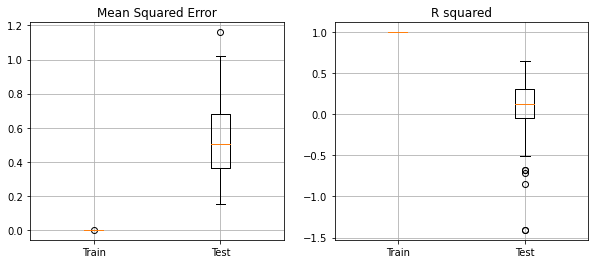

Train MSE standard deviation: 3.605243454375946e-07
Test MSE standard deviation:  0.21511072530626474

Train_R2 standard deviation: 4.7269396182055004e-07
Test_R2 standard deviation:  0.36363570503684983


In [28]:
 Model_Performance(model,X_train,y_train,X_test, y_test)

In [30]:
y_pred_Train  = model.predict(X_train)  #Predictions on training model
y_pred_Test   = model.predict(X_test) 


Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.923734020074541
Mean Absolute Error: 0.10267807197534537
Mean Squared Error: 0.07352134919885346
Root Mean Squared Error: 0.2711482052288996


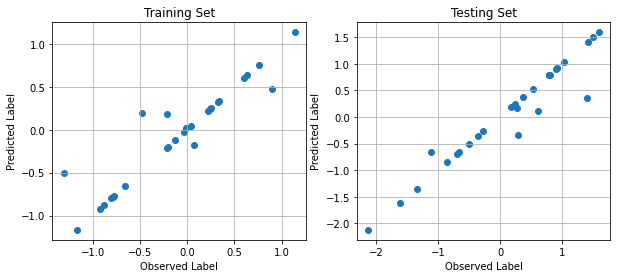

In [31]:
Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

  0%|          | 0/100 [00:00<?, ?it/s]

0:	learn: 0.7709336	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7272945	total: 32.2ms	remaining: 1.58s
2:	learn: 0.6986183	total: 47.6ms	remaining: 1.54s
3:	learn: 0.6648818	total: 62.9ms	remaining: 1.51s
4:	learn: 0.6269319	total: 79.7ms	remaining: 1.51s
5:	learn: 0.5962133	total: 94.8ms	remaining: 1.48s
6:	learn: 0.5699482	total: 110ms	remaining: 1.46s
7:	learn: 0.5454433	total: 125ms	remaining: 1.44s
8:	learn: 0.5149442	total: 140ms	remaining: 1.42s
9:	learn: 0.4881377	total: 155ms	remaining: 1.4s
10:	learn: 0.4664919	total: 170ms	remaining: 1.37s
11:	learn: 0.4479361	total: 185ms	remaining: 1.35s
12:	learn: 0.4269313	total: 200ms	remaining: 1.34s
13:	learn: 0.4068127	total: 222ms	remaining: 1.36s
14:	learn: 0.3845259	total: 241ms	remaining: 1.36s
15:	learn: 0.3684781	total: 259ms	remaining: 1.36s
16:	learn: 0.3580526	total: 274ms	remaining: 1.34s
17:	learn: 0.3402121	total: 289ms	remaining: 1.31s
18:	learn: 0.3246579	total: 304ms	remaining: 1.29s
19:	learn: 0.3123765	total: 318ms	rem

  1%|          | 1/100 [00:01<02:51,  1.74s/it]

92:	learn: 0.0019440	total: 1.48s	remaining: 111ms
93:	learn: 0.0017941	total: 1.5s	remaining: 95.5ms
94:	learn: 0.0016600	total: 1.51s	remaining: 79.5ms
95:	learn: 0.0015413	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0014230	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0013123	total: 1.55s	remaining: 31.8ms
98:	learn: 0.0012246	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011329	total: 1.58s	remaining: 0us
0:	learn: 0.7781734	total: 20.5ms	remaining: 2.03s
1:	learn: 0.7433704	total: 36.2ms	remaining: 1.77s
2:	learn: 0.7100471	total: 50.9ms	remaining: 1.64s
3:	learn: 0.6830959	total: 65.6ms	remaining: 1.57s
4:	learn: 0.6451604	total: 81.3ms	remaining: 1.54s
5:	learn: 0.6184121	total: 96.3ms	remaining: 1.51s
6:	learn: 0.5852372	total: 114ms	remaining: 1.52s
7:	learn: 0.5576689	total: 129ms	remaining: 1.49s
8:	learn: 0.5255758	total: 145ms	remaining: 1.47s
9:	learn: 0.4974557	total: 161ms	remaining: 1.45s
10:	learn: 0.4691428	total: 176ms	remaining: 1.42s
11:	learn: 0.4530789	total: 192m

  2%|▏         | 2/100 [00:03<02:49,  1.73s/it]

94:	learn: 0.0018027	total: 1.5s	remaining: 79.1ms
95:	learn: 0.0016798	total: 1.52s	remaining: 63.3ms
96:	learn: 0.0015575	total: 1.53s	remaining: 47.4ms
97:	learn: 0.0014366	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0013363	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0012266	total: 1.58s	remaining: 0us
0:	learn: 0.8244756	total: 16.5ms	remaining: 1.63s
1:	learn: 0.7799961	total: 32.1ms	remaining: 1.57s
2:	learn: 0.7506687	total: 46.9ms	remaining: 1.52s
3:	learn: 0.7148968	total: 66.4ms	remaining: 1.59s
4:	learn: 0.6749605	total: 81.5ms	remaining: 1.55s
5:	learn: 0.6412747	total: 96.5ms	remaining: 1.51s
6:	learn: 0.6113445	total: 111ms	remaining: 1.48s
7:	learn: 0.5812104	total: 126ms	remaining: 1.45s
8:	learn: 0.5502804	total: 141ms	remaining: 1.43s
9:	learn: 0.5218163	total: 157ms	remaining: 1.42s
10:	learn: 0.4948521	total: 173ms	remaining: 1.4s
11:	learn: 0.4749315	total: 188ms	remaining: 1.38s
12:	learn: 0.4464033	total: 203ms	remaining: 1.36s
13:	learn: 0.4275877	total: 223ms	

  3%|▎         | 3/100 [00:05<02:53,  1.79s/it]

0:	learn: 0.8238538	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7813248	total: 32.3ms	remaining: 1.58s
2:	learn: 0.7457413	total: 48.9ms	remaining: 1.58s
3:	learn: 0.7039091	total: 65.6ms	remaining: 1.57s
4:	learn: 0.6661042	total: 80.7ms	remaining: 1.53s
5:	learn: 0.6357271	total: 96.1ms	remaining: 1.5s
6:	learn: 0.6036904	total: 113ms	remaining: 1.5s
7:	learn: 0.5751049	total: 128ms	remaining: 1.47s
8:	learn: 0.5457074	total: 143ms	remaining: 1.45s
9:	learn: 0.5218246	total: 158ms	remaining: 1.42s
10:	learn: 0.4927485	total: 173ms	remaining: 1.4s
11:	learn: 0.4706581	total: 188ms	remaining: 1.38s
12:	learn: 0.4466595	total: 204ms	remaining: 1.37s
13:	learn: 0.4216302	total: 223ms	remaining: 1.37s
14:	learn: 0.3968304	total: 241ms	remaining: 1.36s
15:	learn: 0.3811248	total: 257ms	remaining: 1.35s
16:	learn: 0.3698676	total: 272ms	remaining: 1.33s
17:	learn: 0.3577064	total: 287ms	remaining: 1.31s
18:	learn: 0.3430575	total: 303ms	remaining: 1.29s
19:	learn: 0.3347620	total: 317ms	rema

  4%|▍         | 4/100 [00:07<02:50,  1.77s/it]

92:	learn: 0.0020311	total: 1.48s	remaining: 111ms
93:	learn: 0.0018735	total: 1.5s	remaining: 95.7ms
94:	learn: 0.0017363	total: 1.52s	remaining: 79.9ms
95:	learn: 0.0015985	total: 1.53s	remaining: 63.9ms
96:	learn: 0.0014796	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0013680	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0012692	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0011685	total: 1.59s	remaining: 0us
0:	learn: 0.8200702	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7853727	total: 32ms	remaining: 1.57s
2:	learn: 0.7497156	total: 51.3ms	remaining: 1.66s
3:	learn: 0.7144312	total: 66.2ms	remaining: 1.59s
4:	learn: 0.6764572	total: 81.3ms	remaining: 1.54s
5:	learn: 0.6450949	total: 98.9ms	remaining: 1.55s
6:	learn: 0.6136755	total: 114ms	remaining: 1.51s
7:	learn: 0.5839897	total: 129ms	remaining: 1.48s
8:	learn: 0.5577766	total: 144ms	remaining: 1.46s
9:	learn: 0.5237908	total: 159ms	remaining: 1.43s
10:	learn: 0.4962667	total: 174ms	remaining: 1.41s
11:	learn: 0.4754035	total: 190ms	r

  5%|▌         | 5/100 [00:08<02:46,  1.76s/it]

93:	learn: 0.0019062	total: 1.49s	remaining: 94.9ms
94:	learn: 0.0017735	total: 1.5s	remaining: 79.1ms
95:	learn: 0.0016417	total: 1.52s	remaining: 63.2ms
96:	learn: 0.0015190	total: 1.53s	remaining: 47.4ms
97:	learn: 0.0014137	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0013066	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0012133	total: 1.58s	remaining: 0us
0:	learn: 0.7901723	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7556916	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7206335	total: 46.9ms	remaining: 1.52s
3:	learn: 0.6926080	total: 61.8ms	remaining: 1.48s
4:	learn: 0.6491956	total: 88.5ms	remaining: 1.68s
5:	learn: 0.6165387	total: 104ms	remaining: 1.62s
6:	learn: 0.5809477	total: 119ms	remaining: 1.58s
7:	learn: 0.5567394	total: 134ms	remaining: 1.54s
8:	learn: 0.5208274	total: 149ms	remaining: 1.51s
9:	learn: 0.4957750	total: 165ms	remaining: 1.48s
10:	learn: 0.4678242	total: 180ms	remaining: 1.46s
11:	learn: 0.4423961	total: 195ms	remaining: 1.43s
12:	learn: 0.4172482	total: 211ms

  6%|▌         | 6/100 [00:10<02:44,  1.75s/it]

94:	learn: 0.0020068	total: 1.51s	remaining: 79.6ms
95:	learn: 0.0018513	total: 1.53s	remaining: 63.7ms
96:	learn: 0.0017023	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0015820	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0014587	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0013435	total: 1.59s	remaining: 0us
0:	learn: 0.7218060	total: 15.7ms	remaining: 1.55s
1:	learn: 0.6877645	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6558044	total: 46.5ms	remaining: 1.5s
3:	learn: 0.6211465	total: 64.4ms	remaining: 1.55s
4:	learn: 0.5832616	total: 79.6ms	remaining: 1.51s
5:	learn: 0.5626232	total: 94.4ms	remaining: 1.48s
6:	learn: 0.5404213	total: 110ms	remaining: 1.47s
7:	learn: 0.5156693	total: 125ms	remaining: 1.44s
8:	learn: 0.4901016	total: 140ms	remaining: 1.42s
9:	learn: 0.4700222	total: 156ms	remaining: 1.4s
10:	learn: 0.4407050	total: 171ms	remaining: 1.38s
11:	learn: 0.4264191	total: 186ms	remaining: 1.36s
12:	learn: 0.4049089	total: 200ms	remaining: 1.34s
13:	learn: 0.3876411	total: 222ms	

  7%|▋         | 7/100 [00:12<02:41,  1.74s/it]

93:	learn: 0.0023213	total: 1.49s	remaining: 94.9ms
94:	learn: 0.0021461	total: 1.5s	remaining: 79.1ms
95:	learn: 0.0019879	total: 1.52s	remaining: 63.2ms
96:	learn: 0.0018452	total: 1.53s	remaining: 47.4ms
97:	learn: 0.0017126	total: 1.55s	remaining: 31.6ms
98:	learn: 0.0015863	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0014674	total: 1.58s	remaining: 0us
0:	learn: 0.7673851	total: 18ms	remaining: 1.78s
1:	learn: 0.7332268	total: 33.9ms	remaining: 1.66s
2:	learn: 0.6895936	total: 50.9ms	remaining: 1.65s
3:	learn: 0.6601999	total: 67ms	remaining: 1.61s
4:	learn: 0.6341655	total: 82.3ms	remaining: 1.56s
5:	learn: 0.6093396	total: 97.4ms	remaining: 1.53s
6:	learn: 0.5792210	total: 112ms	remaining: 1.49s
7:	learn: 0.5549490	total: 128ms	remaining: 1.47s
8:	learn: 0.5269536	total: 144ms	remaining: 1.45s
9:	learn: 0.5001538	total: 158ms	remaining: 1.42s
10:	learn: 0.4778022	total: 173ms	remaining: 1.4s
11:	learn: 0.4547935	total: 188ms	remaining: 1.38s
12:	learn: 0.4378016	total: 205ms	rem

  8%|▊         | 8/100 [00:14<02:42,  1.77s/it]

0:	learn: 0.7728270	total: 15.5ms	remaining: 1.54s
1:	learn: 0.7450905	total: 31.1ms	remaining: 1.52s
2:	learn: 0.7169871	total: 45.9ms	remaining: 1.48s
3:	learn: 0.6881130	total: 63.3ms	remaining: 1.52s
4:	learn: 0.6466202	total: 78.5ms	remaining: 1.49s
5:	learn: 0.6149351	total: 94ms	remaining: 1.47s
6:	learn: 0.5793734	total: 109ms	remaining: 1.45s
7:	learn: 0.5506071	total: 124ms	remaining: 1.43s
8:	learn: 0.5212889	total: 139ms	remaining: 1.41s
9:	learn: 0.4955127	total: 154ms	remaining: 1.39s
10:	learn: 0.4710473	total: 169ms	remaining: 1.37s
11:	learn: 0.4453853	total: 184ms	remaining: 1.35s
12:	learn: 0.4215563	total: 199ms	remaining: 1.33s
13:	learn: 0.4051993	total: 214ms	remaining: 1.31s
14:	learn: 0.3851569	total: 232ms	remaining: 1.32s
15:	learn: 0.3672095	total: 250ms	remaining: 1.31s
16:	learn: 0.3493998	total: 265ms	remaining: 1.29s
17:	learn: 0.3331417	total: 280ms	remaining: 1.28s
18:	learn: 0.3156543	total: 295ms	remaining: 1.26s
19:	learn: 0.2999358	total: 310ms	rem

  9%|▉         | 9/100 [00:15<02:39,  1.75s/it]

95:	learn: 0.0016616	total: 1.5s	remaining: 62.7ms
96:	learn: 0.0015297	total: 1.52s	remaining: 47ms
97:	learn: 0.0014099	total: 1.53s	remaining: 31.3ms
98:	learn: 0.0013077	total: 1.55s	remaining: 15.7ms
99:	learn: 0.0012149	total: 1.56s	remaining: 0us
0:	learn: 0.7691486	total: 18.6ms	remaining: 1.84s
1:	learn: 0.7303084	total: 33.9ms	remaining: 1.66s
2:	learn: 0.6991814	total: 49.3ms	remaining: 1.59s
3:	learn: 0.6622162	total: 64.4ms	remaining: 1.55s
4:	learn: 0.6217786	total: 79.9ms	remaining: 1.52s
5:	learn: 0.5839912	total: 97.9ms	remaining: 1.53s
6:	learn: 0.5565636	total: 113ms	remaining: 1.5s
7:	learn: 0.5281893	total: 128ms	remaining: 1.47s
8:	learn: 0.4987003	total: 143ms	remaining: 1.45s
9:	learn: 0.4725377	total: 158ms	remaining: 1.43s
10:	learn: 0.4457519	total: 175ms	remaining: 1.42s
11:	learn: 0.4323645	total: 190ms	remaining: 1.39s
12:	learn: 0.4154554	total: 205ms	remaining: 1.37s
13:	learn: 0.3937267	total: 231ms	remaining: 1.42s
14:	learn: 0.3733425	total: 249ms	rem

 10%|█         | 10/100 [00:17<02:37,  1.75s/it]

93:	learn: 0.0016958	total: 1.5s	remaining: 95.8ms
94:	learn: 0.0015691	total: 1.52s	remaining: 79.8ms
95:	learn: 0.0014619	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0013521	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0012469	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0011509	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0010682	total: 1.59s	remaining: 0us
0:	learn: 0.7828507	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7423457	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6988646	total: 49.3ms	remaining: 1.59s
3:	learn: 0.6638665	total: 64.1ms	remaining: 1.54s
4:	learn: 0.6266071	total: 78.9ms	remaining: 1.5s
5:	learn: 0.5953371	total: 93.9ms	remaining: 1.47s
6:	learn: 0.5604607	total: 110ms	remaining: 1.46s
7:	learn: 0.5372278	total: 124ms	remaining: 1.43s
8:	learn: 0.5107174	total: 140ms	remaining: 1.41s
9:	learn: 0.4791052	total: 155ms	remaining: 1.39s
10:	learn: 0.4576813	total: 170ms	remaining: 1.38s
11:	learn: 0.4393552	total: 187ms	remaining: 1.37s
12:	learn: 0.4141620	total: 202ms

 11%|█         | 11/100 [00:19<02:35,  1.74s/it]

93:	learn: 0.0018642	total: 1.49s	remaining: 95ms
94:	learn: 0.0017425	total: 1.5s	remaining: 79.1ms
95:	learn: 0.0016072	total: 1.52s	remaining: 63.5ms
96:	learn: 0.0014882	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0013700	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0012625	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011682	total: 1.59s	remaining: 0us
0:	learn: 0.7430203	total: 15.9ms	remaining: 1.57s
1:	learn: 0.7151148	total: 31.6ms	remaining: 1.55s
2:	learn: 0.6833671	total: 46.6ms	remaining: 1.51s
3:	learn: 0.6476857	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6181642	total: 81ms	remaining: 1.54s
5:	learn: 0.5857244	total: 95.8ms	remaining: 1.5s
6:	learn: 0.5549615	total: 111ms	remaining: 1.47s
7:	learn: 0.5340446	total: 126ms	remaining: 1.45s
8:	learn: 0.5044226	total: 141ms	remaining: 1.42s
9:	learn: 0.4879834	total: 156ms	remaining: 1.4s
10:	learn: 0.4596295	total: 171ms	remaining: 1.38s
11:	learn: 0.4377188	total: 185ms	remaining: 1.36s
12:	learn: 0.4165186	total: 200ms	remai

 12%|█▏        | 12/100 [00:21<02:33,  1.74s/it]

93:	learn: 0.0018216	total: 1.49s	remaining: 95.2ms
94:	learn: 0.0016800	total: 1.51s	remaining: 79.4ms
95:	learn: 0.0015488	total: 1.52s	remaining: 63.5ms
96:	learn: 0.0014350	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0013201	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012229	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011258	total: 1.58s	remaining: 0us
0:	learn: 0.7534854	total: 15.9ms	remaining: 1.57s
1:	learn: 0.7127537	total: 31.2ms	remaining: 1.53s
2:	learn: 0.6663380	total: 46.1ms	remaining: 1.49s
3:	learn: 0.6351846	total: 60.7ms	remaining: 1.46s
4:	learn: 0.6011984	total: 78.6ms	remaining: 1.49s
5:	learn: 0.5618854	total: 104ms	remaining: 1.62s
6:	learn: 0.5325558	total: 118ms	remaining: 1.57s
7:	learn: 0.5055997	total: 134ms	remaining: 1.53s
8:	learn: 0.4774363	total: 148ms	remaining: 1.5s
9:	learn: 0.4500860	total: 164ms	remaining: 1.48s
10:	learn: 0.4276740	total: 180ms	remaining: 1.45s
11:	learn: 0.4084670	total: 200ms	remaining: 1.47s
12:	learn: 0.3851086	total: 217ms

 13%|█▎        | 13/100 [00:22<02:33,  1.77s/it]

0:	learn: 0.7994325	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7660468	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7396459	total: 49.4ms	remaining: 1.6s
3:	learn: 0.7090787	total: 64.4ms	remaining: 1.54s
4:	learn: 0.6673669	total: 79.6ms	remaining: 1.51s
5:	learn: 0.6296441	total: 95ms	remaining: 1.49s
6:	learn: 0.6027592	total: 110ms	remaining: 1.46s
7:	learn: 0.5771114	total: 125ms	remaining: 1.43s
8:	learn: 0.5482751	total: 140ms	remaining: 1.41s
9:	learn: 0.5160835	total: 155ms	remaining: 1.39s
10:	learn: 0.4908732	total: 170ms	remaining: 1.37s
11:	learn: 0.4652107	total: 186ms	remaining: 1.37s
12:	learn: 0.4455227	total: 202ms	remaining: 1.35s
13:	learn: 0.4260780	total: 219ms	remaining: 1.34s
14:	learn: 0.4068552	total: 236ms	remaining: 1.33s
15:	learn: 0.3897301	total: 251ms	remaining: 1.32s
16:	learn: 0.3806187	total: 266ms	remaining: 1.3s
17:	learn: 0.3642979	total: 288ms	remaining: 1.31s
18:	learn: 0.3489012	total: 307ms	remaining: 1.31s
19:	learn: 0.3350646	total: 322ms	remai

 14%|█▍        | 14/100 [00:24<02:31,  1.76s/it]

91:	learn: 0.0027961	total: 1.48s	remaining: 129ms
92:	learn: 0.0026028	total: 1.5s	remaining: 113ms
93:	learn: 0.0024181	total: 1.51s	remaining: 96.5ms
94:	learn: 0.0022632	total: 1.53s	remaining: 80.4ms
95:	learn: 0.0021044	total: 1.54s	remaining: 64.3ms
96:	learn: 0.0019598	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0018260	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0016925	total: 1.59s	remaining: 16ms
99:	learn: 0.0015669	total: 1.6s	remaining: 0us
0:	learn: 0.7670484	total: 16ms	remaining: 1.58s
1:	learn: 0.7250773	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6950030	total: 46.8ms	remaining: 1.51s
3:	learn: 0.6641349	total: 63ms	remaining: 1.51s
4:	learn: 0.6262081	total: 80.2ms	remaining: 1.52s
5:	learn: 0.5946509	total: 95.2ms	remaining: 1.49s
6:	learn: 0.5563367	total: 110ms	remaining: 1.46s
7:	learn: 0.5287789	total: 125ms	remaining: 1.44s
8:	learn: 0.4995894	total: 140ms	remaining: 1.42s
9:	learn: 0.4679460	total: 156ms	remaining: 1.4s
10:	learn: 0.4440311	total: 171ms	remain

 15%|█▌        | 15/100 [00:26<02:28,  1.75s/it]

95:	learn: 0.0016597	total: 1.5s	remaining: 62.4ms
96:	learn: 0.0015350	total: 1.51s	remaining: 46.8ms
97:	learn: 0.0014333	total: 1.53s	remaining: 31.2ms
98:	learn: 0.0013300	total: 1.54s	remaining: 15.6ms
99:	learn: 0.0012401	total: 1.56s	remaining: 0us
0:	learn: 0.8220611	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7770689	total: 31.4ms	remaining: 1.54s
2:	learn: 0.7374506	total: 46.1ms	remaining: 1.49s
3:	learn: 0.7032103	total: 60.7ms	remaining: 1.46s
4:	learn: 0.6695401	total: 76.4ms	remaining: 1.45s
5:	learn: 0.6355874	total: 91.4ms	remaining: 1.43s
6:	learn: 0.6085536	total: 106ms	remaining: 1.41s
7:	learn: 0.5845654	total: 121ms	remaining: 1.39s
8:	learn: 0.5532426	total: 136ms	remaining: 1.38s
9:	learn: 0.5190646	total: 151ms	remaining: 1.36s
10:	learn: 0.4861094	total: 166ms	remaining: 1.34s
11:	learn: 0.4628948	total: 181ms	remaining: 1.33s
12:	learn: 0.4356948	total: 196ms	remaining: 1.31s
13:	learn: 0.4167145	total: 214ms	remaining: 1.31s
14:	learn: 0.3980072	total: 234ms	

 16%|█▌        | 16/100 [00:28<02:26,  1.74s/it]

94:	learn: 0.0016396	total: 1.5s	remaining: 79.3ms
95:	learn: 0.0015162	total: 1.52s	remaining: 63.4ms
96:	learn: 0.0014007	total: 1.54s	remaining: 47.5ms
97:	learn: 0.0013011	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012067	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0011220	total: 1.58s	remaining: 0us
0:	learn: 0.8212139	total: 15.5ms	remaining: 1.53s
1:	learn: 0.7758162	total: 31.3ms	remaining: 1.54s
2:	learn: 0.7347528	total: 46.6ms	remaining: 1.5s
3:	learn: 0.6951116	total: 64.7ms	remaining: 1.55s
4:	learn: 0.6594544	total: 79.9ms	remaining: 1.52s
5:	learn: 0.6237662	total: 95.1ms	remaining: 1.49s
6:	learn: 0.5926977	total: 110ms	remaining: 1.46s
7:	learn: 0.5609607	total: 125ms	remaining: 1.44s
8:	learn: 0.5336084	total: 140ms	remaining: 1.42s
9:	learn: 0.5058918	total: 155ms	remaining: 1.4s
10:	learn: 0.4813590	total: 178ms	remaining: 1.44s
11:	learn: 0.4510355	total: 194ms	remaining: 1.43s
12:	learn: 0.4286576	total: 209ms	remaining: 1.4s
13:	learn: 0.4092289	total: 228ms	re

 17%|█▋        | 17/100 [00:29<02:24,  1.75s/it]

93:	learn: 0.0020187	total: 1.51s	remaining: 96.1ms
94:	learn: 0.0018779	total: 1.52s	remaining: 80.1ms
95:	learn: 0.0017469	total: 1.54s	remaining: 64.1ms
96:	learn: 0.0016117	total: 1.55s	remaining: 48ms
97:	learn: 0.0014895	total: 1.57s	remaining: 32ms
98:	learn: 0.0013728	total: 1.58s	remaining: 16ms
99:	learn: 0.0012795	total: 1.6s	remaining: 0us
0:	learn: 0.7903730	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7502735	total: 31ms	remaining: 1.52s
2:	learn: 0.7064989	total: 49.1ms	remaining: 1.59s
3:	learn: 0.6744388	total: 64.4ms	remaining: 1.54s
4:	learn: 0.6389477	total: 80ms	remaining: 1.52s
5:	learn: 0.6121094	total: 95ms	remaining: 1.49s
6:	learn: 0.5783002	total: 110ms	remaining: 1.46s
7:	learn: 0.5504715	total: 125ms	remaining: 1.44s
8:	learn: 0.5211287	total: 140ms	remaining: 1.42s
9:	learn: 0.4909186	total: 155ms	remaining: 1.39s
10:	learn: 0.4679523	total: 170ms	remaining: 1.37s
11:	learn: 0.4476811	total: 185ms	remaining: 1.35s
12:	learn: 0.4294393	total: 202ms	remaining:

 18%|█▊        | 18/100 [00:31<02:25,  1.77s/it]

0:	learn: 0.8421699	total: 16.1ms	remaining: 1.6s
1:	learn: 0.7854928	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7531060	total: 47.5ms	remaining: 1.54s
3:	learn: 0.7252543	total: 63ms	remaining: 1.51s
4:	learn: 0.6881663	total: 78.2ms	remaining: 1.49s
5:	learn: 0.6514153	total: 96.8ms	remaining: 1.52s
6:	learn: 0.6176604	total: 112ms	remaining: 1.49s
7:	learn: 0.5891064	total: 127ms	remaining: 1.46s
8:	learn: 0.5588578	total: 142ms	remaining: 1.43s
9:	learn: 0.5315938	total: 156ms	remaining: 1.41s
10:	learn: 0.5020435	total: 172ms	remaining: 1.39s
11:	learn: 0.4744176	total: 186ms	remaining: 1.37s
12:	learn: 0.4539093	total: 201ms	remaining: 1.35s
13:	learn: 0.4272964	total: 219ms	remaining: 1.35s
14:	learn: 0.4024716	total: 235ms	remaining: 1.33s
15:	learn: 0.3842955	total: 253ms	remaining: 1.33s
16:	learn: 0.3675191	total: 267ms	remaining: 1.31s
17:	learn: 0.3497152	total: 282ms	remaining: 1.29s
18:	learn: 0.3330506	total: 297ms	remaining: 1.27s
19:	learn: 0.3191254	total: 312ms	rema

 19%|█▉        | 19/100 [00:33<02:24,  1.78s/it]

0:	learn: 0.7765727	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7370500	total: 31ms	remaining: 1.52s
2:	learn: 0.6953064	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6562610	total: 63.7ms	remaining: 1.53s
4:	learn: 0.6153551	total: 78.7ms	remaining: 1.49s
5:	learn: 0.5891643	total: 93.4ms	remaining: 1.46s
6:	learn: 0.5684676	total: 110ms	remaining: 1.46s
7:	learn: 0.5438708	total: 125ms	remaining: 1.44s
8:	learn: 0.5207846	total: 140ms	remaining: 1.42s
9:	learn: 0.4998499	total: 155ms	remaining: 1.4s
10:	learn: 0.4714929	total: 170ms	remaining: 1.38s
11:	learn: 0.4466023	total: 185ms	remaining: 1.36s
12:	learn: 0.4265364	total: 200ms	remaining: 1.34s
13:	learn: 0.4060159	total: 219ms	remaining: 1.35s
14:	learn: 0.3864589	total: 241ms	remaining: 1.36s
15:	learn: 0.3708624	total: 256ms	remaining: 1.34s
16:	learn: 0.3569405	total: 271ms	remaining: 1.32s
17:	learn: 0.3387609	total: 285ms	remaining: 1.3s
18:	learn: 0.3220807	total: 301ms	remaining: 1.28s
19:	learn: 0.3077113	total: 316ms	remai

 20%|██        | 20/100 [00:35<02:22,  1.78s/it]

0:	learn: 0.7962574	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7633286	total: 32ms	remaining: 1.57s
2:	learn: 0.7219686	total: 48.1ms	remaining: 1.56s
3:	learn: 0.6847693	total: 66.4ms	remaining: 1.59s
4:	learn: 0.6518647	total: 81.9ms	remaining: 1.56s
5:	learn: 0.6265937	total: 97.2ms	remaining: 1.52s
6:	learn: 0.5988495	total: 119ms	remaining: 1.58s
7:	learn: 0.5736543	total: 139ms	remaining: 1.59s
8:	learn: 0.5413823	total: 154ms	remaining: 1.55s
9:	learn: 0.5081334	total: 169ms	remaining: 1.52s
10:	learn: 0.4830249	total: 184ms	remaining: 1.49s
11:	learn: 0.4649818	total: 200ms	remaining: 1.47s
12:	learn: 0.4434068	total: 220ms	remaining: 1.48s
13:	learn: 0.4270476	total: 236ms	remaining: 1.45s
14:	learn: 0.4122992	total: 251ms	remaining: 1.42s
15:	learn: 0.3870375	total: 266ms	remaining: 1.4s
16:	learn: 0.3723917	total: 281ms	remaining: 1.37s
17:	learn: 0.3613114	total: 296ms	remaining: 1.35s
18:	learn: 0.3401257	total: 311ms	remaining: 1.33s
19:	learn: 0.3273596	total: 328ms	rema

 21%|██        | 21/100 [00:36<02:20,  1.78s/it]

0:	learn: 0.7779122	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7424470	total: 33.1ms	remaining: 1.62s
2:	learn: 0.7169127	total: 48.4ms	remaining: 1.56s
3:	learn: 0.6863554	total: 63.7ms	remaining: 1.53s
4:	learn: 0.6565062	total: 80.8ms	remaining: 1.53s
5:	learn: 0.6259957	total: 99.5ms	remaining: 1.56s
6:	learn: 0.5991838	total: 115ms	remaining: 1.53s
7:	learn: 0.5782900	total: 131ms	remaining: 1.5s
8:	learn: 0.5506801	total: 147ms	remaining: 1.48s
9:	learn: 0.5194086	total: 162ms	remaining: 1.46s
10:	learn: 0.4942380	total: 178ms	remaining: 1.44s
11:	learn: 0.4723450	total: 193ms	remaining: 1.42s
12:	learn: 0.4505376	total: 209ms	remaining: 1.4s
13:	learn: 0.4304075	total: 230ms	remaining: 1.41s
14:	learn: 0.4083368	total: 247ms	remaining: 1.4s
15:	learn: 0.3835874	total: 274ms	remaining: 1.44s
16:	learn: 0.3686658	total: 297ms	remaining: 1.45s
17:	learn: 0.3523965	total: 315ms	remaining: 1.43s
18:	learn: 0.3318237	total: 331ms	remaining: 1.41s
19:	learn: 0.3182641	total: 347ms	remai

 22%|██▏       | 22/100 [00:38<02:19,  1.79s/it]

0:	learn: 0.7951540	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7587970	total: 32.2ms	remaining: 1.58s
2:	learn: 0.7223618	total: 50.7ms	remaining: 1.64s
3:	learn: 0.6988442	total: 65.9ms	remaining: 1.58s
4:	learn: 0.6598655	total: 81.3ms	remaining: 1.54s
5:	learn: 0.6275313	total: 96.9ms	remaining: 1.52s
6:	learn: 0.5836895	total: 113ms	remaining: 1.5s
7:	learn: 0.5523146	total: 129ms	remaining: 1.48s
8:	learn: 0.5192302	total: 144ms	remaining: 1.46s
9:	learn: 0.4910819	total: 160ms	remaining: 1.44s
10:	learn: 0.4751596	total: 175ms	remaining: 1.42s
11:	learn: 0.4563445	total: 191ms	remaining: 1.4s
12:	learn: 0.4253736	total: 212ms	remaining: 1.42s
13:	learn: 0.4074882	total: 232ms	remaining: 1.43s
14:	learn: 0.3914706	total: 249ms	remaining: 1.41s
15:	learn: 0.3702934	total: 264ms	remaining: 1.39s
16:	learn: 0.3543878	total: 279ms	remaining: 1.36s
17:	learn: 0.3356471	total: 295ms	remaining: 1.34s
18:	learn: 0.3221297	total: 310ms	remaining: 1.32s
19:	learn: 0.3094934	total: 328ms	rem

 23%|██▎       | 23/100 [00:40<02:17,  1.79s/it]

0:	learn: 0.6676687	total: 16.6ms	remaining: 1.64s
1:	learn: 0.6378899	total: 32.3ms	remaining: 1.58s
2:	learn: 0.6066868	total: 47.4ms	remaining: 1.53s
3:	learn: 0.5882063	total: 62.4ms	remaining: 1.5s
4:	learn: 0.5547059	total: 77.2ms	remaining: 1.47s
5:	learn: 0.5251683	total: 92ms	remaining: 1.44s
6:	learn: 0.5072033	total: 108ms	remaining: 1.44s
7:	learn: 0.4858424	total: 124ms	remaining: 1.43s
8:	learn: 0.4593466	total: 139ms	remaining: 1.41s
9:	learn: 0.4299660	total: 155ms	remaining: 1.39s
10:	learn: 0.4054451	total: 170ms	remaining: 1.37s
11:	learn: 0.3875645	total: 185ms	remaining: 1.35s
12:	learn: 0.3698747	total: 200ms	remaining: 1.34s
13:	learn: 0.3471097	total: 215ms	remaining: 1.32s
14:	learn: 0.3313261	total: 235ms	remaining: 1.33s
15:	learn: 0.3208012	total: 251ms	remaining: 1.32s
16:	learn: 0.3106588	total: 267ms	remaining: 1.3s
17:	learn: 0.2994424	total: 282ms	remaining: 1.28s
18:	learn: 0.2822981	total: 298ms	remaining: 1.27s
19:	learn: 0.2756198	total: 313ms	remai

 24%|██▍       | 24/100 [00:42<02:17,  1.81s/it]

0:	learn: 0.8063871	total: 17.3ms	remaining: 1.71s
1:	learn: 0.7695160	total: 33.2ms	remaining: 1.63s
2:	learn: 0.7265754	total: 51.3ms	remaining: 1.66s
3:	learn: 0.7013798	total: 68.9ms	remaining: 1.65s
4:	learn: 0.6663336	total: 84.7ms	remaining: 1.61s
5:	learn: 0.6358394	total: 100ms	remaining: 1.57s
6:	learn: 0.6028287	total: 116ms	remaining: 1.54s
7:	learn: 0.5766812	total: 131ms	remaining: 1.51s
8:	learn: 0.5455396	total: 147ms	remaining: 1.48s
9:	learn: 0.5118282	total: 163ms	remaining: 1.46s
10:	learn: 0.4841213	total: 180ms	remaining: 1.46s
11:	learn: 0.4607958	total: 196ms	remaining: 1.44s
12:	learn: 0.4373398	total: 211ms	remaining: 1.41s
13:	learn: 0.4151329	total: 232ms	remaining: 1.43s
14:	learn: 0.3920889	total: 248ms	remaining: 1.41s
15:	learn: 0.3717611	total: 263ms	remaining: 1.38s
16:	learn: 0.3535877	total: 279ms	remaining: 1.36s
17:	learn: 0.3422694	total: 294ms	remaining: 1.34s
18:	learn: 0.3233894	total: 308ms	remaining: 1.31s
19:	learn: 0.3130762	total: 324ms	re

 25%|██▌       | 25/100 [00:44<02:15,  1.81s/it]

0:	learn: 0.7283571	total: 16.8ms	remaining: 1.67s
1:	learn: 0.6880175	total: 34.2ms	remaining: 1.67s
2:	learn: 0.6488772	total: 51.8ms	remaining: 1.67s
3:	learn: 0.6221707	total: 67.7ms	remaining: 1.62s
4:	learn: 0.5881539	total: 83.5ms	remaining: 1.59s
5:	learn: 0.5618179	total: 103ms	remaining: 1.61s
6:	learn: 0.5418394	total: 118ms	remaining: 1.57s
7:	learn: 0.5237712	total: 134ms	remaining: 1.54s
8:	learn: 0.5002933	total: 149ms	remaining: 1.5s
9:	learn: 0.4781064	total: 165ms	remaining: 1.48s
10:	learn: 0.4559630	total: 183ms	remaining: 1.48s
11:	learn: 0.4347163	total: 198ms	remaining: 1.45s
12:	learn: 0.4154285	total: 213ms	remaining: 1.43s
13:	learn: 0.3958611	total: 236ms	remaining: 1.45s
14:	learn: 0.3762352	total: 256ms	remaining: 1.45s
15:	learn: 0.3616176	total: 272ms	remaining: 1.43s
16:	learn: 0.3440067	total: 288ms	remaining: 1.41s
17:	learn: 0.3303126	total: 303ms	remaining: 1.38s
18:	learn: 0.3128040	total: 318ms	remaining: 1.35s
19:	learn: 0.3028170	total: 334ms	rem

 26%|██▌       | 26/100 [00:46<02:14,  1.81s/it]

0:	learn: 0.7847498	total: 16.7ms	remaining: 1.66s
1:	learn: 0.7468129	total: 35.3ms	remaining: 1.73s
2:	learn: 0.7048701	total: 51.5ms	remaining: 1.66s
3:	learn: 0.6799173	total: 67.4ms	remaining: 1.62s
4:	learn: 0.6500094	total: 83.1ms	remaining: 1.58s
5:	learn: 0.6208609	total: 100ms	remaining: 1.57s
6:	learn: 0.5868981	total: 119ms	remaining: 1.58s
7:	learn: 0.5690251	total: 135ms	remaining: 1.55s
8:	learn: 0.5399376	total: 151ms	remaining: 1.53s
9:	learn: 0.5071425	total: 167ms	remaining: 1.5s
10:	learn: 0.4810715	total: 188ms	remaining: 1.52s
11:	learn: 0.4582072	total: 203ms	remaining: 1.49s
12:	learn: 0.4357698	total: 224ms	remaining: 1.5s
13:	learn: 0.4179922	total: 240ms	remaining: 1.47s
14:	learn: 0.3979321	total: 256ms	remaining: 1.45s
15:	learn: 0.3763426	total: 273ms	remaining: 1.44s
16:	learn: 0.3563673	total: 291ms	remaining: 1.42s
17:	learn: 0.3403331	total: 307ms	remaining: 1.4s
18:	learn: 0.3261167	total: 323ms	remaining: 1.38s
19:	learn: 0.3151532	total: 341ms	remai

 27%|██▋       | 27/100 [00:47<02:12,  1.81s/it]

0:	learn: 0.8409129	total: 15.8ms	remaining: 1.56s
1:	learn: 0.8035515	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7637846	total: 46.9ms	remaining: 1.52s
3:	learn: 0.7344806	total: 64.5ms	remaining: 1.55s
4:	learn: 0.6980715	total: 81.4ms	remaining: 1.55s
5:	learn: 0.6715276	total: 98.3ms	remaining: 1.54s
6:	learn: 0.6452103	total: 119ms	remaining: 1.58s
7:	learn: 0.6094325	total: 137ms	remaining: 1.57s
8:	learn: 0.5788735	total: 154ms	remaining: 1.56s
9:	learn: 0.5452958	total: 171ms	remaining: 1.54s
10:	learn: 0.5180060	total: 189ms	remaining: 1.53s
11:	learn: 0.4947670	total: 205ms	remaining: 1.5s
12:	learn: 0.4718665	total: 226ms	remaining: 1.51s
13:	learn: 0.4536577	total: 242ms	remaining: 1.48s
14:	learn: 0.4298351	total: 261ms	remaining: 1.48s
15:	learn: 0.4074826	total: 277ms	remaining: 1.45s
16:	learn: 0.3931959	total: 295ms	remaining: 1.44s
17:	learn: 0.3797541	total: 310ms	remaining: 1.41s
18:	learn: 0.3575244	total: 326ms	remaining: 1.39s
19:	learn: 0.3421282	total: 343ms	re

 28%|██▊       | 28/100 [00:49<02:12,  1.83s/it]

0:	learn: 0.7675447	total: 15.8ms	remaining: 1.57s
1:	learn: 0.7365850	total: 31.3ms	remaining: 1.53s
2:	learn: 0.6987974	total: 46.1ms	remaining: 1.49s
3:	learn: 0.6646482	total: 63.9ms	remaining: 1.53s
4:	learn: 0.6237455	total: 78.9ms	remaining: 1.5s
5:	learn: 0.5885048	total: 93.7ms	remaining: 1.47s
6:	learn: 0.5657793	total: 109ms	remaining: 1.45s
7:	learn: 0.5437866	total: 124ms	remaining: 1.43s
8:	learn: 0.5129832	total: 141ms	remaining: 1.42s
9:	learn: 0.4840291	total: 158ms	remaining: 1.42s
10:	learn: 0.4565962	total: 176ms	remaining: 1.42s
11:	learn: 0.4393654	total: 195ms	remaining: 1.43s
12:	learn: 0.4186218	total: 211ms	remaining: 1.41s
13:	learn: 0.3940800	total: 231ms	remaining: 1.42s
14:	learn: 0.3733198	total: 247ms	remaining: 1.4s
15:	learn: 0.3524575	total: 261ms	remaining: 1.37s
16:	learn: 0.3320537	total: 277ms	remaining: 1.35s
17:	learn: 0.3176660	total: 292ms	remaining: 1.33s
18:	learn: 0.3001845	total: 307ms	remaining: 1.31s
19:	learn: 0.2906481	total: 322ms	rem

 29%|██▉       | 29/100 [00:51<02:08,  1.80s/it]

95:	learn: 0.0015576	total: 1.52s	remaining: 63.5ms
96:	learn: 0.0014446	total: 1.54s	remaining: 47.6ms
97:	learn: 0.0013330	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0012361	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011474	total: 1.58s	remaining: 0us
0:	learn: 0.8284726	total: 20.5ms	remaining: 2.03s
1:	learn: 0.7831976	total: 37.7ms	remaining: 1.85s
2:	learn: 0.7341985	total: 53.2ms	remaining: 1.72s
3:	learn: 0.7063465	total: 68.1ms	remaining: 1.63s
4:	learn: 0.6656372	total: 85.8ms	remaining: 1.63s
5:	learn: 0.6330900	total: 101ms	remaining: 1.58s
6:	learn: 0.5990055	total: 124ms	remaining: 1.64s
7:	learn: 0.5660723	total: 139ms	remaining: 1.6s
8:	learn: 0.5383326	total: 154ms	remaining: 1.56s
9:	learn: 0.5109563	total: 169ms	remaining: 1.52s
10:	learn: 0.4799140	total: 184ms	remaining: 1.49s
11:	learn: 0.4578081	total: 199ms	remaining: 1.46s
12:	learn: 0.4278748	total: 216ms	remaining: 1.44s
13:	learn: 0.4072224	total: 237ms	remaining: 1.45s
14:	learn: 0.3866732	total: 252ms	r

 30%|███       | 30/100 [00:53<02:05,  1.79s/it]

91:	learn: 0.0020308	total: 1.49s	remaining: 129ms
92:	learn: 0.0018854	total: 1.5s	remaining: 113ms
93:	learn: 0.0017343	total: 1.52s	remaining: 96.9ms
94:	learn: 0.0015932	total: 1.53s	remaining: 80.8ms
95:	learn: 0.0014708	total: 1.55s	remaining: 64.6ms
96:	learn: 0.0013702	total: 1.56s	remaining: 48.4ms
97:	learn: 0.0012605	total: 1.58s	remaining: 32.2ms
98:	learn: 0.0011720	total: 1.6s	remaining: 16.1ms
99:	learn: 0.0010926	total: 1.61s	remaining: 0us
0:	learn: 0.8438645	total: 15.6ms	remaining: 1.55s
1:	learn: 0.8092585	total: 30.9ms	remaining: 1.51s
2:	learn: 0.7626233	total: 45.8ms	remaining: 1.48s
3:	learn: 0.7254505	total: 63.2ms	remaining: 1.52s
4:	learn: 0.6867295	total: 79.4ms	remaining: 1.51s
5:	learn: 0.6502277	total: 95.8ms	remaining: 1.5s
6:	learn: 0.6175204	total: 111ms	remaining: 1.47s
7:	learn: 0.5824640	total: 126ms	remaining: 1.45s
8:	learn: 0.5440668	total: 141ms	remaining: 1.43s
9:	learn: 0.5066176	total: 156ms	remaining: 1.41s
10:	learn: 0.4748202	total: 172ms	

 31%|███       | 31/100 [00:55<02:02,  1.78s/it]

92:	learn: 0.0019772	total: 1.49s	remaining: 112ms
93:	learn: 0.0018381	total: 1.5s	remaining: 96.1ms
94:	learn: 0.0017020	total: 1.52s	remaining: 80ms
95:	learn: 0.0015770	total: 1.54s	remaining: 64ms
96:	learn: 0.0014618	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0013578	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0012527	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0011596	total: 1.61s	remaining: 0us
0:	learn: 0.7293114	total: 15.8ms	remaining: 1.56s
1:	learn: 0.6894085	total: 31.2ms	remaining: 1.53s
2:	learn: 0.6695629	total: 45.9ms	remaining: 1.48s
3:	learn: 0.6389102	total: 61.8ms	remaining: 1.48s
4:	learn: 0.6082361	total: 76.7ms	remaining: 1.46s
5:	learn: 0.5728315	total: 91.5ms	remaining: 1.43s
6:	learn: 0.5350467	total: 109ms	remaining: 1.44s
7:	learn: 0.5138356	total: 124ms	remaining: 1.42s
8:	learn: 0.4873518	total: 139ms	remaining: 1.4s
9:	learn: 0.4620440	total: 154ms	remaining: 1.38s
10:	learn: 0.4355322	total: 169ms	remaining: 1.36s
11:	learn: 0.4220985	total: 184ms	rem

 32%|███▏      | 32/100 [00:56<02:00,  1.77s/it]

93:	learn: 0.0018794	total: 1.49s	remaining: 95.2ms
94:	learn: 0.0017383	total: 1.51s	remaining: 79.6ms
95:	learn: 0.0016226	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0014980	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0013915	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0012837	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0011852	total: 1.59s	remaining: 0us
0:	learn: 0.8304027	total: 15.5ms	remaining: 1.53s
1:	learn: 0.7883870	total: 30.8ms	remaining: 1.51s
2:	learn: 0.7418139	total: 45.8ms	remaining: 1.48s
3:	learn: 0.7122653	total: 68.4ms	remaining: 1.64s
4:	learn: 0.6752240	total: 83.1ms	remaining: 1.58s
5:	learn: 0.6368613	total: 97.9ms	remaining: 1.53s
6:	learn: 0.6074311	total: 113ms	remaining: 1.5s
7:	learn: 0.5822897	total: 128ms	remaining: 1.47s
8:	learn: 0.5514444	total: 143ms	remaining: 1.44s
9:	learn: 0.5277507	total: 159ms	remaining: 1.43s
10:	learn: 0.5012455	total: 174ms	remaining: 1.41s
11:	learn: 0.4802431	total: 189ms	remaining: 1.39s
12:	learn: 0.4605402	total: 204m

 33%|███▎      | 33/100 [00:58<01:58,  1.76s/it]

94:	learn: 0.0019023	total: 1.52s	remaining: 80ms
95:	learn: 0.0017657	total: 1.53s	remaining: 64ms
96:	learn: 0.0016350	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0015073	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0014013	total: 1.58s	remaining: 16ms
99:	learn: 0.0012956	total: 1.59s	remaining: 0us
0:	learn: 0.8109339	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7662587	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7311145	total: 46.2ms	remaining: 1.49s
3:	learn: 0.6991113	total: 61.1ms	remaining: 1.47s
4:	learn: 0.6659483	total: 75.8ms	remaining: 1.44s
5:	learn: 0.6230919	total: 90.6ms	remaining: 1.42s
6:	learn: 0.5957740	total: 105ms	remaining: 1.4s
7:	learn: 0.5648646	total: 121ms	remaining: 1.4s
8:	learn: 0.5367608	total: 137ms	remaining: 1.38s
9:	learn: 0.5073548	total: 161ms	remaining: 1.45s
10:	learn: 0.4742054	total: 177ms	remaining: 1.43s
11:	learn: 0.4579945	total: 194ms	remaining: 1.42s
12:	learn: 0.4332223	total: 209ms	remaining: 1.4s
13:	learn: 0.4066967	total: 229ms	remaini

 34%|███▍      | 34/100 [01:00<01:57,  1.78s/it]

92:	learn: 0.0019165	total: 1.49s	remaining: 112ms
93:	learn: 0.0017678	total: 1.5s	remaining: 95.8ms
94:	learn: 0.0016381	total: 1.52s	remaining: 79.8ms
95:	learn: 0.0015137	total: 1.53s	remaining: 63.8ms
96:	learn: 0.0014047	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0012992	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0012058	total: 1.58s	remaining: 16ms
99:	learn: 0.0011183	total: 1.6s	remaining: 0us
0:	learn: 0.8228331	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7922226	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7587240	total: 46.9ms	remaining: 1.51s
3:	learn: 0.7277042	total: 61.8ms	remaining: 1.48s
4:	learn: 0.6886295	total: 80ms	remaining: 1.52s
5:	learn: 0.6520105	total: 95ms	remaining: 1.49s
6:	learn: 0.6278492	total: 110ms	remaining: 1.46s
7:	learn: 0.5979897	total: 125ms	remaining: 1.43s
8:	learn: 0.5719238	total: 141ms	remaining: 1.42s
9:	learn: 0.5506388	total: 156ms	remaining: 1.4s
10:	learn: 0.5206165	total: 172ms	remaining: 1.39s
11:	learn: 0.5020260	total: 188ms	remain

 35%|███▌      | 35/100 [01:02<01:55,  1.77s/it]

91:	learn: 0.0026136	total: 1.47s	remaining: 128ms
92:	learn: 0.0024263	total: 1.49s	remaining: 112ms
93:	learn: 0.0022513	total: 1.5s	remaining: 96ms
94:	learn: 0.0020787	total: 1.52s	remaining: 80ms
95:	learn: 0.0019310	total: 1.53s	remaining: 64ms
96:	learn: 0.0017878	total: 1.55s	remaining: 47.9ms
97:	learn: 0.0016649	total: 1.56s	remaining: 31.9ms
98:	learn: 0.0015382	total: 1.58s	remaining: 16ms
99:	learn: 0.0014172	total: 1.6s	remaining: 0us
0:	learn: 0.7979337	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7621001	total: 33.8ms	remaining: 1.66s
2:	learn: 0.7315914	total: 52.2ms	remaining: 1.69s
3:	learn: 0.6977347	total: 67.4ms	remaining: 1.62s
4:	learn: 0.6629011	total: 82.6ms	remaining: 1.57s
5:	learn: 0.6365465	total: 97.4ms	remaining: 1.52s
6:	learn: 0.6146232	total: 112ms	remaining: 1.49s
7:	learn: 0.5816269	total: 127ms	remaining: 1.46s
8:	learn: 0.5544922	total: 142ms	remaining: 1.44s
9:	learn: 0.5235361	total: 158ms	remaining: 1.42s
10:	learn: 0.4866505	total: 172ms	remaini

 36%|███▌      | 36/100 [01:03<01:52,  1.76s/it]

94:	learn: 0.0019752	total: 1.51s	remaining: 79.6ms
95:	learn: 0.0018240	total: 1.53s	remaining: 63.7ms
96:	learn: 0.0016865	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0015566	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0014415	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0013296	total: 1.59s	remaining: 0us
0:	learn: 0.6890058	total: 27.7ms	remaining: 2.74s
1:	learn: 0.6653273	total: 43.3ms	remaining: 2.12s
2:	learn: 0.6385024	total: 58.4ms	remaining: 1.89s
3:	learn: 0.6205268	total: 73.6ms	remaining: 1.77s
4:	learn: 0.5845160	total: 88.7ms	remaining: 1.69s
5:	learn: 0.5466253	total: 104ms	remaining: 1.63s
6:	learn: 0.5215327	total: 119ms	remaining: 1.58s
7:	learn: 0.5009864	total: 134ms	remaining: 1.54s
8:	learn: 0.4811615	total: 151ms	remaining: 1.53s
9:	learn: 0.4596724	total: 166ms	remaining: 1.49s
10:	learn: 0.4395643	total: 181ms	remaining: 1.46s
11:	learn: 0.4282864	total: 196ms	remaining: 1.44s
12:	learn: 0.4075027	total: 211ms	remaining: 1.41s
13:	learn: 0.3900712	total: 226ms

 37%|███▋      | 37/100 [01:05<01:50,  1.76s/it]

94:	learn: 0.0017752	total: 1.52s	remaining: 80.2ms
95:	learn: 0.0016451	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0015301	total: 1.56s	remaining: 48.1ms
97:	learn: 0.0014280	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013177	total: 1.59s	remaining: 16ms
99:	learn: 0.0012125	total: 1.6s	remaining: 0us
0:	learn: 0.8141636	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7715720	total: 31.3ms	remaining: 1.53s
2:	learn: 0.7386017	total: 46.1ms	remaining: 1.49s
3:	learn: 0.7039909	total: 65.7ms	remaining: 1.58s
4:	learn: 0.6602573	total: 80.8ms	remaining: 1.53s
5:	learn: 0.6185452	total: 95.8ms	remaining: 1.5s
6:	learn: 0.5907239	total: 111ms	remaining: 1.47s
7:	learn: 0.5638910	total: 127ms	remaining: 1.46s
8:	learn: 0.5339188	total: 142ms	remaining: 1.43s
9:	learn: 0.5043131	total: 157ms	remaining: 1.41s
10:	learn: 0.4798916	total: 172ms	remaining: 1.39s
11:	learn: 0.4592163	total: 189ms	remaining: 1.38s
12:	learn: 0.4312701	total: 206ms	remaining: 1.38s
13:	learn: 0.4094007	total: 226ms	re

 38%|███▊      | 38/100 [01:07<01:50,  1.79s/it]

0:	learn: 0.7538421	total: 16ms	remaining: 1.58s
1:	learn: 0.7141137	total: 31.6ms	remaining: 1.55s
2:	learn: 0.6699325	total: 46.7ms	remaining: 1.51s
3:	learn: 0.6385334	total: 61.6ms	remaining: 1.48s
4:	learn: 0.6039065	total: 77.7ms	remaining: 1.48s
5:	learn: 0.5785240	total: 94.1ms	remaining: 1.47s
6:	learn: 0.5492932	total: 110ms	remaining: 1.47s
7:	learn: 0.5292341	total: 126ms	remaining: 1.45s
8:	learn: 0.5049737	total: 141ms	remaining: 1.43s
9:	learn: 0.4779373	total: 157ms	remaining: 1.41s
10:	learn: 0.4511060	total: 172ms	remaining: 1.39s
11:	learn: 0.4351406	total: 188ms	remaining: 1.38s
12:	learn: 0.4117132	total: 202ms	remaining: 1.35s
13:	learn: 0.3919741	total: 218ms	remaining: 1.34s
14:	learn: 0.3685905	total: 240ms	remaining: 1.36s
15:	learn: 0.3589737	total: 254ms	remaining: 1.33s
16:	learn: 0.3433883	total: 269ms	remaining: 1.31s
17:	learn: 0.3261898	total: 284ms	remaining: 1.29s
18:	learn: 0.3106675	total: 300ms	remaining: 1.28s
19:	learn: 0.2963353	total: 322ms	rem

 39%|███▉      | 39/100 [01:09<01:48,  1.78s/it]

91:	learn: 0.0022617	total: 1.5s	remaining: 131ms
92:	learn: 0.0020988	total: 1.52s	remaining: 114ms
93:	learn: 0.0019471	total: 1.53s	remaining: 97.8ms
94:	learn: 0.0017994	total: 1.55s	remaining: 81.4ms
95:	learn: 0.0016742	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0015432	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0014278	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0013339	total: 1.61s	remaining: 16.2ms
99:	learn: 0.0012424	total: 1.62s	remaining: 0us
0:	learn: 0.8309211	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7931414	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7503438	total: 46.3ms	remaining: 1.5s
3:	learn: 0.7294315	total: 65.6ms	remaining: 1.57s
4:	learn: 0.6853109	total: 80.7ms	remaining: 1.53s
5:	learn: 0.6469677	total: 97.7ms	remaining: 1.53s
6:	learn: 0.6174930	total: 112ms	remaining: 1.49s
7:	learn: 0.5872866	total: 127ms	remaining: 1.46s
8:	learn: 0.5519195	total: 142ms	remaining: 1.44s
9:	learn: 0.5312109	total: 157ms	remaining: 1.42s
10:	learn: 0.5037894	total: 173ms

 40%|████      | 40/100 [01:10<01:46,  1.77s/it]

92:	learn: 0.0023138	total: 1.48s	remaining: 111ms
93:	learn: 0.0021447	total: 1.49s	remaining: 95.4ms
94:	learn: 0.0019758	total: 1.51s	remaining: 79.5ms
95:	learn: 0.0018172	total: 1.53s	remaining: 63.6ms
96:	learn: 0.0016769	total: 1.54s	remaining: 47.7ms
97:	learn: 0.0015518	total: 1.56s	remaining: 31.8ms
98:	learn: 0.0014252	total: 1.57s	remaining: 15.9ms
99:	learn: 0.0013182	total: 1.59s	remaining: 0us
0:	learn: 0.7720333	total: 19.5ms	remaining: 1.93s
1:	learn: 0.7271668	total: 40ms	remaining: 1.96s
2:	learn: 0.6897411	total: 55ms	remaining: 1.78s
3:	learn: 0.6593729	total: 72.9ms	remaining: 1.75s
4:	learn: 0.6242418	total: 87.9ms	remaining: 1.67s
5:	learn: 0.5934555	total: 103ms	remaining: 1.61s
6:	learn: 0.5728471	total: 118ms	remaining: 1.57s
7:	learn: 0.5487452	total: 134ms	remaining: 1.54s
8:	learn: 0.5163394	total: 149ms	remaining: 1.51s
9:	learn: 0.4942700	total: 166ms	remaining: 1.5s
10:	learn: 0.4641563	total: 182ms	remaining: 1.47s
11:	learn: 0.4466989	total: 197ms	rem

 41%|████      | 41/100 [01:12<01:44,  1.78s/it]

0:	learn: 0.7979795	total: 15.8ms	remaining: 1.57s
1:	learn: 0.7689436	total: 31.7ms	remaining: 1.55s
2:	learn: 0.7304269	total: 46.9ms	remaining: 1.51s
3:	learn: 0.7060474	total: 63.3ms	remaining: 1.52s
4:	learn: 0.6730501	total: 81.3ms	remaining: 1.54s
5:	learn: 0.6392317	total: 96.4ms	remaining: 1.51s
6:	learn: 0.6183898	total: 111ms	remaining: 1.48s
7:	learn: 0.5898399	total: 126ms	remaining: 1.45s
8:	learn: 0.5631197	total: 141ms	remaining: 1.43s
9:	learn: 0.5272766	total: 156ms	remaining: 1.41s
10:	learn: 0.4955464	total: 171ms	remaining: 1.39s
11:	learn: 0.4758710	total: 187ms	remaining: 1.37s
12:	learn: 0.4522686	total: 204ms	remaining: 1.36s
13:	learn: 0.4336456	total: 224ms	remaining: 1.37s
14:	learn: 0.4126776	total: 241ms	remaining: 1.37s
15:	learn: 0.3915920	total: 265ms	remaining: 1.39s
16:	learn: 0.3712361	total: 281ms	remaining: 1.37s
17:	learn: 0.3563590	total: 296ms	remaining: 1.35s
18:	learn: 0.3389603	total: 312ms	remaining: 1.33s
19:	learn: 0.3254217	total: 328ms	r

 42%|████▏     | 42/100 [01:14<01:44,  1.79s/it]

0:	learn: 0.7111565	total: 15.6ms	remaining: 1.54s
1:	learn: 0.6791471	total: 30.9ms	remaining: 1.51s
2:	learn: 0.6496729	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6275448	total: 61.2ms	remaining: 1.47s
4:	learn: 0.5874098	total: 76ms	remaining: 1.44s
5:	learn: 0.5585082	total: 91ms	remaining: 1.42s
6:	learn: 0.5326811	total: 106ms	remaining: 1.41s
7:	learn: 0.5155155	total: 122ms	remaining: 1.4s
8:	learn: 0.4886222	total: 139ms	remaining: 1.4s
9:	learn: 0.4627371	total: 154ms	remaining: 1.39s
10:	learn: 0.4434868	total: 171ms	remaining: 1.38s
11:	learn: 0.4253926	total: 186ms	remaining: 1.36s
12:	learn: 0.4120074	total: 201ms	remaining: 1.35s
13:	learn: 0.3961407	total: 217ms	remaining: 1.33s
14:	learn: 0.3770454	total: 235ms	remaining: 1.33s
15:	learn: 0.3624449	total: 250ms	remaining: 1.31s
16:	learn: 0.3547507	total: 265ms	remaining: 1.3s
17:	learn: 0.3375065	total: 280ms	remaining: 1.28s
18:	learn: 0.3231818	total: 295ms	remaining: 1.26s
19:	learn: 0.3091889	total: 310ms	remainin

 43%|████▎     | 43/100 [01:16<01:42,  1.80s/it]

0:	learn: 0.8253276	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7884409	total: 31.1ms	remaining: 1.52s
2:	learn: 0.7454738	total: 46ms	remaining: 1.49s
3:	learn: 0.7131472	total: 62.4ms	remaining: 1.5s
4:	learn: 0.6717044	total: 77.3ms	remaining: 1.47s
5:	learn: 0.6289124	total: 94.9ms	remaining: 1.49s
6:	learn: 0.5915168	total: 110ms	remaining: 1.47s
7:	learn: 0.5642486	total: 125ms	remaining: 1.44s
8:	learn: 0.5303833	total: 140ms	remaining: 1.42s
9:	learn: 0.5027710	total: 155ms	remaining: 1.4s
10:	learn: 0.4738616	total: 170ms	remaining: 1.38s
11:	learn: 0.4496750	total: 187ms	remaining: 1.37s
12:	learn: 0.4327103	total: 203ms	remaining: 1.36s
13:	learn: 0.4084402	total: 225ms	remaining: 1.38s
14:	learn: 0.3860461	total: 241ms	remaining: 1.36s
15:	learn: 0.3668387	total: 256ms	remaining: 1.34s
16:	learn: 0.3499839	total: 272ms	remaining: 1.33s
17:	learn: 0.3337449	total: 288ms	remaining: 1.31s
18:	learn: 0.3174181	total: 303ms	remaining: 1.29s
19:	learn: 0.3028650	total: 317ms	remai

 44%|████▍     | 44/100 [01:18<01:42,  1.83s/it]

0:	learn: 0.8182591	total: 16.2ms	remaining: 1.61s
1:	learn: 0.7759373	total: 35ms	remaining: 1.71s
2:	learn: 0.7272830	total: 53.9ms	remaining: 1.74s
3:	learn: 0.6918287	total: 70.6ms	remaining: 1.69s
4:	learn: 0.6513904	total: 86.2ms	remaining: 1.64s
5:	learn: 0.6164571	total: 101ms	remaining: 1.59s
6:	learn: 0.5840765	total: 117ms	remaining: 1.55s
7:	learn: 0.5547220	total: 132ms	remaining: 1.52s
8:	learn: 0.5176334	total: 147ms	remaining: 1.49s
9:	learn: 0.4909474	total: 162ms	remaining: 1.46s
10:	learn: 0.4689020	total: 177ms	remaining: 1.43s
11:	learn: 0.4522500	total: 192ms	remaining: 1.41s
12:	learn: 0.4293859	total: 207ms	remaining: 1.39s
13:	learn: 0.4061504	total: 228ms	remaining: 1.4s
14:	learn: 0.3859755	total: 245ms	remaining: 1.39s
15:	learn: 0.3638143	total: 260ms	remaining: 1.36s
16:	learn: 0.3477435	total: 275ms	remaining: 1.34s
17:	learn: 0.3327593	total: 290ms	remaining: 1.32s
18:	learn: 0.3201497	total: 305ms	remaining: 1.3s
19:	learn: 0.3004340	total: 320ms	remain

 45%|████▌     | 45/100 [01:20<01:39,  1.81s/it]

92:	learn: 0.0019967	total: 1.5s	remaining: 113ms
93:	learn: 0.0018550	total: 1.52s	remaining: 97.4ms
94:	learn: 0.0017169	total: 1.54s	remaining: 81.1ms
95:	learn: 0.0015875	total: 1.55s	remaining: 64.8ms
96:	learn: 0.0014774	total: 1.57s	remaining: 48.6ms
97:	learn: 0.0013692	total: 1.58s	remaining: 32.4ms
98:	learn: 0.0012679	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0011795	total: 1.62s	remaining: 0us
0:	learn: 0.7794451	total: 17.4ms	remaining: 1.72s
1:	learn: 0.7333645	total: 34.8ms	remaining: 1.7s
2:	learn: 0.7019083	total: 55.9ms	remaining: 1.81s
3:	learn: 0.6620527	total: 81.3ms	remaining: 1.95s
4:	learn: 0.6259191	total: 96.7ms	remaining: 1.84s
5:	learn: 0.5961417	total: 112ms	remaining: 1.76s
6:	learn: 0.5764498	total: 129ms	remaining: 1.71s
7:	learn: 0.5492238	total: 145ms	remaining: 1.66s
8:	learn: 0.5183092	total: 161ms	remaining: 1.62s
9:	learn: 0.4944828	total: 176ms	remaining: 1.58s
10:	learn: 0.4635162	total: 192ms	remaining: 1.55s
11:	learn: 0.4459829	total: 207ms	r

 46%|████▌     | 46/100 [01:21<01:38,  1.82s/it]

0:	learn: 0.8181986	total: 15.8ms	remaining: 1.57s
1:	learn: 0.7721185	total: 31.7ms	remaining: 1.55s
2:	learn: 0.7304354	total: 46.9ms	remaining: 1.51s
3:	learn: 0.6925874	total: 65ms	remaining: 1.56s
4:	learn: 0.6594359	total: 80.6ms	remaining: 1.53s
5:	learn: 0.6280661	total: 96.1ms	remaining: 1.5s
6:	learn: 0.6042099	total: 112ms	remaining: 1.49s
7:	learn: 0.5800709	total: 128ms	remaining: 1.47s
8:	learn: 0.5458591	total: 143ms	remaining: 1.45s
9:	learn: 0.5206160	total: 159ms	remaining: 1.43s
10:	learn: 0.4868128	total: 175ms	remaining: 1.41s
11:	learn: 0.4717042	total: 192ms	remaining: 1.41s
12:	learn: 0.4508811	total: 211ms	remaining: 1.41s
13:	learn: 0.4267088	total: 237ms	remaining: 1.45s
14:	learn: 0.4022847	total: 254ms	remaining: 1.44s
15:	learn: 0.3859660	total: 270ms	remaining: 1.42s
16:	learn: 0.3716598	total: 293ms	remaining: 1.43s
17:	learn: 0.3571908	total: 314ms	remaining: 1.43s
18:	learn: 0.3448841	total: 334ms	remaining: 1.42s
19:	learn: 0.3314403	total: 353ms	rema

 47%|████▋     | 47/100 [01:23<01:36,  1.81s/it]

0:	learn: 0.8225001	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7884638	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7479224	total: 49.9ms	remaining: 1.61s
3:	learn: 0.7157061	total: 66.3ms	remaining: 1.59s
4:	learn: 0.6762727	total: 81.4ms	remaining: 1.55s
5:	learn: 0.6379715	total: 96.4ms	remaining: 1.51s
6:	learn: 0.5991311	total: 112ms	remaining: 1.48s
7:	learn: 0.5791614	total: 126ms	remaining: 1.45s
8:	learn: 0.5469927	total: 141ms	remaining: 1.43s
9:	learn: 0.5144434	total: 156ms	remaining: 1.41s
10:	learn: 0.4832402	total: 171ms	remaining: 1.39s
11:	learn: 0.4647594	total: 189ms	remaining: 1.38s
12:	learn: 0.4432151	total: 204ms	remaining: 1.36s
13:	learn: 0.4196456	total: 225ms	remaining: 1.38s
14:	learn: 0.3900298	total: 241ms	remaining: 1.37s
15:	learn: 0.3725140	total: 256ms	remaining: 1.34s
16:	learn: 0.3540916	total: 272ms	remaining: 1.33s
17:	learn: 0.3389549	total: 287ms	remaining: 1.31s
18:	learn: 0.3230554	total: 302ms	remaining: 1.29s
19:	learn: 0.3111863	total: 318ms	r

 48%|████▊     | 48/100 [01:25<01:35,  1.83s/it]

0:	learn: 0.8220315	total: 16.1ms	remaining: 1.59s
1:	learn: 0.7817008	total: 33ms	remaining: 1.62s
2:	learn: 0.7526623	total: 52.8ms	remaining: 1.71s
3:	learn: 0.7218806	total: 67.8ms	remaining: 1.63s
4:	learn: 0.6836869	total: 82.7ms	remaining: 1.57s
5:	learn: 0.6501885	total: 97.6ms	remaining: 1.53s
6:	learn: 0.6228855	total: 113ms	remaining: 1.49s
7:	learn: 0.6021259	total: 127ms	remaining: 1.46s
8:	learn: 0.5680981	total: 142ms	remaining: 1.44s
9:	learn: 0.5365452	total: 157ms	remaining: 1.42s
10:	learn: 0.5077581	total: 172ms	remaining: 1.39s
11:	learn: 0.4848426	total: 191ms	remaining: 1.4s
12:	learn: 0.4665390	total: 206ms	remaining: 1.38s
13:	learn: 0.4481778	total: 225ms	remaining: 1.38s
14:	learn: 0.4270062	total: 241ms	remaining: 1.36s
15:	learn: 0.4074974	total: 256ms	remaining: 1.34s
16:	learn: 0.3866009	total: 271ms	remaining: 1.32s
17:	learn: 0.3695450	total: 286ms	remaining: 1.3s
18:	learn: 0.3487956	total: 300ms	remaining: 1.28s
19:	learn: 0.3297559	total: 315ms	remai

 49%|████▉     | 49/100 [01:27<01:33,  1.82s/it]

0:	learn: 0.7655789	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7327361	total: 31.4ms	remaining: 1.54s
2:	learn: 0.6924317	total: 47.5ms	remaining: 1.54s
3:	learn: 0.6523796	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6199663	total: 77.3ms	remaining: 1.47s
5:	learn: 0.5881731	total: 93ms	remaining: 1.46s
6:	learn: 0.5572942	total: 108ms	remaining: 1.44s
7:	learn: 0.5352688	total: 126ms	remaining: 1.45s
8:	learn: 0.5016565	total: 141ms	remaining: 1.43s
9:	learn: 0.4715663	total: 158ms	remaining: 1.42s
10:	learn: 0.4497230	total: 173ms	remaining: 1.4s
11:	learn: 0.4268765	total: 190ms	remaining: 1.39s
12:	learn: 0.4036626	total: 209ms	remaining: 1.4s
13:	learn: 0.3861999	total: 229ms	remaining: 1.41s
14:	learn: 0.3675511	total: 245ms	remaining: 1.39s
15:	learn: 0.3504919	total: 259ms	remaining: 1.36s
16:	learn: 0.3370369	total: 274ms	remaining: 1.34s
17:	learn: 0.3243644	total: 289ms	remaining: 1.32s
18:	learn: 0.3083440	total: 304ms	remaining: 1.3s
19:	learn: 0.2990271	total: 314ms	remaini

 50%|█████     | 50/100 [01:29<01:30,  1.82s/it]

91:	learn: 0.0022006	total: 1.5s	remaining: 131ms
92:	learn: 0.0020222	total: 1.52s	remaining: 115ms
93:	learn: 0.0018734	total: 1.54s	remaining: 98.3ms
94:	learn: 0.0017319	total: 1.55s	remaining: 81.9ms
95:	learn: 0.0016025	total: 1.57s	remaining: 65.5ms
96:	learn: 0.0014966	total: 1.59s	remaining: 49.1ms
97:	learn: 0.0013771	total: 1.6s	remaining: 32.7ms
98:	learn: 0.0012670	total: 1.62s	remaining: 16.3ms
99:	learn: 0.0011760	total: 1.64s	remaining: 0us
0:	learn: 0.8023802	total: 16ms	remaining: 1.58s
1:	learn: 0.7479598	total: 31.8ms	remaining: 1.56s
2:	learn: 0.7206902	total: 49.6ms	remaining: 1.6s
3:	learn: 0.6950082	total: 67.8ms	remaining: 1.63s
4:	learn: 0.6556091	total: 83ms	remaining: 1.58s
5:	learn: 0.6147627	total: 98.1ms	remaining: 1.54s
6:	learn: 0.5810810	total: 113ms	remaining: 1.5s
7:	learn: 0.5597580	total: 139ms	remaining: 1.59s
8:	learn: 0.5350330	total: 157ms	remaining: 1.58s
9:	learn: 0.5130810	total: 173ms	remaining: 1.55s
10:	learn: 0.4826066	total: 188ms	remai

 51%|█████     | 51/100 [01:30<01:28,  1.81s/it]

92:	learn: 0.0020916	total: 1.52s	remaining: 114ms
93:	learn: 0.0019464	total: 1.53s	remaining: 98ms
94:	learn: 0.0018128	total: 1.55s	remaining: 81.6ms
95:	learn: 0.0016873	total: 1.57s	remaining: 65.3ms
96:	learn: 0.0015673	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0014578	total: 1.6s	remaining: 32.6ms
98:	learn: 0.0013428	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0012510	total: 1.63s	remaining: 0us
0:	learn: 0.7802040	total: 16.6ms	remaining: 1.64s
1:	learn: 0.7354153	total: 32.8ms	remaining: 1.6s
2:	learn: 0.6951259	total: 48.4ms	remaining: 1.56s
3:	learn: 0.6686716	total: 67.9ms	remaining: 1.63s
4:	learn: 0.6322155	total: 83.8ms	remaining: 1.59s
5:	learn: 0.5990309	total: 99.2ms	remaining: 1.55s
6:	learn: 0.5765927	total: 114ms	remaining: 1.52s
7:	learn: 0.5551236	total: 130ms	remaining: 1.49s
8:	learn: 0.5201245	total: 145ms	remaining: 1.46s
9:	learn: 0.4964127	total: 160ms	remaining: 1.44s
10:	learn: 0.4763133	total: 176ms	remaining: 1.42s
11:	learn: 0.4506129	total: 192ms	r

 52%|█████▏    | 52/100 [01:32<01:26,  1.81s/it]

0:	learn: 0.7969184	total: 16.4ms	remaining: 1.62s
1:	learn: 0.7523114	total: 32.3ms	remaining: 1.58s
2:	learn: 0.7129456	total: 47.7ms	remaining: 1.54s
3:	learn: 0.6829202	total: 65.5ms	remaining: 1.57s
4:	learn: 0.6501236	total: 80.8ms	remaining: 1.53s
5:	learn: 0.6188881	total: 95.7ms	remaining: 1.5s
6:	learn: 0.5903921	total: 111ms	remaining: 1.47s
7:	learn: 0.5643752	total: 126ms	remaining: 1.45s
8:	learn: 0.5310227	total: 141ms	remaining: 1.43s
9:	learn: 0.5020969	total: 157ms	remaining: 1.41s
10:	learn: 0.4739578	total: 173ms	remaining: 1.4s
11:	learn: 0.4564933	total: 189ms	remaining: 1.39s
12:	learn: 0.4304457	total: 207ms	remaining: 1.39s
13:	learn: 0.4068106	total: 229ms	remaining: 1.41s
14:	learn: 0.3795988	total: 246ms	remaining: 1.39s
15:	learn: 0.3607034	total: 262ms	remaining: 1.38s
16:	learn: 0.3466215	total: 279ms	remaining: 1.36s
17:	learn: 0.3307273	total: 294ms	remaining: 1.34s
18:	learn: 0.3133656	total: 309ms	remaining: 1.32s
19:	learn: 0.3015983	total: 326ms	rem

 53%|█████▎    | 53/100 [01:34<01:24,  1.80s/it]

0:	learn: 0.8021664	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7662481	total: 30.6ms	remaining: 1.5s
2:	learn: 0.7219644	total: 45.5ms	remaining: 1.47s
3:	learn: 0.6922809	total: 60.2ms	remaining: 1.44s
4:	learn: 0.6517912	total: 75.1ms	remaining: 1.43s
5:	learn: 0.6189836	total: 89.9ms	remaining: 1.41s
6:	learn: 0.5909105	total: 105ms	remaining: 1.4s
7:	learn: 0.5650034	total: 120ms	remaining: 1.38s
8:	learn: 0.5351129	total: 136ms	remaining: 1.37s
9:	learn: 0.5081501	total: 151ms	remaining: 1.36s
10:	learn: 0.4797670	total: 166ms	remaining: 1.34s
11:	learn: 0.4576910	total: 185ms	remaining: 1.36s
12:	learn: 0.4382065	total: 200ms	remaining: 1.34s
13:	learn: 0.4162485	total: 218ms	remaining: 1.34s
14:	learn: 0.3975646	total: 236ms	remaining: 1.33s
15:	learn: 0.3773241	total: 251ms	remaining: 1.32s
16:	learn: 0.3640351	total: 266ms	remaining: 1.3s
17:	learn: 0.3463814	total: 281ms	remaining: 1.28s
18:	learn: 0.3291129	total: 296ms	remaining: 1.26s
19:	learn: 0.3154822	total: 311ms	rema

 54%|█████▍    | 54/100 [01:36<01:23,  1.82s/it]

0:	learn: 0.7854261	total: 16.7ms	remaining: 1.65s
1:	learn: 0.7588744	total: 33.8ms	remaining: 1.66s
2:	learn: 0.7283601	total: 51.8ms	remaining: 1.68s
3:	learn: 0.7072320	total: 67.6ms	remaining: 1.62s
4:	learn: 0.6683252	total: 85.1ms	remaining: 1.62s
5:	learn: 0.6320026	total: 104ms	remaining: 1.64s
6:	learn: 0.6119297	total: 122ms	remaining: 1.62s
7:	learn: 0.5859715	total: 140ms	remaining: 1.61s
8:	learn: 0.5547622	total: 156ms	remaining: 1.58s
9:	learn: 0.5282640	total: 176ms	remaining: 1.58s
10:	learn: 0.5018168	total: 192ms	remaining: 1.55s
11:	learn: 0.4783795	total: 208ms	remaining: 1.52s
12:	learn: 0.4604966	total: 232ms	remaining: 1.55s
13:	learn: 0.4411882	total: 249ms	remaining: 1.53s
14:	learn: 0.4244310	total: 265ms	remaining: 1.5s
15:	learn: 0.4007547	total: 281ms	remaining: 1.47s
16:	learn: 0.3840185	total: 298ms	remaining: 1.45s
17:	learn: 0.3670079	total: 314ms	remaining: 1.43s
18:	learn: 0.3529663	total: 329ms	remaining: 1.4s
19:	learn: 0.3414881	total: 346ms	rema

 55%|█████▌    | 55/100 [01:38<01:22,  1.82s/it]

0:	learn: 0.8335252	total: 17.9ms	remaining: 1.77s
1:	learn: 0.7813243	total: 34.1ms	remaining: 1.67s
2:	learn: 0.7352989	total: 50.2ms	remaining: 1.62s
3:	learn: 0.7056570	total: 65.2ms	remaining: 1.56s
4:	learn: 0.6668037	total: 80.2ms	remaining: 1.52s
5:	learn: 0.6334669	total: 95.2ms	remaining: 1.49s
6:	learn: 0.5998212	total: 110ms	remaining: 1.46s
7:	learn: 0.5756706	total: 125ms	remaining: 1.44s
8:	learn: 0.5421381	total: 142ms	remaining: 1.44s
9:	learn: 0.5120353	total: 158ms	remaining: 1.42s
10:	learn: 0.4824934	total: 173ms	remaining: 1.4s
11:	learn: 0.4673708	total: 202ms	remaining: 1.48s
12:	learn: 0.4350549	total: 220ms	remaining: 1.47s
13:	learn: 0.4173914	total: 240ms	remaining: 1.48s
14:	learn: 0.3972482	total: 257ms	remaining: 1.46s
15:	learn: 0.3780283	total: 274ms	remaining: 1.44s
16:	learn: 0.3577897	total: 292ms	remaining: 1.42s
17:	learn: 0.3412435	total: 309ms	remaining: 1.41s
18:	learn: 0.3212119	total: 327ms	remaining: 1.39s
19:	learn: 0.3107030	total: 347ms	re

 56%|█████▌    | 56/100 [01:40<01:20,  1.84s/it]

98:	learn: 0.0012687	total: 1.68s	remaining: 16.9ms
99:	learn: 0.0011703	total: 1.69s	remaining: 0us
0:	learn: 0.8156046	total: 16.3ms	remaining: 1.62s
1:	learn: 0.7764591	total: 35.4ms	remaining: 1.73s
2:	learn: 0.7287960	total: 55.4ms	remaining: 1.79s
3:	learn: 0.6875469	total: 74.7ms	remaining: 1.79s
4:	learn: 0.6371820	total: 90.8ms	remaining: 1.72s
5:	learn: 0.6062176	total: 107ms	remaining: 1.67s
6:	learn: 0.5782481	total: 122ms	remaining: 1.62s
7:	learn: 0.5545639	total: 138ms	remaining: 1.59s
8:	learn: 0.5219273	total: 154ms	remaining: 1.55s
9:	learn: 0.4901428	total: 170ms	remaining: 1.53s
10:	learn: 0.4630147	total: 186ms	remaining: 1.5s
11:	learn: 0.4488461	total: 204ms	remaining: 1.49s
12:	learn: 0.4225484	total: 221ms	remaining: 1.48s
13:	learn: 0.3980314	total: 237ms	remaining: 1.45s
14:	learn: 0.3732436	total: 259ms	remaining: 1.47s
15:	learn: 0.3552551	total: 275ms	remaining: 1.44s
16:	learn: 0.3425247	total: 290ms	remaining: 1.41s
17:	learn: 0.3285165	total: 305ms	rema

 57%|█████▋    | 57/100 [01:41<01:19,  1.84s/it]

91:	learn: 0.0019320	total: 1.55s	remaining: 135ms
92:	learn: 0.0017773	total: 1.57s	remaining: 118ms
93:	learn: 0.0016484	total: 1.58s	remaining: 101ms
94:	learn: 0.0015299	total: 1.6s	remaining: 84.1ms
95:	learn: 0.0014158	total: 1.61s	remaining: 67.2ms
96:	learn: 0.0013013	total: 1.63s	remaining: 50.3ms
97:	learn: 0.0012055	total: 1.64s	remaining: 33.5ms
98:	learn: 0.0011108	total: 1.66s	remaining: 16.8ms
99:	learn: 0.0010307	total: 1.68s	remaining: 0us
0:	learn: 0.7765904	total: 16.2ms	remaining: 1.6s
1:	learn: 0.7319413	total: 32.3ms	remaining: 1.58s
2:	learn: 0.6973670	total: 47.9ms	remaining: 1.55s
3:	learn: 0.6714762	total: 63.4ms	remaining: 1.52s
4:	learn: 0.6331752	total: 81.4ms	remaining: 1.55s
5:	learn: 0.6048485	total: 97.1ms	remaining: 1.52s
6:	learn: 0.5821291	total: 113ms	remaining: 1.5s
7:	learn: 0.5544092	total: 128ms	remaining: 1.48s
8:	learn: 0.5266369	total: 144ms	remaining: 1.45s
9:	learn: 0.5027760	total: 159ms	remaining: 1.43s
10:	learn: 0.4715332	total: 174ms	r

 58%|█████▊    | 58/100 [01:43<01:17,  1.85s/it]

0:	learn: 0.7316440	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7056766	total: 31.2ms	remaining: 1.53s
2:	learn: 0.6844666	total: 51.1ms	remaining: 1.65s
3:	learn: 0.6613668	total: 66.5ms	remaining: 1.59s
4:	learn: 0.6259399	total: 82.6ms	remaining: 1.57s
5:	learn: 0.5955769	total: 98.8ms	remaining: 1.55s
6:	learn: 0.5725423	total: 114ms	remaining: 1.52s
7:	learn: 0.5471159	total: 131ms	remaining: 1.5s
8:	learn: 0.5148867	total: 147ms	remaining: 1.49s
9:	learn: 0.4908273	total: 163ms	remaining: 1.47s
10:	learn: 0.4653924	total: 179ms	remaining: 1.45s
11:	learn: 0.4460688	total: 197ms	remaining: 1.45s
12:	learn: 0.4221930	total: 213ms	remaining: 1.43s
13:	learn: 0.4054134	total: 236ms	remaining: 1.45s
14:	learn: 0.3852740	total: 252ms	remaining: 1.43s
15:	learn: 0.3694261	total: 268ms	remaining: 1.41s
16:	learn: 0.3508083	total: 284ms	remaining: 1.39s
17:	learn: 0.3368612	total: 300ms	remaining: 1.36s
18:	learn: 0.3174707	total: 316ms	remaining: 1.34s
19:	learn: 0.3060080	total: 333ms	re

 59%|█████▉    | 59/100 [01:45<01:15,  1.83s/it]

92:	learn: 0.0023278	total: 1.52s	remaining: 115ms
93:	learn: 0.0021572	total: 1.54s	remaining: 98.4ms
94:	learn: 0.0019884	total: 1.56s	remaining: 81.9ms
95:	learn: 0.0018443	total: 1.57s	remaining: 65.5ms
96:	learn: 0.0017019	total: 1.59s	remaining: 49.1ms
97:	learn: 0.0015764	total: 1.6s	remaining: 32.7ms
98:	learn: 0.0014534	total: 1.62s	remaining: 16.3ms
99:	learn: 0.0013539	total: 1.63s	remaining: 0us
0:	learn: 0.8335342	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7934140	total: 32.1ms	remaining: 1.57s
2:	learn: 0.7621894	total: 50.7ms	remaining: 1.64s
3:	learn: 0.7217012	total: 66ms	remaining: 1.58s
4:	learn: 0.6794354	total: 80.9ms	remaining: 1.54s
5:	learn: 0.6383600	total: 96ms	remaining: 1.5s
6:	learn: 0.6091867	total: 111ms	remaining: 1.48s
7:	learn: 0.5772977	total: 126ms	remaining: 1.45s
8:	learn: 0.5501917	total: 142ms	remaining: 1.44s
9:	learn: 0.5144604	total: 157ms	remaining: 1.42s
10:	learn: 0.4808751	total: 172ms	remaining: 1.39s
11:	learn: 0.4570050	total: 188ms	rem

 60%|██████    | 60/100 [01:47<01:12,  1.82s/it]

92:	learn: 0.0022226	total: 1.51s	remaining: 114ms
93:	learn: 0.0020479	total: 1.53s	remaining: 97.4ms
94:	learn: 0.0018843	total: 1.54s	remaining: 81.2ms
95:	learn: 0.0017368	total: 1.56s	remaining: 64.9ms
96:	learn: 0.0016021	total: 1.57s	remaining: 48.6ms
97:	learn: 0.0014939	total: 1.59s	remaining: 32.4ms
98:	learn: 0.0013843	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0012972	total: 1.62s	remaining: 0us
0:	learn: 0.8133263	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7772391	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7393307	total: 45.9ms	remaining: 1.48s
3:	learn: 0.6982803	total: 61ms	remaining: 1.46s
4:	learn: 0.6583202	total: 76ms	remaining: 1.44s
5:	learn: 0.6382694	total: 95.2ms	remaining: 1.49s
6:	learn: 0.6134015	total: 112ms	remaining: 1.49s
7:	learn: 0.5917230	total: 127ms	remaining: 1.47s
8:	learn: 0.5624339	total: 143ms	remaining: 1.44s
9:	learn: 0.5282024	total: 158ms	remaining: 1.42s
10:	learn: 0.5037338	total: 173ms	remaining: 1.4s
11:	learn: 0.4808126	total: 187ms	rem

 61%|██████    | 61/100 [01:49<01:10,  1.81s/it]

0:	learn: 0.7844767	total: 17.1ms	remaining: 1.7s
1:	learn: 0.7484089	total: 38.7ms	remaining: 1.9s
2:	learn: 0.7113551	total: 56.7ms	remaining: 1.83s
3:	learn: 0.6836405	total: 73.7ms	remaining: 1.77s
4:	learn: 0.6513464	total: 90.1ms	remaining: 1.71s
5:	learn: 0.6209068	total: 107ms	remaining: 1.67s
6:	learn: 0.5944278	total: 122ms	remaining: 1.63s
7:	learn: 0.5636872	total: 138ms	remaining: 1.59s
8:	learn: 0.5356999	total: 153ms	remaining: 1.55s
9:	learn: 0.5163142	total: 169ms	remaining: 1.52s
10:	learn: 0.4869647	total: 186ms	remaining: 1.5s
11:	learn: 0.4674347	total: 201ms	remaining: 1.47s
12:	learn: 0.4384271	total: 216ms	remaining: 1.44s
13:	learn: 0.4156233	total: 236ms	remaining: 1.45s
14:	learn: 0.3993044	total: 252ms	remaining: 1.43s
15:	learn: 0.3791001	total: 266ms	remaining: 1.4s
16:	learn: 0.3625316	total: 282ms	remaining: 1.38s
17:	learn: 0.3437385	total: 298ms	remaining: 1.36s
18:	learn: 0.3312506	total: 314ms	remaining: 1.34s
19:	learn: 0.3087206	total: 330ms	remain

 62%|██████▏   | 62/100 [01:51<01:08,  1.81s/it]

0:	learn: 0.8536908	total: 16.5ms	remaining: 1.64s
1:	learn: 0.8070686	total: 33.5ms	remaining: 1.64s
2:	learn: 0.7639160	total: 50ms	remaining: 1.62s
3:	learn: 0.7315092	total: 67ms	remaining: 1.61s
4:	learn: 0.6950597	total: 82.7ms	remaining: 1.57s
5:	learn: 0.6605067	total: 98.4ms	remaining: 1.54s
6:	learn: 0.6319051	total: 114ms	remaining: 1.52s
7:	learn: 0.6017221	total: 131ms	remaining: 1.5s
8:	learn: 0.5701718	total: 146ms	remaining: 1.48s
9:	learn: 0.5408941	total: 162ms	remaining: 1.46s
10:	learn: 0.5136846	total: 180ms	remaining: 1.46s
11:	learn: 0.4869364	total: 197ms	remaining: 1.45s
12:	learn: 0.4571536	total: 214ms	remaining: 1.43s
13:	learn: 0.4310826	total: 236ms	remaining: 1.45s
14:	learn: 0.4057079	total: 251ms	remaining: 1.42s
15:	learn: 0.3822891	total: 267ms	remaining: 1.4s
16:	learn: 0.3670331	total: 282ms	remaining: 1.38s
17:	learn: 0.3524435	total: 298ms	remaining: 1.36s
18:	learn: 0.3312565	total: 314ms	remaining: 1.34s
19:	learn: 0.3167251	total: 330ms	remaini

 63%|██████▎   | 63/100 [01:52<01:07,  1.81s/it]

0:	learn: 0.7240337	total: 16.1ms	remaining: 1.59s
1:	learn: 0.6948537	total: 32.3ms	remaining: 1.58s
2:	learn: 0.6588925	total: 47.9ms	remaining: 1.55s
3:	learn: 0.6277836	total: 63.2ms	remaining: 1.51s
4:	learn: 0.5883408	total: 78.3ms	remaining: 1.49s
5:	learn: 0.5552626	total: 93.5ms	remaining: 1.47s
6:	learn: 0.5352085	total: 109ms	remaining: 1.45s
7:	learn: 0.5040476	total: 124ms	remaining: 1.42s
8:	learn: 0.4809143	total: 144ms	remaining: 1.45s
9:	learn: 0.4573341	total: 159ms	remaining: 1.43s
10:	learn: 0.4359386	total: 176ms	remaining: 1.42s
11:	learn: 0.4113117	total: 191ms	remaining: 1.4s
12:	learn: 0.3922716	total: 207ms	remaining: 1.38s
13:	learn: 0.3721414	total: 230ms	remaining: 1.41s
14:	learn: 0.3516621	total: 246ms	remaining: 1.4s
15:	learn: 0.3377230	total: 263ms	remaining: 1.38s
16:	learn: 0.3253749	total: 279ms	remaining: 1.36s
17:	learn: 0.3105761	total: 294ms	remaining: 1.34s
18:	learn: 0.2946822	total: 310ms	remaining: 1.32s
19:	learn: 0.2840165	total: 326ms	rem

 64%|██████▍   | 64/100 [01:54<01:05,  1.83s/it]

91:	learn: 0.0018997	total: 1.51s	remaining: 132ms
92:	learn: 0.0017618	total: 1.53s	remaining: 115ms
93:	learn: 0.0016341	total: 1.54s	remaining: 98.6ms
94:	learn: 0.0015126	total: 1.56s	remaining: 82.1ms
95:	learn: 0.0014008	total: 1.57s	remaining: 65.6ms
96:	learn: 0.0012978	total: 1.59s	remaining: 49.2ms
97:	learn: 0.0012004	total: 1.6s	remaining: 32.8ms
98:	learn: 0.0011105	total: 1.62s	remaining: 16.4ms
99:	learn: 0.0010272	total: 1.64s	remaining: 0us
0:	learn: 0.8026995	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7719443	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7316704	total: 52.6ms	remaining: 1.7s
3:	learn: 0.7090997	total: 71.1ms	remaining: 1.71s
4:	learn: 0.6722911	total: 89ms	remaining: 1.69s
5:	learn: 0.6349776	total: 104ms	remaining: 1.63s
6:	learn: 0.6081662	total: 119ms	remaining: 1.58s
7:	learn: 0.5842417	total: 135ms	remaining: 1.55s
8:	learn: 0.5475004	total: 153ms	remaining: 1.55s
9:	learn: 0.5102870	total: 168ms	remaining: 1.51s
10:	learn: 0.4800869	total: 184ms	re

 65%|██████▌   | 65/100 [01:56<01:03,  1.83s/it]

0:	learn: 0.7984490	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7728052	total: 31.4ms	remaining: 1.54s
2:	learn: 0.7342093	total: 47.5ms	remaining: 1.53s
3:	learn: 0.7089306	total: 62.5ms	remaining: 1.5s
4:	learn: 0.6654846	total: 77.1ms	remaining: 1.47s
5:	learn: 0.6330836	total: 92.3ms	remaining: 1.45s
6:	learn: 0.6075589	total: 108ms	remaining: 1.43s
7:	learn: 0.5819295	total: 123ms	remaining: 1.41s
8:	learn: 0.5516101	total: 138ms	remaining: 1.39s
9:	learn: 0.5280882	total: 153ms	remaining: 1.38s
10:	learn: 0.4961778	total: 169ms	remaining: 1.36s
11:	learn: 0.4695701	total: 187ms	remaining: 1.37s
12:	learn: 0.4466532	total: 203ms	remaining: 1.36s
13:	learn: 0.4246987	total: 223ms	remaining: 1.37s
14:	learn: 0.4025119	total: 242ms	remaining: 1.37s
15:	learn: 0.3772028	total: 257ms	remaining: 1.35s
16:	learn: 0.3578570	total: 274ms	remaining: 1.34s
17:	learn: 0.3409108	total: 296ms	remaining: 1.35s
18:	learn: 0.3229214	total: 314ms	remaining: 1.34s
19:	learn: 0.3140455	total: 329ms	re

 66%|██████▌   | 66/100 [01:58<01:02,  1.83s/it]

0:	learn: 0.7449943	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7145165	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6752408	total: 51ms	remaining: 1.65s
3:	learn: 0.6501879	total: 66ms	remaining: 1.58s
4:	learn: 0.6097183	total: 80.8ms	remaining: 1.53s
5:	learn: 0.5795258	total: 96.1ms	remaining: 1.51s
6:	learn: 0.5523735	total: 111ms	remaining: 1.48s
7:	learn: 0.5275517	total: 127ms	remaining: 1.46s
8:	learn: 0.4987112	total: 142ms	remaining: 1.43s
9:	learn: 0.4762769	total: 157ms	remaining: 1.41s
10:	learn: 0.4467864	total: 174ms	remaining: 1.41s
11:	learn: 0.4273513	total: 191ms	remaining: 1.4s
12:	learn: 0.4096858	total: 206ms	remaining: 1.38s
13:	learn: 0.3946342	total: 228ms	remaining: 1.4s
14:	learn: 0.3694123	total: 243ms	remaining: 1.38s
15:	learn: 0.3523454	total: 269ms	remaining: 1.41s
16:	learn: 0.3320541	total: 291ms	remaining: 1.42s
17:	learn: 0.3187325	total: 306ms	remaining: 1.39s
18:	learn: 0.3034095	total: 321ms	remaining: 1.37s
19:	learn: 0.2944096	total: 336ms	remaini

 67%|██████▋   | 67/100 [02:00<01:00,  1.83s/it]

0:	learn: 0.7936108	total: 18.7ms	remaining: 1.85s
1:	learn: 0.7488304	total: 34.8ms	remaining: 1.7s
2:	learn: 0.7164581	total: 52.6ms	remaining: 1.7s
3:	learn: 0.6797530	total: 68.5ms	remaining: 1.65s
4:	learn: 0.6423493	total: 84.3ms	remaining: 1.6s
5:	learn: 0.6092084	total: 100ms	remaining: 1.57s
6:	learn: 0.5773595	total: 116ms	remaining: 1.54s
7:	learn: 0.5489128	total: 132ms	remaining: 1.51s
8:	learn: 0.5211776	total: 150ms	remaining: 1.51s
9:	learn: 0.4916492	total: 165ms	remaining: 1.48s
10:	learn: 0.4632223	total: 180ms	remaining: 1.45s
11:	learn: 0.4399705	total: 195ms	remaining: 1.43s
12:	learn: 0.4134305	total: 210ms	remaining: 1.41s
13:	learn: 0.3907806	total: 233ms	remaining: 1.43s
14:	learn: 0.3697736	total: 248ms	remaining: 1.41s
15:	learn: 0.3504283	total: 264ms	remaining: 1.38s
16:	learn: 0.3351503	total: 279ms	remaining: 1.36s
17:	learn: 0.3162262	total: 294ms	remaining: 1.34s
18:	learn: 0.2983141	total: 309ms	remaining: 1.32s
19:	learn: 0.2872053	total: 324ms	remai

 68%|██████▊   | 68/100 [02:02<00:59,  1.85s/it]

0:	learn: 0.8038254	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7578652	total: 34.6ms	remaining: 1.69s
2:	learn: 0.7104216	total: 53.2ms	remaining: 1.72s
3:	learn: 0.6731311	total: 69.9ms	remaining: 1.68s
4:	learn: 0.6314429	total: 86.6ms	remaining: 1.64s
5:	learn: 0.5981258	total: 104ms	remaining: 1.63s
6:	learn: 0.5722374	total: 121ms	remaining: 1.61s
7:	learn: 0.5495538	total: 136ms	remaining: 1.57s
8:	learn: 0.5163219	total: 152ms	remaining: 1.53s
9:	learn: 0.4850407	total: 168ms	remaining: 1.51s
10:	learn: 0.4661186	total: 183ms	remaining: 1.48s
11:	learn: 0.4437407	total: 202ms	remaining: 1.48s
12:	learn: 0.4213485	total: 220ms	remaining: 1.47s
13:	learn: 0.4055133	total: 240ms	remaining: 1.47s
14:	learn: 0.3856360	total: 255ms	remaining: 1.45s
15:	learn: 0.3655536	total: 270ms	remaining: 1.42s
16:	learn: 0.3479119	total: 285ms	remaining: 1.39s
17:	learn: 0.3340200	total: 300ms	remaining: 1.36s
18:	learn: 0.3134856	total: 315ms	remaining: 1.34s
19:	learn: 0.3024145	total: 331ms	re

 69%|██████▉   | 69/100 [02:03<00:56,  1.84s/it]

0:	learn: 0.7782418	total: 16.5ms	remaining: 1.63s
1:	learn: 0.7411995	total: 32.3ms	remaining: 1.58s
2:	learn: 0.6923235	total: 49.3ms	remaining: 1.59s
3:	learn: 0.6576415	total: 73.9ms	remaining: 1.77s
4:	learn: 0.6261710	total: 89.6ms	remaining: 1.7s
5:	learn: 0.5930057	total: 105ms	remaining: 1.64s
6:	learn: 0.5680200	total: 120ms	remaining: 1.6s
7:	learn: 0.5402416	total: 136ms	remaining: 1.56s
8:	learn: 0.5140460	total: 151ms	remaining: 1.53s
9:	learn: 0.4854002	total: 167ms	remaining: 1.5s
10:	learn: 0.4649141	total: 182ms	remaining: 1.47s
11:	learn: 0.4468597	total: 197ms	remaining: 1.45s
12:	learn: 0.4283374	total: 215ms	remaining: 1.44s
13:	learn: 0.4121627	total: 247ms	remaining: 1.52s
14:	learn: 0.3938720	total: 263ms	remaining: 1.49s
15:	learn: 0.3684681	total: 281ms	remaining: 1.47s
16:	learn: 0.3493518	total: 297ms	remaining: 1.45s
17:	learn: 0.3362466	total: 314ms	remaining: 1.43s
18:	learn: 0.3154654	total: 330ms	remaining: 1.41s
19:	learn: 0.3030108	total: 347ms	remai

 70%|███████   | 70/100 [02:05<00:55,  1.84s/it]

0:	learn: 0.7221921	total: 16.1ms	remaining: 1.59s
1:	learn: 0.6835270	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6542515	total: 49.5ms	remaining: 1.6s
3:	learn: 0.6250055	total: 66ms	remaining: 1.58s
4:	learn: 0.5963212	total: 84.3ms	remaining: 1.6s
5:	learn: 0.5632088	total: 104ms	remaining: 1.63s
6:	learn: 0.5368616	total: 121ms	remaining: 1.61s
7:	learn: 0.5161691	total: 136ms	remaining: 1.57s
8:	learn: 0.4914337	total: 152ms	remaining: 1.53s
9:	learn: 0.4687457	total: 167ms	remaining: 1.51s
10:	learn: 0.4404095	total: 184ms	remaining: 1.49s
11:	learn: 0.4257588	total: 200ms	remaining: 1.47s
12:	learn: 0.4078778	total: 216ms	remaining: 1.45s
13:	learn: 0.3897970	total: 238ms	remaining: 1.46s
14:	learn: 0.3687335	total: 253ms	remaining: 1.43s
15:	learn: 0.3505373	total: 279ms	remaining: 1.46s
16:	learn: 0.3365768	total: 294ms	remaining: 1.44s
17:	learn: 0.3174475	total: 310ms	remaining: 1.41s
18:	learn: 0.3016569	total: 325ms	remaining: 1.39s
19:	learn: 0.2920687	total: 344ms	remain

 71%|███████   | 71/100 [02:07<00:53,  1.83s/it]

0:	learn: 0.7663397	total: 16.3ms	remaining: 1.61s
1:	learn: 0.7169638	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6801480	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6476163	total: 63ms	remaining: 1.51s
4:	learn: 0.6216621	total: 78.3ms	remaining: 1.49s
5:	learn: 0.5906291	total: 93.6ms	remaining: 1.47s
6:	learn: 0.5620590	total: 110ms	remaining: 1.47s
7:	learn: 0.5416384	total: 128ms	remaining: 1.47s
8:	learn: 0.5109860	total: 143ms	remaining: 1.45s
9:	learn: 0.4787499	total: 158ms	remaining: 1.42s
10:	learn: 0.4502442	total: 174ms	remaining: 1.41s
11:	learn: 0.4351742	total: 190ms	remaining: 1.39s
12:	learn: 0.4178910	total: 205ms	remaining: 1.38s
13:	learn: 0.4031776	total: 228ms	remaining: 1.4s
14:	learn: 0.3883625	total: 245ms	remaining: 1.39s
15:	learn: 0.3689890	total: 260ms	remaining: 1.36s
16:	learn: 0.3550845	total: 275ms	remaining: 1.34s
17:	learn: 0.3387409	total: 292ms	remaining: 1.33s
18:	learn: 0.3235667	total: 306ms	remaining: 1.31s
19:	learn: 0.3087969	total: 322ms	rema

 72%|███████▏  | 72/100 [02:09<00:51,  1.83s/it]

0:	learn: 0.7546229	total: 18.1ms	remaining: 1.79s
1:	learn: 0.7137211	total: 34.3ms	remaining: 1.68s
2:	learn: 0.6683778	total: 53.3ms	remaining: 1.72s
3:	learn: 0.6348169	total: 68.4ms	remaining: 1.64s
4:	learn: 0.6021530	total: 85ms	remaining: 1.61s
5:	learn: 0.5722637	total: 100ms	remaining: 1.57s
6:	learn: 0.5442657	total: 115ms	remaining: 1.53s
7:	learn: 0.5156109	total: 132ms	remaining: 1.51s
8:	learn: 0.4873681	total: 147ms	remaining: 1.49s
9:	learn: 0.4591255	total: 166ms	remaining: 1.5s
10:	learn: 0.4354797	total: 182ms	remaining: 1.47s
11:	learn: 0.4220033	total: 198ms	remaining: 1.45s
12:	learn: 0.4015139	total: 213ms	remaining: 1.43s
13:	learn: 0.3847254	total: 241ms	remaining: 1.48s
14:	learn: 0.3668183	total: 256ms	remaining: 1.45s
15:	learn: 0.3558693	total: 271ms	remaining: 1.42s
16:	learn: 0.3437001	total: 286ms	remaining: 1.4s
17:	learn: 0.3324760	total: 301ms	remaining: 1.37s
18:	learn: 0.3174688	total: 316ms	remaining: 1.34s
19:	learn: 0.3044763	total: 331ms	remain

 73%|███████▎  | 73/100 [02:11<00:50,  1.86s/it]

0:	learn: 0.7964556	total: 16.2ms	remaining: 1.61s
1:	learn: 0.7634837	total: 32.3ms	remaining: 1.58s
2:	learn: 0.7313541	total: 51.1ms	remaining: 1.65s
3:	learn: 0.6999736	total: 66.7ms	remaining: 1.6s
4:	learn: 0.6604771	total: 82.1ms	remaining: 1.56s
5:	learn: 0.6311443	total: 97.5ms	remaining: 1.53s
6:	learn: 0.6043372	total: 113ms	remaining: 1.5s
7:	learn: 0.5735479	total: 128ms	remaining: 1.47s
8:	learn: 0.5460930	total: 143ms	remaining: 1.44s
9:	learn: 0.5094095	total: 158ms	remaining: 1.42s
10:	learn: 0.4841257	total: 174ms	remaining: 1.41s
11:	learn: 0.4656492	total: 193ms	remaining: 1.41s
12:	learn: 0.4398206	total: 209ms	remaining: 1.4s
13:	learn: 0.4223096	total: 232ms	remaining: 1.43s
14:	learn: 0.4042276	total: 248ms	remaining: 1.41s
15:	learn: 0.3844703	total: 264ms	remaining: 1.39s
16:	learn: 0.3695548	total: 282ms	remaining: 1.38s
17:	learn: 0.3546185	total: 300ms	remaining: 1.36s
18:	learn: 0.3393605	total: 317ms	remaining: 1.35s
19:	learn: 0.3268962	total: 335ms	rema

 74%|███████▍  | 74/100 [02:13<00:48,  1.85s/it]

0:	learn: 0.7964929	total: 16.4ms	remaining: 1.63s
1:	learn: 0.7667334	total: 35.9ms	remaining: 1.76s
2:	learn: 0.7400461	total: 53.5ms	remaining: 1.73s
3:	learn: 0.7102875	total: 69ms	remaining: 1.66s
4:	learn: 0.6733444	total: 84.9ms	remaining: 1.61s
5:	learn: 0.6399078	total: 101ms	remaining: 1.58s
6:	learn: 0.6042034	total: 116ms	remaining: 1.54s
7:	learn: 0.5735143	total: 134ms	remaining: 1.54s
8:	learn: 0.5359615	total: 151ms	remaining: 1.53s
9:	learn: 0.5052858	total: 172ms	remaining: 1.54s
10:	learn: 0.4761400	total: 189ms	remaining: 1.53s
11:	learn: 0.4562000	total: 205ms	remaining: 1.51s
12:	learn: 0.4366235	total: 226ms	remaining: 1.51s
13:	learn: 0.4131026	total: 242ms	remaining: 1.49s
14:	learn: 0.3886496	total: 257ms	remaining: 1.46s
15:	learn: 0.3737174	total: 272ms	remaining: 1.43s
16:	learn: 0.3576208	total: 287ms	remaining: 1.4s
17:	learn: 0.3389612	total: 302ms	remaining: 1.38s
18:	learn: 0.3235643	total: 317ms	remaining: 1.35s
19:	learn: 0.3098540	total: 332ms	remai

 75%|███████▌  | 75/100 [02:14<00:46,  1.84s/it]

0:	learn: 0.7839120	total: 19.7ms	remaining: 1.95s
1:	learn: 0.7490989	total: 36.2ms	remaining: 1.77s
2:	learn: 0.7128057	total: 52.4ms	remaining: 1.7s
3:	learn: 0.6918905	total: 68.5ms	remaining: 1.64s
4:	learn: 0.6581574	total: 84.8ms	remaining: 1.61s
5:	learn: 0.6341109	total: 101ms	remaining: 1.58s
6:	learn: 0.6044494	total: 117ms	remaining: 1.55s
7:	learn: 0.5762387	total: 132ms	remaining: 1.51s
8:	learn: 0.5406596	total: 147ms	remaining: 1.49s
9:	learn: 0.5126857	total: 165ms	remaining: 1.49s
10:	learn: 0.4757953	total: 181ms	remaining: 1.46s
11:	learn: 0.4617613	total: 196ms	remaining: 1.44s
12:	learn: 0.4361709	total: 229ms	remaining: 1.53s
13:	learn: 0.4154033	total: 246ms	remaining: 1.51s
14:	learn: 0.3935074	total: 262ms	remaining: 1.48s
15:	learn: 0.3743593	total: 277ms	remaining: 1.46s
16:	learn: 0.3587807	total: 294ms	remaining: 1.43s
17:	learn: 0.3420498	total: 309ms	remaining: 1.41s
18:	learn: 0.3297126	total: 326ms	remaining: 1.39s
19:	learn: 0.3106490	total: 347ms	rem

 76%|███████▌  | 76/100 [02:16<00:43,  1.83s/it]

91:	learn: 0.0022925	total: 1.53s	remaining: 133ms
92:	learn: 0.0021165	total: 1.55s	remaining: 117ms
93:	learn: 0.0019670	total: 1.57s	remaining: 100ms
94:	learn: 0.0018214	total: 1.58s	remaining: 83.3ms
95:	learn: 0.0016828	total: 1.6s	remaining: 66.6ms
96:	learn: 0.0015646	total: 1.61s	remaining: 49.9ms
97:	learn: 0.0014530	total: 1.63s	remaining: 33.2ms
98:	learn: 0.0013397	total: 1.65s	remaining: 16.6ms
99:	learn: 0.0012397	total: 1.66s	remaining: 0us
0:	learn: 0.7981322	total: 16.4ms	remaining: 1.62s
1:	learn: 0.7502530	total: 32.3ms	remaining: 1.58s
2:	learn: 0.7190112	total: 48.2ms	remaining: 1.56s
3:	learn: 0.6909040	total: 63.7ms	remaining: 1.53s
4:	learn: 0.6508918	total: 83.1ms	remaining: 1.58s
5:	learn: 0.6187496	total: 98.1ms	remaining: 1.54s
6:	learn: 0.5835143	total: 113ms	remaining: 1.5s
7:	learn: 0.5633250	total: 129ms	remaining: 1.49s
8:	learn: 0.5345123	total: 145ms	remaining: 1.46s
9:	learn: 0.4977855	total: 160ms	remaining: 1.44s
10:	learn: 0.4669322	total: 176ms	

 77%|███████▋  | 77/100 [02:18<00:42,  1.83s/it]

0:	learn: 0.7944369	total: 15.9ms	remaining: 1.58s
1:	learn: 0.7596395	total: 34.5ms	remaining: 1.69s
2:	learn: 0.7204505	total: 53.7ms	remaining: 1.74s
3:	learn: 0.6966411	total: 70.3ms	remaining: 1.69s
4:	learn: 0.6643893	total: 85.8ms	remaining: 1.63s
5:	learn: 0.6240256	total: 101ms	remaining: 1.58s
6:	learn: 0.6009931	total: 116ms	remaining: 1.55s
7:	learn: 0.5712231	total: 132ms	remaining: 1.51s
8:	learn: 0.5386722	total: 147ms	remaining: 1.48s
9:	learn: 0.5103617	total: 162ms	remaining: 1.46s
10:	learn: 0.4760000	total: 177ms	remaining: 1.43s
11:	learn: 0.4554343	total: 195ms	remaining: 1.43s
12:	learn: 0.4311255	total: 210ms	remaining: 1.4s
13:	learn: 0.4080866	total: 232ms	remaining: 1.42s
14:	learn: 0.3847769	total: 248ms	remaining: 1.41s
15:	learn: 0.3656328	total: 264ms	remaining: 1.39s
16:	learn: 0.3482569	total: 280ms	remaining: 1.37s
17:	learn: 0.3325164	total: 296ms	remaining: 1.35s
18:	learn: 0.3140908	total: 311ms	remaining: 1.33s
19:	learn: 0.2908427	total: 328ms	rem

 78%|███████▊  | 78/100 [02:20<00:40,  1.84s/it]

0:	learn: 0.7981254	total: 16ms	remaining: 1.58s
1:	learn: 0.7682931	total: 31.6ms	remaining: 1.55s
2:	learn: 0.7421431	total: 46.9ms	remaining: 1.52s
3:	learn: 0.7046655	total: 62ms	remaining: 1.49s
4:	learn: 0.6677066	total: 77.6ms	remaining: 1.47s
5:	learn: 0.6382037	total: 92.9ms	remaining: 1.46s
6:	learn: 0.5986494	total: 110ms	remaining: 1.47s
7:	learn: 0.5666731	total: 126ms	remaining: 1.45s
8:	learn: 0.5295248	total: 141ms	remaining: 1.43s
9:	learn: 0.4996672	total: 156ms	remaining: 1.41s
10:	learn: 0.4731426	total: 172ms	remaining: 1.39s
11:	learn: 0.4534256	total: 187ms	remaining: 1.37s
12:	learn: 0.4310281	total: 202ms	remaining: 1.35s
13:	learn: 0.4099220	total: 224ms	remaining: 1.38s
14:	learn: 0.3835042	total: 241ms	remaining: 1.37s
15:	learn: 0.3635432	total: 256ms	remaining: 1.34s
16:	learn: 0.3506320	total: 271ms	remaining: 1.32s
17:	learn: 0.3336911	total: 286ms	remaining: 1.3s
18:	learn: 0.3167467	total: 301ms	remaining: 1.28s
19:	learn: 0.2972123	total: 316ms	remain

 79%|███████▉  | 79/100 [02:22<00:38,  1.84s/it]

93:	learn: 0.0016616	total: 1.51s	remaining: 96.2ms
94:	learn: 0.0015336	total: 1.52s	remaining: 80.3ms
95:	learn: 0.0014180	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0013144	total: 1.56s	remaining: 48.1ms
97:	learn: 0.0012168	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0011311	total: 1.59s	remaining: 16ms
99:	learn: 0.0010450	total: 1.6s	remaining: 0us
0:	learn: 0.8400047	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7775446	total: 40.3ms	remaining: 1.97s
2:	learn: 0.7370962	total: 58.2ms	remaining: 1.88s
3:	learn: 0.7132248	total: 73ms	remaining: 1.75s
4:	learn: 0.6738352	total: 87.7ms	remaining: 1.67s
5:	learn: 0.6368346	total: 103ms	remaining: 1.62s
6:	learn: 0.6067763	total: 122ms	remaining: 1.62s
7:	learn: 0.5800952	total: 137ms	remaining: 1.58s
8:	learn: 0.5451505	total: 152ms	remaining: 1.54s
9:	learn: 0.5146507	total: 167ms	remaining: 1.5s
10:	learn: 0.4890761	total: 182ms	remaining: 1.47s
11:	learn: 0.4705563	total: 200ms	remaining: 1.46s
12:	learn: 0.4431596	total: 219ms	rema

 80%|████████  | 80/100 [02:24<00:36,  1.82s/it]

92:	learn: 0.0019357	total: 1.52s	remaining: 114ms
93:	learn: 0.0017843	total: 1.53s	remaining: 98ms
94:	learn: 0.0016580	total: 1.55s	remaining: 81.6ms
95:	learn: 0.0015251	total: 1.57s	remaining: 65.3ms
96:	learn: 0.0014102	total: 1.58s	remaining: 49ms
97:	learn: 0.0013043	total: 1.6s	remaining: 32.6ms
98:	learn: 0.0012042	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0011117	total: 1.63s	remaining: 0us
0:	learn: 0.7834452	total: 18.2ms	remaining: 1.8s
1:	learn: 0.7432883	total: 34.1ms	remaining: 1.67s
2:	learn: 0.6979041	total: 49.2ms	remaining: 1.59s
3:	learn: 0.6684299	total: 64.1ms	remaining: 1.54s
4:	learn: 0.6410520	total: 82.1ms	remaining: 1.56s
5:	learn: 0.6086615	total: 97.1ms	remaining: 1.52s
6:	learn: 0.5770892	total: 112ms	remaining: 1.49s
7:	learn: 0.5460200	total: 127ms	remaining: 1.46s
8:	learn: 0.5131176	total: 142ms	remaining: 1.44s
9:	learn: 0.4847245	total: 158ms	remaining: 1.42s
10:	learn: 0.4631414	total: 173ms	remaining: 1.4s
11:	learn: 0.4452305	total: 187ms	rema

 81%|████████  | 81/100 [02:25<00:34,  1.81s/it]

91:	learn: 0.0023488	total: 1.5s	remaining: 131ms
92:	learn: 0.0021832	total: 1.52s	remaining: 114ms
93:	learn: 0.0020079	total: 1.54s	remaining: 98ms
94:	learn: 0.0018414	total: 1.55s	remaining: 81.6ms
95:	learn: 0.0016983	total: 1.56s	remaining: 65.2ms
96:	learn: 0.0015670	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0014582	total: 1.59s	remaining: 32.6ms
98:	learn: 0.0013363	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0012463	total: 1.63s	remaining: 0us
0:	learn: 0.7583269	total: 16.8ms	remaining: 1.67s
1:	learn: 0.7191114	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6863669	total: 48.9ms	remaining: 1.58s
3:	learn: 0.6610007	total: 65ms	remaining: 1.56s
4:	learn: 0.6222251	total: 80.4ms	remaining: 1.53s
5:	learn: 0.5833298	total: 95.9ms	remaining: 1.5s
6:	learn: 0.5527780	total: 112ms	remaining: 1.49s
7:	learn: 0.5273090	total: 129ms	remaining: 1.49s
8:	learn: 0.4937211	total: 146ms	remaining: 1.47s
9:	learn: 0.4666018	total: 162ms	remaining: 1.46s
10:	learn: 0.4441049	total: 185ms	rem

 82%|████████▏ | 82/100 [02:27<00:32,  1.82s/it]

92:	learn: 0.0019574	total: 1.56s	remaining: 117ms
93:	learn: 0.0018154	total: 1.57s	remaining: 101ms
94:	learn: 0.0016839	total: 1.59s	remaining: 83.7ms
95:	learn: 0.0015663	total: 1.6s	remaining: 66.9ms
96:	learn: 0.0014540	total: 1.62s	remaining: 50.1ms
97:	learn: 0.0013489	total: 1.64s	remaining: 33.4ms
98:	learn: 0.0012451	total: 1.65s	remaining: 16.7ms
99:	learn: 0.0011482	total: 1.67s	remaining: 0us
0:	learn: 0.7735443	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7400516	total: 31.1ms	remaining: 1.53s
2:	learn: 0.7028281	total: 47ms	remaining: 1.52s
3:	learn: 0.6731464	total: 63.7ms	remaining: 1.53s
4:	learn: 0.6408932	total: 78.5ms	remaining: 1.49s
5:	learn: 0.6022425	total: 93.4ms	remaining: 1.46s
6:	learn: 0.5712692	total: 108ms	remaining: 1.44s
7:	learn: 0.5485891	total: 123ms	remaining: 1.42s
8:	learn: 0.5143434	total: 138ms	remaining: 1.4s
9:	learn: 0.4859053	total: 153ms	remaining: 1.38s
10:	learn: 0.4528044	total: 168ms	remaining: 1.36s
11:	learn: 0.4327293	total: 185ms	re

 83%|████████▎ | 83/100 [02:29<00:30,  1.80s/it]

94:	learn: 0.0018209	total: 1.53s	remaining: 80.5ms
95:	learn: 0.0016870	total: 1.54s	remaining: 64.4ms
96:	learn: 0.0015747	total: 1.56s	remaining: 48.2ms
97:	learn: 0.0014704	total: 1.57s	remaining: 32.1ms
98:	learn: 0.0013547	total: 1.59s	remaining: 16.1ms
99:	learn: 0.0012597	total: 1.6s	remaining: 0us
0:	learn: 0.7457454	total: 16.2ms	remaining: 1.61s
1:	learn: 0.7054857	total: 32ms	remaining: 1.57s
2:	learn: 0.6621151	total: 49.5ms	remaining: 1.6s
3:	learn: 0.6273866	total: 65.9ms	remaining: 1.58s
4:	learn: 0.5960422	total: 81.1ms	remaining: 1.54s
5:	learn: 0.5664568	total: 96ms	remaining: 1.5s
6:	learn: 0.5429999	total: 111ms	remaining: 1.47s
7:	learn: 0.5174497	total: 126ms	remaining: 1.45s
8:	learn: 0.4909008	total: 141ms	remaining: 1.43s
9:	learn: 0.4685232	total: 156ms	remaining: 1.4s
10:	learn: 0.4446150	total: 171ms	remaining: 1.38s
11:	learn: 0.4291504	total: 186ms	remaining: 1.36s
12:	learn: 0.4075921	total: 202ms	remaining: 1.35s
13:	learn: 0.3866201	total: 224ms	remain

 84%|████████▍ | 84/100 [02:31<00:29,  1.81s/it]

91:	learn: 0.0021154	total: 1.47s	remaining: 128ms
92:	learn: 0.0019496	total: 1.49s	remaining: 112ms
93:	learn: 0.0018085	total: 1.51s	remaining: 96.1ms
94:	learn: 0.0016618	total: 1.52s	remaining: 80.1ms
95:	learn: 0.0015385	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0014197	total: 1.55s	remaining: 48.1ms
97:	learn: 0.0013151	total: 1.57s	remaining: 32ms
98:	learn: 0.0012192	total: 1.58s	remaining: 16ms
99:	learn: 0.0011251	total: 1.6s	remaining: 0us
0:	learn: 0.8060013	total: 16.8ms	remaining: 1.67s
1:	learn: 0.7561544	total: 32.5ms	remaining: 1.59s
2:	learn: 0.7214735	total: 48ms	remaining: 1.55s
3:	learn: 0.6815168	total: 63.2ms	remaining: 1.52s
4:	learn: 0.6392016	total: 78.5ms	remaining: 1.49s
5:	learn: 0.6022225	total: 94.1ms	remaining: 1.47s
6:	learn: 0.5681433	total: 110ms	remaining: 1.46s
7:	learn: 0.5383836	total: 125ms	remaining: 1.44s
8:	learn: 0.5104336	total: 140ms	remaining: 1.41s
9:	learn: 0.4794955	total: 155ms	remaining: 1.39s
10:	learn: 0.4532596	total: 172ms	rema

 85%|████████▌ | 85/100 [02:33<00:27,  1.81s/it]

92:	learn: 0.0019301	total: 1.52s	remaining: 114ms
93:	learn: 0.0017839	total: 1.53s	remaining: 97.9ms
94:	learn: 0.0016433	total: 1.55s	remaining: 81.5ms
95:	learn: 0.0015210	total: 1.56s	remaining: 65.2ms
96:	learn: 0.0014144	total: 1.58s	remaining: 48.9ms
97:	learn: 0.0013144	total: 1.6s	remaining: 32.6ms
98:	learn: 0.0012193	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0011336	total: 1.63s	remaining: 0us
0:	learn: 0.8271242	total: 17.4ms	remaining: 1.73s
1:	learn: 0.7811378	total: 33ms	remaining: 1.61s
2:	learn: 0.7375055	total: 47.8ms	remaining: 1.54s
3:	learn: 0.6995508	total: 65.3ms	remaining: 1.57s
4:	learn: 0.6667660	total: 80.1ms	remaining: 1.52s
5:	learn: 0.6311584	total: 94.9ms	remaining: 1.49s
6:	learn: 0.5972714	total: 110ms	remaining: 1.46s
7:	learn: 0.5693855	total: 125ms	remaining: 1.43s
8:	learn: 0.5423180	total: 140ms	remaining: 1.41s
9:	learn: 0.5138594	total: 155ms	remaining: 1.39s
10:	learn: 0.4819266	total: 170ms	remaining: 1.37s
11:	learn: 0.4652936	total: 185ms	

 86%|████████▌ | 86/100 [02:34<00:25,  1.80s/it]

92:	learn: 0.0024361	total: 1.51s	remaining: 114ms
93:	learn: 0.0022683	total: 1.53s	remaining: 97.6ms
94:	learn: 0.0020914	total: 1.54s	remaining: 81.3ms
95:	learn: 0.0019289	total: 1.56s	remaining: 65ms
96:	learn: 0.0017827	total: 1.57s	remaining: 48.7ms
97:	learn: 0.0016544	total: 1.59s	remaining: 32.4ms
98:	learn: 0.0015287	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0014214	total: 1.62s	remaining: 0us
0:	learn: 0.7721035	total: 16.8ms	remaining: 1.67s
1:	learn: 0.7407319	total: 32.9ms	remaining: 1.61s
2:	learn: 0.7067124	total: 48.6ms	remaining: 1.57s
3:	learn: 0.6692502	total: 65ms	remaining: 1.56s
4:	learn: 0.6359395	total: 81.2ms	remaining: 1.54s
5:	learn: 0.6089616	total: 97.9ms	remaining: 1.53s
6:	learn: 0.5753265	total: 117ms	remaining: 1.55s
7:	learn: 0.5509029	total: 135ms	remaining: 1.55s
8:	learn: 0.5282004	total: 151ms	remaining: 1.52s
9:	learn: 0.4935820	total: 166ms	remaining: 1.5s
10:	learn: 0.4709246	total: 181ms	remaining: 1.47s
11:	learn: 0.4517541	total: 197ms	rem

 87%|████████▋ | 87/100 [02:36<00:23,  1.80s/it]

92:	learn: 0.0026038	total: 1.53s	remaining: 115ms
93:	learn: 0.0024029	total: 1.54s	remaining: 98.4ms
94:	learn: 0.0022350	total: 1.56s	remaining: 81.9ms
95:	learn: 0.0020811	total: 1.57s	remaining: 65.5ms
96:	learn: 0.0019226	total: 1.59s	remaining: 49.1ms
97:	learn: 0.0017799	total: 1.6s	remaining: 32.7ms
98:	learn: 0.0016445	total: 1.62s	remaining: 16.3ms
99:	learn: 0.0015295	total: 1.63s	remaining: 0us
0:	learn: 0.6878025	total: 15.9ms	remaining: 1.58s
1:	learn: 0.6513938	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6232784	total: 46.8ms	remaining: 1.51s
3:	learn: 0.5921189	total: 61.7ms	remaining: 1.48s
4:	learn: 0.5601550	total: 76.7ms	remaining: 1.46s
5:	learn: 0.5283416	total: 91.7ms	remaining: 1.44s
6:	learn: 0.5033789	total: 107ms	remaining: 1.42s
7:	learn: 0.4781304	total: 124ms	remaining: 1.43s
8:	learn: 0.4522264	total: 139ms	remaining: 1.41s
9:	learn: 0.4289251	total: 154ms	remaining: 1.39s
10:	learn: 0.4090546	total: 169ms	remaining: 1.37s
11:	learn: 0.3887409	total: 184m

 88%|████████▊ | 88/100 [02:38<00:21,  1.82s/it]

0:	learn: 0.7963617	total: 18.4ms	remaining: 1.82s
1:	learn: 0.7609804	total: 40.5ms	remaining: 1.98s
2:	learn: 0.7234748	total: 66.9ms	remaining: 2.16s
3:	learn: 0.6876599	total: 84.7ms	remaining: 2.03s
4:	learn: 0.6489162	total: 99.9ms	remaining: 1.9s
5:	learn: 0.6105102	total: 115ms	remaining: 1.8s
6:	learn: 0.5878342	total: 130ms	remaining: 1.73s
7:	learn: 0.5677910	total: 145ms	remaining: 1.67s
8:	learn: 0.5372591	total: 160ms	remaining: 1.62s
9:	learn: 0.5042252	total: 178ms	remaining: 1.6s
10:	learn: 0.4723434	total: 193ms	remaining: 1.56s
11:	learn: 0.4549036	total: 208ms	remaining: 1.52s
12:	learn: 0.4350525	total: 227ms	remaining: 1.52s
13:	learn: 0.4185919	total: 247ms	remaining: 1.51s
14:	learn: 0.3901071	total: 262ms	remaining: 1.48s
15:	learn: 0.3746888	total: 277ms	remaining: 1.45s
16:	learn: 0.3497168	total: 292ms	remaining: 1.43s
17:	learn: 0.3323622	total: 307ms	remaining: 1.4s
18:	learn: 0.3187625	total: 322ms	remaining: 1.37s
19:	learn: 0.3063502	total: 339ms	remain

 89%|████████▉ | 89/100 [02:40<00:20,  1.82s/it]

91:	learn: 0.0020210	total: 1.52s	remaining: 133ms
92:	learn: 0.0018625	total: 1.54s	remaining: 116ms
93:	learn: 0.0017183	total: 1.55s	remaining: 99.3ms
94:	learn: 0.0015863	total: 1.57s	remaining: 82.7ms
95:	learn: 0.0014597	total: 1.58s	remaining: 66.1ms
96:	learn: 0.0013448	total: 1.6s	remaining: 49.5ms
97:	learn: 0.0012403	total: 1.61s	remaining: 33ms
98:	learn: 0.0011477	total: 1.63s	remaining: 16.5ms
99:	learn: 0.0010647	total: 1.65s	remaining: 0us
0:	learn: 0.8112951	total: 16ms	remaining: 1.58s
1:	learn: 0.7649744	total: 32.3ms	remaining: 1.58s
2:	learn: 0.7195186	total: 47.7ms	remaining: 1.54s
3:	learn: 0.6937067	total: 64.5ms	remaining: 1.55s
4:	learn: 0.6575253	total: 80ms	remaining: 1.52s
5:	learn: 0.6211839	total: 95ms	remaining: 1.49s
6:	learn: 0.5989715	total: 110ms	remaining: 1.46s
7:	learn: 0.5765207	total: 125ms	remaining: 1.44s
8:	learn: 0.5483382	total: 140ms	remaining: 1.42s
9:	learn: 0.5278889	total: 155ms	remaining: 1.4s
10:	learn: 0.5006055	total: 172ms	remaini

 90%|█████████ | 90/100 [02:42<00:18,  1.83s/it]

0:	learn: 0.7915270	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7564923	total: 32.6ms	remaining: 1.6s
2:	learn: 0.7195432	total: 47.9ms	remaining: 1.55s
3:	learn: 0.7020279	total: 63.3ms	remaining: 1.52s
4:	learn: 0.6666281	total: 78.5ms	remaining: 1.49s
5:	learn: 0.6334872	total: 94ms	remaining: 1.47s
6:	learn: 0.6139715	total: 109ms	remaining: 1.45s
7:	learn: 0.5881416	total: 124ms	remaining: 1.43s
8:	learn: 0.5590232	total: 140ms	remaining: 1.41s
9:	learn: 0.5302820	total: 157ms	remaining: 1.42s
10:	learn: 0.4984372	total: 173ms	remaining: 1.4s
11:	learn: 0.4733848	total: 190ms	remaining: 1.39s
12:	learn: 0.4528890	total: 205ms	remaining: 1.37s
13:	learn: 0.4295394	total: 225ms	remaining: 1.38s
14:	learn: 0.4110336	total: 243ms	remaining: 1.38s
15:	learn: 0.3912159	total: 258ms	remaining: 1.35s
16:	learn: 0.3788988	total: 273ms	remaining: 1.33s
17:	learn: 0.3660398	total: 288ms	remaining: 1.31s
18:	learn: 0.3458552	total: 303ms	remaining: 1.29s
19:	learn: 0.3297478	total: 320ms	remai

 91%|█████████ | 91/100 [02:44<00:16,  1.83s/it]

0:	learn: 0.7653149	total: 15.7ms	remaining: 1.55s
1:	learn: 0.7292884	total: 31.5ms	remaining: 1.54s
2:	learn: 0.6982258	total: 47.4ms	remaining: 1.53s
3:	learn: 0.6621939	total: 62.8ms	remaining: 1.51s
4:	learn: 0.6213710	total: 77.7ms	remaining: 1.48s
5:	learn: 0.5822395	total: 95.7ms	remaining: 1.5s
6:	learn: 0.5592636	total: 110ms	remaining: 1.47s
7:	learn: 0.5360949	total: 126ms	remaining: 1.44s
8:	learn: 0.5079913	total: 140ms	remaining: 1.42s
9:	learn: 0.4784039	total: 156ms	remaining: 1.4s
10:	learn: 0.4565802	total: 171ms	remaining: 1.38s
11:	learn: 0.4399120	total: 185ms	remaining: 1.36s
12:	learn: 0.4135264	total: 200ms	remaining: 1.34s
13:	learn: 0.3968129	total: 222ms	remaining: 1.36s
14:	learn: 0.3742675	total: 242ms	remaining: 1.37s
15:	learn: 0.3589751	total: 257ms	remaining: 1.35s
16:	learn: 0.3458676	total: 272ms	remaining: 1.33s
17:	learn: 0.3297862	total: 287ms	remaining: 1.31s
18:	learn: 0.3137585	total: 302ms	remaining: 1.29s
19:	learn: 0.3001531	total: 317ms	rem

 92%|█████████▏| 92/100 [02:45<00:14,  1.83s/it]

0:	learn: 0.7095718	total: 17.9ms	remaining: 1.77s
1:	learn: 0.6747430	total: 35.6ms	remaining: 1.75s
2:	learn: 0.6439149	total: 51ms	remaining: 1.65s
3:	learn: 0.6189828	total: 66.4ms	remaining: 1.59s
4:	learn: 0.5894230	total: 82ms	remaining: 1.56s
5:	learn: 0.5637862	total: 97.4ms	remaining: 1.52s
6:	learn: 0.5469644	total: 113ms	remaining: 1.5s
7:	learn: 0.5224816	total: 129ms	remaining: 1.49s
8:	learn: 0.4926769	total: 148ms	remaining: 1.49s
9:	learn: 0.4638946	total: 164ms	remaining: 1.48s
10:	learn: 0.4466139	total: 180ms	remaining: 1.45s
11:	learn: 0.4336033	total: 195ms	remaining: 1.43s
12:	learn: 0.4135932	total: 210ms	remaining: 1.41s
13:	learn: 0.3914301	total: 234ms	remaining: 1.44s
14:	learn: 0.3700538	total: 250ms	remaining: 1.42s
15:	learn: 0.3560145	total: 265ms	remaining: 1.39s
16:	learn: 0.3320914	total: 281ms	remaining: 1.37s
17:	learn: 0.3148730	total: 296ms	remaining: 1.35s
18:	learn: 0.3008546	total: 311ms	remaining: 1.32s
19:	learn: 0.2883407	total: 326ms	remain

 93%|█████████▎| 93/100 [02:47<00:12,  1.81s/it]

92:	learn: 0.0018483	total: 1.51s	remaining: 114ms
93:	learn: 0.0016977	total: 1.53s	remaining: 97.8ms
94:	learn: 0.0015687	total: 1.55s	remaining: 81.5ms
95:	learn: 0.0014520	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0013433	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0012376	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0011339	total: 1.61s	remaining: 16.2ms
99:	learn: 0.0010519	total: 1.62s	remaining: 0us
0:	learn: 0.7114083	total: 15.8ms	remaining: 1.56s
1:	learn: 0.6784101	total: 31.2ms	remaining: 1.53s
2:	learn: 0.6406249	total: 46.2ms	remaining: 1.49s
3:	learn: 0.6130386	total: 61.1ms	remaining: 1.47s
4:	learn: 0.5834228	total: 86.1ms	remaining: 1.64s
5:	learn: 0.5564506	total: 101ms	remaining: 1.58s
6:	learn: 0.5346463	total: 119ms	remaining: 1.57s
7:	learn: 0.5075992	total: 134ms	remaining: 1.53s
8:	learn: 0.4821624	total: 149ms	remaining: 1.5s
9:	learn: 0.4596009	total: 164ms	remaining: 1.47s
10:	learn: 0.4390250	total: 180ms	remaining: 1.46s
11:	learn: 0.4178227	total: 196ms

 94%|█████████▍| 94/100 [02:49<00:10,  1.83s/it]

93:	learn: 0.0016631	total: 1.54s	remaining: 98.1ms
94:	learn: 0.0015281	total: 1.55s	remaining: 81.8ms
95:	learn: 0.0014134	total: 1.57s	remaining: 65.4ms
96:	learn: 0.0013079	total: 1.58s	remaining: 49ms
97:	learn: 0.0012085	total: 1.6s	remaining: 32.6ms
98:	learn: 0.0011114	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0010232	total: 1.63s	remaining: 0us
0:	learn: 0.7854211	total: 17.4ms	remaining: 1.73s
1:	learn: 0.7435670	total: 33ms	remaining: 1.61s
2:	learn: 0.7097016	total: 48.1ms	remaining: 1.56s
3:	learn: 0.6834870	total: 65.5ms	remaining: 1.57s
4:	learn: 0.6479660	total: 83.1ms	remaining: 1.58s
5:	learn: 0.6070996	total: 99.2ms	remaining: 1.55s
6:	learn: 0.5698813	total: 115ms	remaining: 1.53s
7:	learn: 0.5442423	total: 131ms	remaining: 1.5s
8:	learn: 0.5150843	total: 148ms	remaining: 1.49s
9:	learn: 0.4832633	total: 163ms	remaining: 1.46s
10:	learn: 0.4552048	total: 177ms	remaining: 1.43s
11:	learn: 0.4284248	total: 192ms	remaining: 1.41s
12:	learn: 0.4061848	total: 207ms	rem

 95%|█████████▌| 95/100 [02:51<00:09,  1.82s/it]

0:	learn: 0.7885591	total: 18.2ms	remaining: 1.8s
1:	learn: 0.7532447	total: 36ms	remaining: 1.76s
2:	learn: 0.7198052	total: 55.7ms	remaining: 1.8s
3:	learn: 0.6876916	total: 72.1ms	remaining: 1.73s
4:	learn: 0.6447335	total: 87.8ms	remaining: 1.67s
5:	learn: 0.6156455	total: 104ms	remaining: 1.63s
6:	learn: 0.5910049	total: 122ms	remaining: 1.62s
7:	learn: 0.5638475	total: 139ms	remaining: 1.6s
8:	learn: 0.5363040	total: 156ms	remaining: 1.57s
9:	learn: 0.5052444	total: 173ms	remaining: 1.55s
10:	learn: 0.4756602	total: 190ms	remaining: 1.54s
11:	learn: 0.4484814	total: 209ms	remaining: 1.53s
12:	learn: 0.4261553	total: 234ms	remaining: 1.56s
13:	learn: 0.4088376	total: 254ms	remaining: 1.56s
14:	learn: 0.3875365	total: 271ms	remaining: 1.53s
15:	learn: 0.3726135	total: 289ms	remaining: 1.52s
16:	learn: 0.3600234	total: 305ms	remaining: 1.49s
17:	learn: 0.3463851	total: 322ms	remaining: 1.47s
18:	learn: 0.3290912	total: 337ms	remaining: 1.44s
19:	learn: 0.3131720	total: 353ms	remaini

 96%|█████████▌| 96/100 [02:53<00:07,  1.82s/it]

0:	learn: 0.7767197	total: 15.5ms	remaining: 1.54s
1:	learn: 0.7332984	total: 30.8ms	remaining: 1.51s
2:	learn: 0.7030436	total: 48.7ms	remaining: 1.57s
3:	learn: 0.6675061	total: 63.5ms	remaining: 1.52s
4:	learn: 0.6296021	total: 78.2ms	remaining: 1.49s
5:	learn: 0.5945133	total: 93ms	remaining: 1.46s
6:	learn: 0.5702545	total: 108ms	remaining: 1.43s
7:	learn: 0.5451431	total: 123ms	remaining: 1.41s
8:	learn: 0.5125055	total: 138ms	remaining: 1.39s
9:	learn: 0.4833488	total: 155ms	remaining: 1.39s
10:	learn: 0.4623005	total: 169ms	remaining: 1.37s
11:	learn: 0.4397381	total: 185ms	remaining: 1.36s
12:	learn: 0.4196462	total: 201ms	remaining: 1.35s
13:	learn: 0.3981437	total: 219ms	remaining: 1.34s
14:	learn: 0.3794572	total: 240ms	remaining: 1.36s
15:	learn: 0.3604650	total: 255ms	remaining: 1.34s
16:	learn: 0.3450320	total: 270ms	remaining: 1.32s
17:	learn: 0.3337945	total: 286ms	remaining: 1.3s
18:	learn: 0.3179218	total: 301ms	remaining: 1.28s
19:	learn: 0.3025775	total: 315ms	rema

 97%|█████████▋| 97/100 [02:54<00:05,  1.81s/it]

91:	learn: 0.0023980	total: 1.5s	remaining: 131ms
92:	learn: 0.0022230	total: 1.52s	remaining: 114ms
93:	learn: 0.0020728	total: 1.53s	remaining: 97.8ms
94:	learn: 0.0019136	total: 1.55s	remaining: 81.4ms
95:	learn: 0.0017818	total: 1.56s	remaining: 65.1ms
96:	learn: 0.0016450	total: 1.58s	remaining: 48.8ms
97:	learn: 0.0015240	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0014032	total: 1.61s	remaining: 16.3ms
99:	learn: 0.0012956	total: 1.63s	remaining: 0us
0:	learn: 0.8300395	total: 15.8ms	remaining: 1.57s
1:	learn: 0.7856089	total: 31.2ms	remaining: 1.53s
2:	learn: 0.7538231	total: 50.3ms	remaining: 1.63s
3:	learn: 0.7154366	total: 65.8ms	remaining: 1.58s
4:	learn: 0.6743506	total: 80.9ms	remaining: 1.54s
5:	learn: 0.6356232	total: 95.7ms	remaining: 1.5s
6:	learn: 0.6113218	total: 111ms	remaining: 1.47s
7:	learn: 0.5820025	total: 126ms	remaining: 1.45s
8:	learn: 0.5499900	total: 140ms	remaining: 1.42s
9:	learn: 0.5176389	total: 155ms	remaining: 1.4s
10:	learn: 0.4870449	total: 172ms	

 98%|█████████▊| 98/100 [02:56<00:03,  1.82s/it]

0:	learn: 0.8139647	total: 15.6ms	remaining: 1.54s
1:	learn: 0.7699492	total: 31.5ms	remaining: 1.54s
2:	learn: 0.7236750	total: 46.8ms	remaining: 1.51s
3:	learn: 0.6974100	total: 62.7ms	remaining: 1.5s
4:	learn: 0.6595464	total: 77.6ms	remaining: 1.47s
5:	learn: 0.6291323	total: 92.5ms	remaining: 1.45s
6:	learn: 0.6092959	total: 107ms	remaining: 1.42s
7:	learn: 0.5853729	total: 122ms	remaining: 1.4s
8:	learn: 0.5536694	total: 137ms	remaining: 1.39s
9:	learn: 0.5224080	total: 153ms	remaining: 1.38s
10:	learn: 0.4938716	total: 168ms	remaining: 1.36s
11:	learn: 0.4736256	total: 186ms	remaining: 1.36s
12:	learn: 0.4454738	total: 209ms	remaining: 1.4s
13:	learn: 0.4199088	total: 232ms	remaining: 1.42s
14:	learn: 0.3979976	total: 247ms	remaining: 1.4s
15:	learn: 0.3768819	total: 262ms	remaining: 1.37s
16:	learn: 0.3686888	total: 277ms	remaining: 1.35s
17:	learn: 0.3513854	total: 291ms	remaining: 1.33s
18:	learn: 0.3343330	total: 306ms	remaining: 1.31s
19:	learn: 0.3211862	total: 321ms	remai

 99%|█████████▉| 99/100 [02:58<00:01,  1.80s/it]

95:	learn: 0.0016547	total: 1.54s	remaining: 64.2ms
96:	learn: 0.0015197	total: 1.55s	remaining: 48.1ms
97:	learn: 0.0014092	total: 1.57s	remaining: 32ms
98:	learn: 0.0013061	total: 1.58s	remaining: 16ms
99:	learn: 0.0012021	total: 1.6s	remaining: 0us
0:	learn: 0.7694787	total: 27.3ms	remaining: 2.71s
1:	learn: 0.7329105	total: 43.6ms	remaining: 2.13s
2:	learn: 0.6918073	total: 59.2ms	remaining: 1.92s
3:	learn: 0.6665947	total: 74.4ms	remaining: 1.79s
4:	learn: 0.6344626	total: 92.6ms	remaining: 1.76s
5:	learn: 0.6070815	total: 108ms	remaining: 1.69s
6:	learn: 0.5857962	total: 123ms	remaining: 1.64s
7:	learn: 0.5559733	total: 139ms	remaining: 1.6s
8:	learn: 0.5234274	total: 154ms	remaining: 1.56s
9:	learn: 0.4954623	total: 169ms	remaining: 1.52s
10:	learn: 0.4737028	total: 184ms	remaining: 1.49s
11:	learn: 0.4568427	total: 199ms	remaining: 1.46s
12:	learn: 0.4324492	total: 215ms	remaining: 1.44s
13:	learn: 0.4108161	total: 238ms	remaining: 1.46s
14:	learn: 0.3885398	total: 255ms	remain

100%|██████████| 100/100 [03:00<00:00,  1.80s/it]

92:	learn: 0.0020580	total: 1.51s	remaining: 114ms
93:	learn: 0.0018976	total: 1.53s	remaining: 97.7ms
94:	learn: 0.0017577	total: 1.55s	remaining: 81.4ms
95:	learn: 0.0016289	total: 1.56s	remaining: 65ms
96:	learn: 0.0014941	total: 1.58s	remaining: 48.7ms
97:	learn: 0.0013829	total: 1.59s	remaining: 32.5ms
98:	learn: 0.0012827	total: 1.6s	remaining: 16.2ms
99:	learn: 0.0011874	total: 1.62s	remaining: 0us
Train MSE median: 1.4711599216875906e-06
Test MSE median: 0.5730891471203392

Train_R2 median: 0.9999979097109692
Test_R2 median: 0.1387851632681305


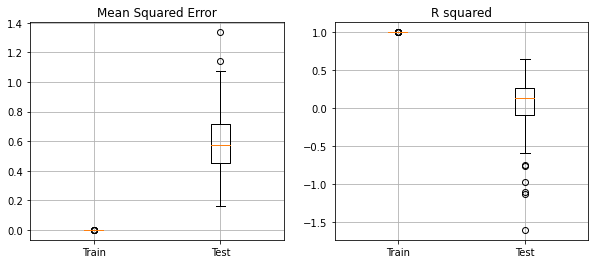

Train MSE standard deviation: 3.35631304385693e-07
Test MSE standard deviation:  0.20918471194004237

Train_R2 standard deviation: 5.222165864338017e-07
Test_R2 standard deviation:  0.3806597098555506


In [32]:
Multiple_Runs(model,X_train,y_train,X_test, y_test)